In [1]:
import lightgbm as lgb
import numpy as np
import sklearn
import pandas as pd
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import mean_squared_error

dataPath = '/research/remote/collections/learning_to_rank/LTRv2/'

#Count the amount of queries 
def group_counts(arr):
    d = np.ones(arr.size, dtype=int)
    d[1:] = (arr[:-1] != arr[1:]).astype(int)
    return np.diff(np.where(np.append(d, 1))[0])

dataPaths = [dataPath + 'set1.train.txt', dataPath + 'set1.valid.txt', dataPath + 'set1.test.txt']

def load_lgb_data(dataPaths):
    datas = []
    for data in dataPaths:
        X, y, qid = load_svmlight_file(data, query_id=True)
        datas.append(lgb.Dataset(X, label=y, group=group_counts(qid), free_raw_data=False))
    return datas


train_data, valid_data, test_data = load_lgb_data(dataPaths)

#Reload the test set to get X and Y to predict
X_test, y_test, qid = load_svmlight_file(dataPath + 'set1.test.txt', query_id=True)

#Create Valid set to predict and see the score
X_valid, y_valid, qidValid = load_svmlight_file(dataPath + 'set1.valid.txt', query_id=True)

'''
X, y, qid = load_svmlight_file(dataPath + 'set1.train.txt', query_id=True)
train_data = lgb.Dataset(X, label=y, group=group_counts(qid))
X, y, qid = load_svmlight_file(dataPath + 'set1.valid.txt', query_id=True)
valid_data = lgb.Dataset(X, label=y, group=group_counts(qid))
X, y, qid = load_svmlight_file(dataPath + 'set1.test.txt', query_id=True)
test_data = lgb.Dataset(X, label=y, group=group_counts(qid))
'''

"\nX, y, qid = load_svmlight_file(dataPath + 'set1.train.txt', query_id=True)\ntrain_data = lgb.Dataset(X, label=y, group=group_counts(qid))\nX, y, qid = load_svmlight_file(dataPath + 'set1.valid.txt', query_id=True)\nvalid_data = lgb.Dataset(X, label=y, group=group_counts(qid))\nX, y, qid = load_svmlight_file(dataPath + 'set1.test.txt', query_id=True)\ntest_data = lgb.Dataset(X, label=y, group=group_counts(qid))\n"

## Generate models, save them, Load and predict to an array

In [ ]:
#Setup Param File and generate different models for hyper parameter tuning
trees = [100,300,500,1000,1500]
leaves = [15,31,63]
feature_fractions = [0.6, 0.8, 0.9]
for leave in leaves:
    for tree in trees:
        for fraction in feature_fractions:
            param = {'num_leaves':leave, 'num_trees':tree, 'objective':'lambdarank',
                 'learning_rate': 0.1,'feature_fraction': fraction,
                 'bagging_fraction': 0.8,'bagging_freq': 5,
                 'verbose': 1}
            param['metric'] = ['ndcg', 'map']
            #Train Model
            num_round = 10
            bst = lgb.train(param, train_data, num_round, valid_sets=[valid_data])
            bst.save_model('modelsP1LR/%d.%d.%3.1f.Leaves.tree.Featfrac.txt' % (leave, tree, fraction))

[1]	valid_0's map@1: 0.865731	valid_0's map@2: 0.841015	valid_0's map@3: 0.824686	valid_0's map@4: 0.816761	valid_0's map@5: 0.811133	valid_0's ndcg@1: 0.642867	valid_0's ndcg@2: 0.635681	valid_0's ndcg@3: 0.642525	valid_0's ndcg@4: 0.654866	valid_0's ndcg@5: 0.668
[2]	valid_0's map@1: 0.869739	valid_0's map@2: 0.848113	valid_0's map@3: 0.832934	valid_0's map@4: 0.824566	valid_0's map@5: 0.820394	valid_0's ndcg@1: 0.659789	valid_0's ndcg@2: 0.653341	valid_0's ndcg@3: 0.659622	valid_0's ndcg@4: 0.670434	valid_0's ndcg@5: 0.682782
[3]	valid_0's map@1: 0.869405	valid_0's map@2: 0.846693	valid_0's map@3: 0.831942	valid_0's map@4: 0.823847	valid_0's map@5: 0.819943	valid_0's ndcg@1: 0.662872	valid_0's ndcg@2: 0.656099	valid_0's ndcg@3: 0.662533	valid_0's ndcg@4: 0.673772	valid_0's ndcg@5: 0.685775
[4]	valid_0's map@1: 0.870407	valid_0's map@2: 0.849031	valid_0's map@3: 0.832869	valid_0's map@4: 0.825134	valid_0's map@5: 0.820554	valid_0's ndcg@1: 0.665426	valid_0's ndcg@2: 0.658697	valid_0'

[32]	valid_0's map@1: 0.884436	valid_0's map@2: 0.861222	valid_0's map@3: 0.850507	valid_0's map@4: 0.840368	valid_0's map@5: 0.835593	valid_0's ndcg@1: 0.684022	valid_0's ndcg@2: 0.672332	valid_0's ndcg@3: 0.682864	valid_0's ndcg@4: 0.69266	valid_0's ndcg@5: 0.704498
[33]	valid_0's map@1: 0.885104	valid_0's map@2: 0.863226	valid_0's map@3: 0.851583	valid_0's map@4: 0.841069	valid_0's map@5: 0.836729	valid_0's ndcg@1: 0.685523	valid_0's ndcg@2: 0.675812	valid_0's ndcg@3: 0.684577	valid_0's ndcg@4: 0.69374	valid_0's ndcg@5: 0.705773
[34]	valid_0's map@1: 0.885772	valid_0's map@2: 0.864228	valid_0's map@3: 0.852279	valid_0's map@4: 0.841315	valid_0's map@5: 0.837344	valid_0's ndcg@1: 0.686853	valid_0's ndcg@2: 0.676393	valid_0's ndcg@3: 0.685732	valid_0's ndcg@4: 0.694647	valid_0's ndcg@5: 0.706349
[35]	valid_0's map@1: 0.884102	valid_0's map@2: 0.863978	valid_0's map@3: 0.851815	valid_0's map@4: 0.841143	valid_0's map@5: 0.836627	valid_0's ndcg@1: 0.685946	valid_0's ndcg@2: 0.677009	val

[63]	valid_0's map@1: 0.89312	valid_0's map@2: 0.871743	valid_0's map@3: 0.856194	valid_0's map@4: 0.846	valid_0's map@5: 0.8406	valid_0's ndcg@1: 0.694755	valid_0's ndcg@2: 0.683796	valid_0's ndcg@3: 0.690794	valid_0's ndcg@4: 0.701035	valid_0's ndcg@5: 0.713085
[64]	valid_0's map@1: 0.893454	valid_0's map@2: 0.872077	valid_0's map@3: 0.857159	valid_0's map@4: 0.84696	valid_0's map@5: 0.841572	valid_0's ndcg@1: 0.694802	valid_0's ndcg@2: 0.68418	valid_0's ndcg@3: 0.691358	valid_0's ndcg@4: 0.701821	valid_0's ndcg@5: 0.713676
[65]	valid_0's map@1: 0.892118	valid_0's map@2: 0.871493	valid_0's map@3: 0.856732	valid_0's map@4: 0.846146	valid_0's map@5: 0.841087	valid_0's ndcg@1: 0.693772	valid_0's ndcg@2: 0.683937	valid_0's ndcg@3: 0.691161	valid_0's ndcg@4: 0.701235	valid_0's ndcg@5: 0.713514
[66]	valid_0's map@1: 0.892452	valid_0's map@2: 0.872077	valid_0's map@3: 0.856491	valid_0's map@4: 0.845993	valid_0's map@5: 0.841506	valid_0's ndcg@1: 0.694131	valid_0's ndcg@2: 0.684586	valid_0's

[94]	valid_0's map@1: 0.894122	valid_0's map@2: 0.874165	valid_0's map@3: 0.860035	valid_0's map@4: 0.849289	valid_0's map@5: 0.845315	valid_0's ndcg@1: 0.69694	valid_0's ndcg@2: 0.6887	valid_0's ndcg@3: 0.696602	valid_0's ndcg@4: 0.70629	valid_0's ndcg@5: 0.718547
[95]	valid_0's map@1: 0.894122	valid_0's map@2: 0.874415	valid_0's map@3: 0.860629	valid_0's map@4: 0.849442	valid_0's map@5: 0.845337	valid_0's ndcg@1: 0.697163	valid_0's ndcg@2: 0.689223	valid_0's ndcg@3: 0.696863	valid_0's ndcg@4: 0.706574	valid_0's ndcg@5: 0.718841
[96]	valid_0's map@1: 0.893454	valid_0's map@2: 0.874165	valid_0's map@3: 0.86035	valid_0's map@4: 0.849651	valid_0's map@5: 0.845496	valid_0's ndcg@1: 0.697226	valid_0's ndcg@2: 0.688898	valid_0's ndcg@3: 0.696905	valid_0's ndcg@4: 0.70661	valid_0's ndcg@5: 0.718857
[97]	valid_0's map@1: 0.893454	valid_0's map@2: 0.873998	valid_0's map@3: 0.860434	valid_0's map@4: 0.849839	valid_0's map@5: 0.845794	valid_0's ndcg@1: 0.695897	valid_0's ndcg@2: 0.688537	valid_0

[25]	valid_0's map@1: 0.878424	valid_0's map@2: 0.860053	valid_0's map@3: 0.847204	valid_0's map@4: 0.836838	valid_0's map@5: 0.831231	valid_0's ndcg@1: 0.674982	valid_0's ndcg@2: 0.669485	valid_0's ndcg@3: 0.680364	valid_0's ndcg@4: 0.689743	valid_0's ndcg@5: 0.700572
[26]	valid_0's map@1: 0.881096	valid_0's map@2: 0.861055	valid_0's map@3: 0.847964	valid_0's map@4: 0.836629	valid_0's map@5: 0.832124	valid_0's ndcg@1: 0.677189	valid_0's ndcg@2: 0.670566	valid_0's ndcg@3: 0.680877	valid_0's ndcg@4: 0.690074	valid_0's ndcg@5: 0.701478
[27]	valid_0's map@1: 0.882098	valid_0's map@2: 0.86189	valid_0's map@3: 0.847872	valid_0's map@4: 0.837585	valid_0's map@5: 0.832536	valid_0's ndcg@1: 0.676614	valid_0's ndcg@2: 0.670384	valid_0's ndcg@3: 0.680576	valid_0's ndcg@4: 0.690431	valid_0's ndcg@5: 0.702275
[28]	valid_0's map@1: 0.882432	valid_0's map@2: 0.862057	valid_0's map@3: 0.847649	valid_0's map@4: 0.837269	valid_0's map@5: 0.832279	valid_0's ndcg@1: 0.677724	valid_0's ndcg@2: 0.670831	va

[56]	valid_0's map@1: 0.886774	valid_0's map@2: 0.865481	valid_0's map@3: 0.850553	valid_0's map@4: 0.842419	valid_0's map@5: 0.838098	valid_0's ndcg@1: 0.689293	valid_0's ndcg@2: 0.679965	valid_0's ndcg@3: 0.6866	valid_0's ndcg@4: 0.697927	valid_0's ndcg@5: 0.710197
[57]	valid_0's map@1: 0.887442	valid_0's map@2: 0.865564	valid_0's map@3: 0.850395	valid_0's map@4: 0.842133	valid_0's map@5: 0.837907	valid_0's ndcg@1: 0.689942	valid_0's ndcg@2: 0.679871	valid_0's ndcg@3: 0.686895	valid_0's ndcg@4: 0.698215	valid_0's ndcg@5: 0.710171
[58]	valid_0's map@1: 0.887442	valid_0's map@2: 0.865982	valid_0's map@3: 0.850933	valid_0's map@4: 0.842968	valid_0's map@5: 0.838587	valid_0's ndcg@1: 0.689178	valid_0's ndcg@2: 0.67926	valid_0's ndcg@3: 0.687059	valid_0's ndcg@4: 0.698829	valid_0's ndcg@5: 0.710664
[59]	valid_0's map@1: 0.887108	valid_0's map@2: 0.866817	valid_0's map@3: 0.851471	valid_0's map@4: 0.842913	valid_0's map@5: 0.838806	valid_0's ndcg@1: 0.689016	valid_0's ndcg@2: 0.679823	vali

[87]	valid_0's map@1: 0.88978	valid_0's map@2: 0.86999	valid_0's map@3: 0.85637	valid_0's map@4: 0.847125	valid_0's map@5: 0.843411	valid_0's ndcg@1: 0.692324	valid_0's ndcg@2: 0.686089	valid_0's ndcg@3: 0.693897	valid_0's ndcg@4: 0.703745	valid_0's ndcg@5: 0.716657
[88]	valid_0's map@1: 0.890782	valid_0's map@2: 0.870157	valid_0's map@3: 0.855934	valid_0's map@4: 0.847572	valid_0's map@5: 0.844124	valid_0's ndcg@1: 0.692894	valid_0's ndcg@2: 0.686374	valid_0's ndcg@3: 0.693565	valid_0's ndcg@4: 0.704426	valid_0's ndcg@5: 0.716898
[89]	valid_0's map@1: 0.890782	valid_0's map@2: 0.869656	valid_0's map@3: 0.855832	valid_0's map@4: 0.847521	valid_0's map@5: 0.843988	valid_0's ndcg@1: 0.692467	valid_0's ndcg@2: 0.686046	valid_0's ndcg@3: 0.693503	valid_0's ndcg@4: 0.704058	valid_0's ndcg@5: 0.716779
[90]	valid_0's map@1: 0.89145	valid_0's map@2: 0.869572	valid_0's map@3: 0.855832	valid_0's map@4: 0.847816	valid_0's map@5: 0.844	valid_0's ndcg@1: 0.693358	valid_0's ndcg@2: 0.686375	valid_0'

[18]	valid_0's map@1: 0.885438	valid_0's map@2: 0.859886	valid_0's map@3: 0.845747	valid_0's map@4: 0.836594	valid_0's map@5: 0.83067	valid_0's ndcg@1: 0.678395	valid_0's ndcg@2: 0.670532	valid_0's ndcg@3: 0.680072	valid_0's ndcg@4: 0.691064	valid_0's ndcg@5: 0.700891
[19]	valid_0's map@1: 0.885104	valid_0's map@2: 0.860638	valid_0's map@3: 0.846935	valid_0's map@4: 0.837244	valid_0's map@5: 0.831201	valid_0's ndcg@1: 0.677215	valid_0's ndcg@2: 0.670473	valid_0's ndcg@3: 0.680672	valid_0's ndcg@4: 0.691478	valid_0's ndcg@5: 0.701507
[20]	valid_0's map@1: 0.883768	valid_0's map@2: 0.860137	valid_0's map@3: 0.846833	valid_0's map@4: 0.836761	valid_0's map@5: 0.830851	valid_0's ndcg@1: 0.677387	valid_0's ndcg@2: 0.670192	valid_0's ndcg@3: 0.680761	valid_0's ndcg@4: 0.69084	valid_0's ndcg@5: 0.701462
[21]	valid_0's map@1: 0.884436	valid_0's map@2: 0.861974	valid_0's map@3: 0.846879	valid_0's map@4: 0.836748	valid_0's map@5: 0.831209	valid_0's ndcg@1: 0.678436	valid_0's ndcg@2: 0.672072	val

[49]	valid_0's map@1: 0.889446	valid_0's map@2: 0.866065	valid_0's map@3: 0.852214	valid_0's map@4: 0.842435	valid_0's map@5: 0.837919	valid_0's ndcg@1: 0.685641	valid_0's ndcg@2: 0.678049	valid_0's ndcg@3: 0.686948	valid_0's ndcg@4: 0.697486	valid_0's ndcg@5: 0.708901
[50]	valid_0's map@1: 0.88811	valid_0's map@2: 0.866065	valid_0's map@3: 0.852028	valid_0's map@4: 0.841876	valid_0's map@5: 0.837434	valid_0's ndcg@1: 0.685247	valid_0's ndcg@2: 0.678979	valid_0's ndcg@3: 0.687011	valid_0's ndcg@4: 0.697312	valid_0's ndcg@5: 0.709179
[51]	valid_0's map@1: 0.887108	valid_0's map@2: 0.866232	valid_0's map@3: 0.851982	valid_0's map@4: 0.841709	valid_0's map@5: 0.837261	valid_0's ndcg@1: 0.685161	valid_0's ndcg@2: 0.678745	valid_0's ndcg@3: 0.687315	valid_0's ndcg@4: 0.697305	valid_0's ndcg@5: 0.70911
[52]	valid_0's map@1: 0.887776	valid_0's map@2: 0.866483	valid_0's map@3: 0.851982	valid_0's map@4: 0.842398	valid_0's map@5: 0.837743	valid_0's ndcg@1: 0.685867	valid_0's ndcg@2: 0.679702	val

[80]	valid_0's map@1: 0.890782	valid_0's map@2: 0.868654	valid_0's map@3: 0.855071	valid_0's map@4: 0.84565	valid_0's map@5: 0.840948	valid_0's ndcg@1: 0.692092	valid_0's ndcg@2: 0.684329	valid_0's ndcg@3: 0.692887	valid_0's ndcg@4: 0.702347	valid_0's ndcg@5: 0.714312
[81]	valid_0's map@1: 0.890782	valid_0's map@2: 0.868654	valid_0's map@3: 0.854839	valid_0's map@4: 0.845629	valid_0's map@5: 0.841062	valid_0's ndcg@1: 0.692627	valid_0's ndcg@2: 0.684435	valid_0's ndcg@3: 0.693002	valid_0's ndcg@4: 0.70302	valid_0's ndcg@5: 0.714465
[82]	valid_0's map@1: 0.892452	valid_0's map@2: 0.86832	valid_0's map@3: 0.854988	valid_0's map@4: 0.84551	valid_0's map@5: 0.841381	valid_0's ndcg@1: 0.694055	valid_0's ndcg@2: 0.684481	valid_0's ndcg@3: 0.693412	valid_0's ndcg@4: 0.702814	valid_0's ndcg@5: 0.714923
[83]	valid_0's map@1: 0.891784	valid_0's map@2: 0.868988	valid_0's map@3: 0.854923	valid_0's map@4: 0.845615	valid_0's map@5: 0.841666	valid_0's ndcg@1: 0.693196	valid_0's ndcg@2: 0.68517	valid_

[12]	valid_0's map@1: 0.878758	valid_0's map@2: 0.854208	valid_0's map@3: 0.840858	valid_0's map@4: 0.831798	valid_0's map@5: 0.826931	valid_0's ndcg@1: 0.676633	valid_0's ndcg@2: 0.667554	valid_0's ndcg@3: 0.675309	valid_0's ndcg@4: 0.685035	valid_0's ndcg@5: 0.696196
[13]	valid_0's map@1: 0.877756	valid_0's map@2: 0.853874	valid_0's map@3: 0.839976	valid_0's map@4: 0.831339	valid_0's map@5: 0.826663	valid_0's ndcg@1: 0.674645	valid_0's ndcg@2: 0.666247	valid_0's ndcg@3: 0.674498	valid_0's ndcg@4: 0.684412	valid_0's ndcg@5: 0.696557
[14]	valid_0's map@1: 0.87976	valid_0's map@2: 0.855294	valid_0's map@3: 0.840394	valid_0's map@4: 0.832201	valid_0's map@5: 0.826978	valid_0's ndcg@1: 0.676	valid_0's ndcg@2: 0.666555	valid_0's ndcg@3: 0.674157	valid_0's ndcg@4: 0.684968	valid_0's ndcg@5: 0.697019
[15]	valid_0's map@1: 0.87976	valid_0's map@2: 0.856212	valid_0's map@3: 0.84199	valid_0's map@4: 0.834463	valid_0's map@5: 0.828335	valid_0's ndcg@1: 0.675981	valid_0's ndcg@2: 0.667089	valid_0

[43]	valid_0's map@1: 0.886106	valid_0's map@2: 0.866984	valid_0's map@3: 0.852817	valid_0's map@4: 0.843511	valid_0's map@5: 0.838846	valid_0's ndcg@1: 0.683803	valid_0's ndcg@2: 0.679013	valid_0's ndcg@3: 0.686573	valid_0's ndcg@4: 0.695981	valid_0's ndcg@5: 0.708631
[44]	valid_0's map@1: 0.88644	valid_0's map@2: 0.867485	valid_0's map@3: 0.853132	valid_0's map@4: 0.843291	valid_0's map@5: 0.838842	valid_0's ndcg@1: 0.684754	valid_0's ndcg@2: 0.6795	valid_0's ndcg@3: 0.686881	valid_0's ndcg@4: 0.696397	valid_0's ndcg@5: 0.708646
[45]	valid_0's map@1: 0.886106	valid_0's map@2: 0.8669	valid_0's map@3: 0.853494	valid_0's map@4: 0.843757	valid_0's map@5: 0.838705	valid_0's ndcg@1: 0.685291	valid_0's ndcg@2: 0.678999	valid_0's ndcg@3: 0.687217	valid_0's ndcg@4: 0.696914	valid_0's ndcg@5: 0.708455
[46]	valid_0's map@1: 0.88644	valid_0's map@2: 0.866733	valid_0's map@3: 0.853039	valid_0's map@4: 0.84369	valid_0's map@5: 0.838723	valid_0's ndcg@1: 0.686853	valid_0's ndcg@2: 0.678495	valid_0'

[74]	valid_0's map@1: 0.890782	valid_0's map@2: 0.870658	valid_0's map@3: 0.856463	valid_0's map@4: 0.846044	valid_0's map@5: 0.841725	valid_0's ndcg@1: 0.693008	valid_0's ndcg@2: 0.685677	valid_0's ndcg@3: 0.692955	valid_0's ndcg@4: 0.702623	valid_0's ndcg@5: 0.715101
[75]	valid_0's map@1: 0.890114	valid_0's map@2: 0.870908	valid_0's map@3: 0.856528	valid_0's map@4: 0.845972	valid_0's map@5: 0.841682	valid_0's ndcg@1: 0.69297	valid_0's ndcg@2: 0.685753	valid_0's ndcg@3: 0.693062	valid_0's ndcg@4: 0.702753	valid_0's ndcg@5: 0.715039
[76]	valid_0's map@1: 0.890448	valid_0's map@2: 0.871326	valid_0's map@3: 0.856723	valid_0's map@4: 0.846144	valid_0's map@5: 0.842092	valid_0's ndcg@1: 0.693221	valid_0's ndcg@2: 0.68576	valid_0's ndcg@3: 0.692827	valid_0's ndcg@4: 0.703074	valid_0's ndcg@5: 0.715639
[77]	valid_0's map@1: 0.892118	valid_0's map@2: 0.872244	valid_0's map@3: 0.857214	valid_0's map@4: 0.846362	valid_0's map@5: 0.842678	valid_0's ndcg@1: 0.695114	valid_0's ndcg@2: 0.687465	val

[105]	valid_0's map@1: 0.893454	valid_0's map@2: 0.874165	valid_0's map@3: 0.859153	valid_0's map@4: 0.85049	valid_0's map@5: 0.846221	valid_0's ndcg@1: 0.69785	valid_0's ndcg@2: 0.688448	valid_0's ndcg@3: 0.69618	valid_0's ndcg@4: 0.707601	valid_0's ndcg@5: 0.719834
[106]	valid_0's map@1: 0.893788	valid_0's map@2: 0.874666	valid_0's map@3: 0.859283	valid_0's map@4: 0.850838	valid_0's map@5: 0.846232	valid_0's ndcg@1: 0.698107	valid_0's ndcg@2: 0.689143	valid_0's ndcg@3: 0.69671	valid_0's ndcg@4: 0.707846	valid_0's ndcg@5: 0.720088
[107]	valid_0's map@1: 0.893454	valid_0's map@2: 0.874582	valid_0's map@3: 0.859209	valid_0's map@4: 0.850597	valid_0's map@5: 0.846373	valid_0's ndcg@1: 0.698015	valid_0's ndcg@2: 0.689416	valid_0's ndcg@3: 0.696953	valid_0's ndcg@4: 0.707845	valid_0's ndcg@5: 0.720082
[108]	valid_0's map@1: 0.892452	valid_0's map@2: 0.874165	valid_0's map@3: 0.859061	valid_0's map@4: 0.85075	valid_0's map@5: 0.84653	valid_0's ndcg@1: 0.697878	valid_0's ndcg@2: 0.689523	val

[136]	valid_0's map@1: 0.894122	valid_0's map@2: 0.874833	valid_0's map@3: 0.861742	valid_0's map@4: 0.851671	valid_0's map@5: 0.848125	valid_0's ndcg@1: 0.698518	valid_0's ndcg@2: 0.691268	valid_0's ndcg@3: 0.700294	valid_0's ndcg@4: 0.711052	valid_0's ndcg@5: 0.722509
[137]	valid_0's map@1: 0.89479	valid_0's map@2: 0.875919	valid_0's map@3: 0.861723	valid_0's map@4: 0.851972	valid_0's map@5: 0.847997	valid_0's ndcg@1: 0.698963	valid_0's ndcg@2: 0.691921	valid_0's ndcg@3: 0.700445	valid_0's ndcg@4: 0.711233	valid_0's ndcg@5: 0.722254
[138]	valid_0's map@1: 0.894456	valid_0's map@2: 0.876086	valid_0's map@3: 0.861352	valid_0's map@4: 0.852467	valid_0's map@5: 0.847962	valid_0's ndcg@1: 0.698896	valid_0's ndcg@2: 0.691972	valid_0's ndcg@3: 0.700006	valid_0's ndcg@4: 0.711406	valid_0's ndcg@5: 0.722127
[139]	valid_0's map@1: 0.89479	valid_0's map@2: 0.876002	valid_0's map@3: 0.861464	valid_0's map@4: 0.852286	valid_0's map@5: 0.848175	valid_0's ndcg@1: 0.698658	valid_0's ndcg@2: 0.691338

[167]	valid_0's map@1: 0.895792	valid_0's map@2: 0.875251	valid_0's map@3: 0.862252	valid_0's map@4: 0.853533	valid_0's map@5: 0.848974	valid_0's ndcg@1: 0.698457	valid_0's ndcg@2: 0.692105	valid_0's ndcg@3: 0.70211	valid_0's ndcg@4: 0.712485	valid_0's ndcg@5: 0.723739
[168]	valid_0's map@1: 0.895792	valid_0's map@2: 0.875418	valid_0's map@3: 0.862327	valid_0's map@4: 0.853311	valid_0's map@5: 0.849398	valid_0's ndcg@1: 0.697726	valid_0's ndcg@2: 0.692157	valid_0's ndcg@3: 0.701765	valid_0's ndcg@4: 0.71212	valid_0's ndcg@5: 0.723796
[169]	valid_0's map@1: 0.895458	valid_0's map@2: 0.875251	valid_0's map@3: 0.862549	valid_0's map@4: 0.853394	valid_0's map@5: 0.849528	valid_0's ndcg@1: 0.697665	valid_0's ndcg@2: 0.692215	valid_0's ndcg@3: 0.701833	valid_0's ndcg@4: 0.711927	valid_0's ndcg@5: 0.723738
[170]	valid_0's map@1: 0.896126	valid_0's map@2: 0.875251	valid_0's map@3: 0.863013	valid_0's map@4: 0.853582	valid_0's map@5: 0.849787	valid_0's ndcg@1: 0.698333	valid_0's ndcg@2: 0.692478

[198]	valid_0's map@1: 0.89312	valid_0's map@2: 0.875084	valid_0's map@3: 0.863264	valid_0's map@4: 0.854631	valid_0's map@5: 0.849766	valid_0's ndcg@1: 0.698724	valid_0's ndcg@2: 0.693631	valid_0's ndcg@3: 0.702912	valid_0's ndcg@4: 0.713449	valid_0's ndcg@5: 0.72453
[199]	valid_0's map@1: 0.893454	valid_0's map@2: 0.875668	valid_0's map@3: 0.863245	valid_0's map@4: 0.854721	valid_0's map@5: 0.850132	valid_0's ndcg@1: 0.698696	valid_0's ndcg@2: 0.69382	valid_0's ndcg@3: 0.702928	valid_0's ndcg@4: 0.713597	valid_0's ndcg@5: 0.72478
[200]	valid_0's map@1: 0.894122	valid_0's map@2: 0.876503	valid_0's map@3: 0.864173	valid_0's map@4: 0.854902	valid_0's map@5: 0.850311	valid_0's ndcg@1: 0.69909	valid_0's ndcg@2: 0.694278	valid_0's ndcg@3: 0.703344	valid_0's ndcg@4: 0.713973	valid_0's ndcg@5: 0.725007
[201]	valid_0's map@1: 0.892786	valid_0's map@2: 0.876002	valid_0's map@3: 0.864173	valid_0's map@4: 0.854902	valid_0's map@5: 0.849983	valid_0's ndcg@1: 0.698836	valid_0's ndcg@2: 0.694579	va

[229]	valid_0's map@1: 0.895458	valid_0's map@2: 0.877756	valid_0's map@3: 0.866038	valid_0's map@4: 0.857368	valid_0's map@5: 0.851828	valid_0's ndcg@1: 0.70091	valid_0's ndcg@2: 0.696566	valid_0's ndcg@3: 0.705854	valid_0's ndcg@4: 0.715977	valid_0's ndcg@5: 0.726632
[230]	valid_0's map@1: 0.89479	valid_0's map@2: 0.877338	valid_0's map@3: 0.865843	valid_0's map@4: 0.857242	valid_0's map@5: 0.851818	valid_0's ndcg@1: 0.700267	valid_0's ndcg@2: 0.696206	valid_0's ndcg@3: 0.705405	valid_0's ndcg@4: 0.715655	valid_0's ndcg@5: 0.72669
[231]	valid_0's map@1: 0.894456	valid_0's map@2: 0.876837	valid_0's map@3: 0.865397	valid_0's map@4: 0.856867	valid_0's map@5: 0.851946	valid_0's ndcg@1: 0.699507	valid_0's ndcg@2: 0.695869	valid_0's ndcg@3: 0.704944	valid_0's ndcg@4: 0.715505	valid_0's ndcg@5: 0.726721
[232]	valid_0's map@1: 0.894122	valid_0's map@2: 0.876754	valid_0's map@3: 0.865342	valid_0's map@4: 0.856846	valid_0's map@5: 0.851926	valid_0's ndcg@1: 0.698982	valid_0's ndcg@2: 0.695862	

[260]	valid_0's map@1: 0.894456	valid_0's map@2: 0.878591	valid_0's map@3: 0.866566	valid_0's map@4: 0.858075	valid_0's map@5: 0.852806	valid_0's ndcg@1: 0.700035	valid_0's ndcg@2: 0.69782	valid_0's ndcg@3: 0.706373	valid_0's ndcg@4: 0.716673	valid_0's ndcg@5: 0.727797
[261]	valid_0's map@1: 0.89479	valid_0's map@2: 0.878841	valid_0's map@3: 0.866771	valid_0's map@4: 0.858145	valid_0's map@5: 0.853195	valid_0's ndcg@1: 0.700115	valid_0's ndcg@2: 0.698419	valid_0's ndcg@3: 0.706761	valid_0's ndcg@4: 0.716768	valid_0's ndcg@5: 0.728066
[262]	valid_0's map@1: 0.895458	valid_0's map@2: 0.879259	valid_0's map@3: 0.866965	valid_0's map@4: 0.858158	valid_0's map@5: 0.853196	valid_0's ndcg@1: 0.700146	valid_0's ndcg@2: 0.698519	valid_0's ndcg@3: 0.706628	valid_0's ndcg@4: 0.71665	valid_0's ndcg@5: 0.728035
[263]	valid_0's map@1: 0.896126	valid_0's map@2: 0.879676	valid_0's map@3: 0.866984	valid_0's map@4: 0.858479	valid_0's map@5: 0.853072	valid_0's ndcg@1: 0.700814	valid_0's ndcg@2: 0.698439	

[291]	valid_0's map@1: 0.896794	valid_0's map@2: 0.878674	valid_0's map@3: 0.86729	valid_0's map@4: 0.85913	valid_0's map@5: 0.85387	valid_0's ndcg@1: 0.701463	valid_0's ndcg@2: 0.699713	valid_0's ndcg@3: 0.707606	valid_0's ndcg@4: 0.718202	valid_0's ndcg@5: 0.729002
[292]	valid_0's map@1: 0.89646	valid_0's map@2: 0.878591	valid_0's map@3: 0.867281	valid_0's map@4: 0.858977	valid_0's map@5: 0.853531	valid_0's ndcg@1: 0.700779	valid_0's ndcg@2: 0.698925	valid_0's ndcg@3: 0.707098	valid_0's ndcg@4: 0.718162	valid_0's ndcg@5: 0.728501
[293]	valid_0's map@1: 0.897128	valid_0's map@2: 0.879008	valid_0's map@3: 0.867615	valid_0's map@4: 0.859339	valid_0's map@5: 0.853964	valid_0's ndcg@1: 0.701511	valid_0's ndcg@2: 0.699614	valid_0's ndcg@3: 0.707359	valid_0's ndcg@4: 0.718568	valid_0's ndcg@5: 0.728954
[294]	valid_0's map@1: 0.89813	valid_0's map@2: 0.879509	valid_0's map@3: 0.867875	valid_0's map@4: 0.859492	valid_0's map@5: 0.854068	valid_0's ndcg@1: 0.702227	valid_0's ndcg@2: 0.699899	va

[22]	valid_0's map@1: 0.881764	valid_0's map@2: 0.860053	valid_0's map@3: 0.84584	valid_0's map@4: 0.835277	valid_0's map@5: 0.830365	valid_0's ndcg@1: 0.676063	valid_0's ndcg@2: 0.66954	valid_0's ndcg@3: 0.679638	valid_0's ndcg@4: 0.688842	valid_0's ndcg@5: 0.699788
[23]	valid_0's map@1: 0.881096	valid_0's map@2: 0.859636	valid_0's map@3: 0.846471	valid_0's map@4: 0.83575	valid_0's map@5: 0.831244	valid_0's ndcg@1: 0.676744	valid_0's ndcg@2: 0.66975	valid_0's ndcg@3: 0.680113	valid_0's ndcg@4: 0.689602	valid_0's ndcg@5: 0.70044
[24]	valid_0's map@1: 0.879426	valid_0's map@2: 0.859302	valid_0's map@3: 0.846675	valid_0's map@4: 0.836335	valid_0's map@5: 0.831299	valid_0's ndcg@1: 0.676079	valid_0's ndcg@2: 0.669811	valid_0's ndcg@3: 0.680473	valid_0's ndcg@4: 0.689434	valid_0's ndcg@5: 0.700465
[25]	valid_0's map@1: 0.878424	valid_0's map@2: 0.860053	valid_0's map@3: 0.847204	valid_0's map@4: 0.836838	valid_0's map@5: 0.831231	valid_0's ndcg@1: 0.674982	valid_0's ndcg@2: 0.669485	valid_

[53]	valid_0's map@1: 0.887108	valid_0's map@2: 0.866065	valid_0's map@3: 0.850572	valid_0's map@4: 0.842126	valid_0's map@5: 0.837935	valid_0's ndcg@1: 0.690537	valid_0's ndcg@2: 0.679231	valid_0's ndcg@3: 0.686291	valid_0's ndcg@4: 0.697642	valid_0's ndcg@5: 0.709638
[54]	valid_0's map@1: 0.887108	valid_0's map@2: 0.866316	valid_0's map@3: 0.851082	valid_0's map@4: 0.842231	valid_0's map@5: 0.837824	valid_0's ndcg@1: 0.69011	valid_0's ndcg@2: 0.679241	valid_0's ndcg@3: 0.686664	valid_0's ndcg@4: 0.697626	valid_0's ndcg@5: 0.709767
[55]	valid_0's map@1: 0.887776	valid_0's map@2: 0.866065	valid_0's map@3: 0.85123	valid_0's map@4: 0.842502	valid_0's map@5: 0.838143	valid_0's ndcg@1: 0.689697	valid_0's ndcg@2: 0.679001	valid_0's ndcg@3: 0.686482	valid_0's ndcg@4: 0.697689	valid_0's ndcg@5: 0.710035
[56]	valid_0's map@1: 0.886774	valid_0's map@2: 0.865481	valid_0's map@3: 0.850553	valid_0's map@4: 0.842419	valid_0's map@5: 0.838098	valid_0's ndcg@1: 0.689293	valid_0's ndcg@2: 0.679965	val

[84]	valid_0's map@1: 0.889446	valid_0's map@2: 0.870491	valid_0's map@3: 0.855971	valid_0's map@4: 0.847456	valid_0's map@5: 0.843045	valid_0's ndcg@1: 0.691825	valid_0's ndcg@2: 0.68615	valid_0's ndcg@3: 0.692819	valid_0's ndcg@4: 0.703657	valid_0's ndcg@5: 0.715706
[85]	valid_0's map@1: 0.890114	valid_0's map@2: 0.870908	valid_0's map@3: 0.856027	valid_0's map@4: 0.847329	valid_0's map@5: 0.843292	valid_0's ndcg@1: 0.692493	valid_0's ndcg@2: 0.686444	valid_0's ndcg@3: 0.692836	valid_0's ndcg@4: 0.703422	valid_0's ndcg@5: 0.716111
[86]	valid_0's map@1: 0.890782	valid_0's map@2: 0.87024	valid_0's map@3: 0.85625	valid_0's map@4: 0.847605	valid_0's map@5: 0.843618	valid_0's ndcg@1: 0.692747	valid_0's ndcg@2: 0.686121	valid_0's ndcg@3: 0.693255	valid_0's ndcg@4: 0.703924	valid_0's ndcg@5: 0.716489
[87]	valid_0's map@1: 0.88978	valid_0's map@2: 0.86999	valid_0's map@3: 0.85637	valid_0's map@4: 0.847125	valid_0's map@5: 0.843411	valid_0's ndcg@1: 0.692324	valid_0's ndcg@2: 0.686089	valid_0

[115]	valid_0's map@1: 0.89145	valid_0's map@2: 0.870491	valid_0's map@3: 0.859079	valid_0's map@4: 0.849899	valid_0's map@5: 0.84572	valid_0's ndcg@1: 0.694421	valid_0's ndcg@2: 0.687944	valid_0's ndcg@3: 0.697985	valid_0's ndcg@4: 0.707288	valid_0's ndcg@5: 0.719606
[116]	valid_0's map@1: 0.892118	valid_0's map@2: 0.870825	valid_0's map@3: 0.859302	valid_0's map@4: 0.849992	valid_0's map@5: 0.845821	valid_0's ndcg@1: 0.693594	valid_0's ndcg@2: 0.687646	valid_0's ndcg@3: 0.697464	valid_0's ndcg@4: 0.707262	valid_0's ndcg@5: 0.71942
[117]	valid_0's map@1: 0.89145	valid_0's map@2: 0.870574	valid_0's map@3: 0.858829	valid_0's map@4: 0.849859	valid_0's map@5: 0.845465	valid_0's ndcg@1: 0.693759	valid_0's ndcg@2: 0.687475	valid_0's ndcg@3: 0.697354	valid_0's ndcg@4: 0.707108	valid_0's ndcg@5: 0.719148
[118]	valid_0's map@1: 0.892452	valid_0's map@2: 0.870741	valid_0's map@3: 0.858569	valid_0's map@4: 0.849866	valid_0's map@5: 0.845382	valid_0's ndcg@1: 0.694678	valid_0's ndcg@2: 0.687354	v

[146]	valid_0's map@1: 0.892452	valid_0's map@2: 0.872077	valid_0's map@3: 0.860295	valid_0's map@4: 0.852251	valid_0's map@5: 0.848026	valid_0's ndcg@1: 0.697102	valid_0's ndcg@2: 0.690304	valid_0's ndcg@3: 0.698941	valid_0's ndcg@4: 0.710307	valid_0's ndcg@5: 0.723034
[147]	valid_0's map@1: 0.891784	valid_0's map@2: 0.871994	valid_0's map@3: 0.860499	valid_0's map@4: 0.852453	valid_0's map@5: 0.847816	valid_0's ndcg@1: 0.696873	valid_0's ndcg@2: 0.689858	valid_0's ndcg@3: 0.699383	valid_0's ndcg@4: 0.7102	valid_0's ndcg@5: 0.722895
[148]	valid_0's map@1: 0.892118	valid_0's map@2: 0.872161	valid_0's map@3: 0.861009	valid_0's map@4: 0.852508	valid_0's map@5: 0.8481	valid_0's ndcg@1: 0.697831	valid_0's ndcg@2: 0.690011	valid_0's ndcg@3: 0.699537	valid_0's ndcg@4: 0.710512	valid_0's ndcg@5: 0.723047
[149]	valid_0's map@1: 0.89145	valid_0's map@2: 0.872495	valid_0's map@3: 0.860823	valid_0's map@4: 0.852397	valid_0's map@5: 0.848099	valid_0's ndcg@1: 0.697672	valid_0's ndcg@2: 0.690355	va

[177]	valid_0's map@1: 0.893788	valid_0's map@2: 0.872495	valid_0's map@3: 0.862243	valid_0's map@4: 0.853538	valid_0's map@5: 0.84898	valid_0's ndcg@1: 0.697967	valid_0's ndcg@2: 0.690963	valid_0's ndcg@3: 0.701273	valid_0's ndcg@4: 0.712437	valid_0's ndcg@5: 0.724296
[178]	valid_0's map@1: 0.893788	valid_0's map@2: 0.872578	valid_0's map@3: 0.862373	valid_0's map@4: 0.853698	valid_0's map@5: 0.849269	valid_0's ndcg@1: 0.69819	valid_0's ndcg@2: 0.691299	valid_0's ndcg@3: 0.701768	valid_0's ndcg@4: 0.712632	valid_0's ndcg@5: 0.72432
[179]	valid_0's map@1: 0.893788	valid_0's map@2: 0.872578	valid_0's map@3: 0.862243	valid_0's map@4: 0.854241	valid_0's map@5: 0.84923	valid_0's ndcg@1: 0.698228	valid_0's ndcg@2: 0.691668	valid_0's ndcg@3: 0.701796	valid_0's ndcg@4: 0.712806	valid_0's ndcg@5: 0.724268
[180]	valid_0's map@1: 0.894122	valid_0's map@2: 0.873079	valid_0's map@3: 0.862503	valid_0's map@4: 0.85406	valid_0's map@5: 0.849353	valid_0's ndcg@1: 0.698352	valid_0's ndcg@2: 0.691919	va

[209]	valid_0's map@1: 0.895458	valid_0's map@2: 0.875	valid_0's map@3: 0.864627	valid_0's map@4: 0.855352	valid_0's map@5: 0.851542	valid_0's ndcg@1: 0.700891	valid_0's ndcg@2: 0.694393	valid_0's ndcg@3: 0.703599	valid_0's ndcg@4: 0.714728	valid_0's ndcg@5: 0.727835
[210]	valid_0's map@1: 0.896126	valid_0's map@2: 0.875	valid_0's map@3: 0.864934	valid_0's map@4: 0.85528	valid_0's map@5: 0.851351	valid_0's ndcg@1: 0.701304	valid_0's ndcg@2: 0.694044	valid_0's ndcg@3: 0.703605	valid_0's ndcg@4: 0.714975	valid_0's ndcg@5: 0.727605
[211]	valid_0's map@1: 0.89646	valid_0's map@2: 0.875251	valid_0's map@3: 0.86498	valid_0's map@4: 0.855359	valid_0's map@5: 0.851531	valid_0's ndcg@1: 0.701218	valid_0's ndcg@2: 0.694146	valid_0's ndcg@3: 0.703465	valid_0's ndcg@4: 0.714592	valid_0's ndcg@5: 0.727578
[212]	valid_0's map@1: 0.89646	valid_0's map@2: 0.875919	valid_0's map@3: 0.865166	valid_0's map@4: 0.855762	valid_0's map@5: 0.851628	valid_0's ndcg@1: 0.701059	valid_0's ndcg@2: 0.69456	valid_0'

In [156]:
#bst.save_model('Yahoo31L.txt')

collectionResult = {}

#For loading data:
for leave in leaves:
    for tree in trees:
        for fraction in feature_fractions:
            model_name = '%d.%d.%3.1f.Leaves.tree.Featfrac' % (leave, tree, fraction)
            bst = lgb.Booster(model_file='modelsP1LR/%d.%d.%3.1f.Leaves.tree.Featfrac.txt' % (leave, tree, fraction))
            y_pred = bst.predict(X_test)
            collectionResult.update({model_name:y_pred})
#bst = lgb.Booster(model_file='models/Yahoo31L.txt')

collectionResult

{'15.100.0.6.Leaves.tree.Featfrac': array([-0.12800453, -0.16648459,  0.14117977, ..., -0.12832913,
         0.58557462, -0.37520078]),
 '15.100.0.8.Leaves.tree.Featfrac': array([-0.15566595, -0.20333168,  0.1505671 , ..., -0.06995812,
         0.55585669, -0.38154277]),
 '15.100.0.9.Leaves.tree.Featfrac': array([-0.13535625, -0.21980943,  0.17276478, ..., -0.13947788,
         0.6022427 , -0.39335818]),
 '15.300.0.6.Leaves.tree.Featfrac': array([-0.27875835, -0.27258672,  0.21062573, ..., -0.29010217,
         0.80995801, -0.23360233]),
 '15.300.0.8.Leaves.tree.Featfrac': array([-0.29022083, -0.30352732,  0.19216134, ..., -0.20153548,
         0.78186054, -0.21357888]),
 '15.300.0.9.Leaves.tree.Featfrac': array([-0.28239204, -0.30793771,  0.20803294, ..., -0.32786982,
         0.79524121, -0.29676139]),
 '15.500.0.6.Leaves.tree.Featfrac': array([-0.31896466, -0.30471894,  0.21557512, ..., -0.33422055,
         0.85369109, -0.21047287]),
 '15.500.0.8.Leaves.tree.Featfrac': array([-0.33

## Generate Yahoo qrels file

In [221]:
#Generate Run file and QRELS plus doc ID
result = pd.DataFrame(qidValid)

result['Pred'] = y_valid #for generating qrel file

#Get counts for each of the query ID and put them as the index
qidCount = result.groupby(0)
arr = pd.Series()
for x in qidCount:
    #print(len(x[1]))
    arr = arr.append(pd.Series(range(1, len(x[1]) + 1)))
arr = arr.reset_index(drop=True)
result.insert(2, 'index', arr)

#Create the Doc_ID for each of the query
result.insert(1,'Doc_id', result[0].map(str) + "." + result['index'].map(str))
print(result)

           0    Doc_id  Pred  index
0      19945   19945.1   1.0      1
1      19945   19945.2   2.0      2
2      19945   19945.3   2.0      3
3      19945   19945.4   2.0      4
4      19945   19945.5   1.0      5
5      19945   19945.6   2.0      6
6      19945   19945.7   2.0      7
7      19945   19945.8   3.0      8
8      19945   19945.9   2.0      9
9      19945  19945.10   1.0     10
10     19945  19945.11   1.0     11
11     19945  19945.12   3.0     12
12     19945  19945.13   1.0     13
13     19945  19945.14   2.0     14
14     19945  19945.15   3.0     15
15     19945  19945.16   1.0     16
16     19945  19945.17   1.0     17
17     19945  19945.18   3.0     18
18     19946   19946.1   1.0      1
19     19946   19946.2   1.0      2
20     19946   19946.3   1.0      3
21     19946   19946.4   1.0      4
22     19946   19946.5   0.0      5
23     19946   19946.6   2.0      6
24     19946   19946.7   2.0      7
25     19946   19946.8   1.0      8
26     19946   19946.9   1.0

In [222]:
#Generate qrels file
result = result.drop(columns=['index'], axis=0)
result.insert(1, '2nd', 0) #2nd column of qrels file
#Remove all the decimals
result['Pred'] = result['Pred'].astype(int)

result.to_csv('qrels.yahooValid', index=False, header=None, sep=' ')

## Generating Predictions based on Models

In [158]:
for key,value in collectionResult.items():
    #Script automation version
    result = pd.DataFrame(qid)

    #result['Pred'] = y_test << for generating qrel file
    result['Pred'] = value

    #Append necessary column for trec eval
    result['model'] = 'LTR'
    result.insert(1, '2nd', 'Q0')

    #Get counts for each of the query ID and put them as the index
    qidCount = result.groupby(0)
    arr = pd.Series()
    for x in qidCount:
        #print(len(x[1]))
        arr = arr.append(pd.Series(range(1, len(x[1]) + 1)))
    arr = arr.reset_index(drop=True)
    result.insert(2, 'index', arr)

    #Create the Doc_ID for each of the query
    result.insert(2,'Doc_id', result[0].map(str) + "." + result['index'].map(str))

    #New Sorting version
    result = result.sort_values([0,'Pred'], ascending=[1,0]).reset_index(drop=True)

    #Reinsert the index
    result = result.drop(columns=['index'], axis=0)
    result.insert(3,'index',arr)

    result.to_csv('predictions1LR/' + key, index=False, header=None, sep=' ')

In [149]:
print('%3.2f this is float' % 0.2134)

0.21 this is float


## Getting Specific feature on SVM file

In [189]:
import lightgbm as lgb
import sklearn
import pandas as pd
from sklearn.datasets import load_svmlight_file

dataPath = '/research/remote/collections/learning_to_rank/LTRv2/'

#Reload the test set to get X and Y to predict
X_test, y_test, qid = load_svmlight_file(dataPath + 'set1.test.txt', query_id=True)

#Getting Feature number 637 with index 636 in SciPY CSR Matrix as the score of baseline on Yahoo Track 1 set
scores = []

for score in X_test.toarray():
    scores.append(score[636])
    
bmscoresDF = pd.DataFrame(scores)

bmscoresDF.to_csv('bm25Scores.csv', index=False, header=None)

[0.51403, 0.38328, 0.61653, 0.6965, 0.40087, 0.5888, 0.059294, 0.50904, 0.4737, 0.39658, 0.41906, 0.028228, 0.74565, 0.45796, 0.084301, 0.57939, 0.089688, 0.58964, 0.34774, 0.61831, 0.57063, 0.49915, 0.59723, 0.1267, 0.10587, 0.097484, 0.080985, 0.17657, 0.18443, 0.45261, 0.13807, 0.10807, 0.071224, 0.21292, 0.13009, 0.075785, 0.20153, 0.37682, 0.5357, 0.237, 0.43719, 0.36997, 0.49314, 0.48952, 0.50361, 0.43358, 0.39023, 0.40632, 0.46176, 0.46862, 0.5026, 0.38001, 0.33886, 0.54664, 0.3766, 0.43356, 0.49123, 0.88957, 0.7833, 0.88746, 0.87635, 0.89197, 0.81871, 0.88625, 0.8197, 0.89795, 0.83046, 0.89368, 0.29079, 0.90121, 0.87442, 0.88226, 0.80044, 0.90122, 0.8827, 0.7169, 0.86566, 0.8848, 0.88435, 0.15143, 0.0, 0.0, 0.15462, 0.15746, 0.24573, 0.2483, 0.19481, 0.0, 0.0, 0.04064, 0.15837, 0.21178, 0.04064, 0.54702, 0.34284, 0.63536, 0.36523, 0.34163, 0.75159, 0.79334, 0.33423, 0.45374, 0.5505, 0.67934, 0.58943, 0.34364, 0.41101, 0.47411, 0.49373, 0.57318, 0.39376, 0.57946, 0.3636, 0.47793

## Generating Each ndcg score for every tree to see in the graph

In [ ]:
temp = {}
bestModel = lgb.Booster(model_file='modelsP1LR/5000.63.0.9.Leaves.tree.Featfrac.txt')

for i in range(1,5001):
    model_name = "tree" + str(i)    
    y_pred = bestModel.predict(X_test, num_iteration=i)
    temp.update({model_name:y_pred})
    
for key,value in temp.items():
    #Script automation version
    result = pd.DataFrame(qid)

    #result['Pred'] = y_test << for generating qrel file
    result['Pred'] = value

    #Append necessary column for trec eval
    result['model'] = 'LTR'
    result.insert(1, '2nd', 'Q0')

    #Get counts for each of the query ID and put them as the index
    qidCount = result.groupby(0)
    arr = pd.Series()
    for x in qidCount:
        #print(len(x[1]))
        arr = arr.append(pd.Series(range(1, len(x[1]) + 1)))
    arr = arr.reset_index(drop=True)
    result.insert(2, 'index', arr)

    #Create the Doc_ID for each of the query
    result.insert(2,'Doc_id', result[0].map(str) + "." + result['index'].map(str))

    #New Sorting version
    result = result.sort_values([0,'Pred'], ascending=[1,0]).reset_index(drop=True)

    #Reinsert the index
    result = result.drop(columns=['index'], axis=0)
    result.insert(3,'index',arr)

    result.to_csv('modelsTreeSOTA/test/' + key, index=False, header=None, sep=' ')

In [ ]:
temp = {}
bestModel = lgb.Booster(model_file='modelsP1LR/5000.63.0.9.Leaves.tree.Featfrac.txt')

for i in range(1,5001):
    model_name = "tree" + str(i)
    y_pred = bestModel.predict(X_valid, num_iteration=i)
    temp.update({model_name:y_pred})
    
for key,value in temp.items():
    #Script automation version
    result = pd.DataFrame(qidValid)

    #result['Pred'] = y_test << for generating qrel file
    result['Pred'] = value

    #Append necessary column for trec eval
    result['model'] = 'LTR'
    result.insert(1, '2nd', 'Q0')

    #Get counts for each of the query ID and put them as the index
    qidCount = result.groupby(0)
    arr = pd.Series()
    for x in qidCount:
        #print(len(x[1]))
        arr = arr.append(pd.Series(range(1, len(x[1]) + 1)))
    arr = arr.reset_index(drop=True)
    result.insert(2, 'index', arr)

    #Create the Doc_ID for each of the query
    result.insert(2,'Doc_id', result[0].map(str) + "." + result['index'].map(str))

    #New Sorting version
    result = result.sort_values([0,'Pred'], ascending=[1,0]).reset_index(drop=True)

    #Reinsert the index
    result = result.drop(columns=['index'], axis=0)
    result.insert(3,'index',arr)

    result.to_csv('modelsTreeSOTA/valid/' + key, index=False, header=None, sep=' ')

## Other experiments

In [ ]:
param = {'num_leaves':63, 'num_trees':5000, 'objective':'lambdarank',
                 'learning_rate': 0.1,'feature_fraction': 0.9,
                 'bagging_fraction': 0.8,'bagging_freq': 5,
                 'verbose': 1}
param['metric'] = ['ndcg', 'map']
#Train Model
num_round = 10
bst = lgb.train(param, train_data, num_round, valid_sets=[valid_data])
bst.save_model('modelsP1LR/5000.63.0.9.Leaves.tree.Featfrac.txt')

/home/sh1/S3713561/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's map@1: 0.866733	valid_0's map@2: 0.843353	valid_0's map@3: 0.828648	valid_0's map@4: 0.818841	valid_0's map@5: 0.816526	valid_0's ndcg@1: 0.652871	valid_0's ndcg@2: 0.650343	valid_0's ndcg@3: 0.658322	valid_0's ndcg@4: 0.668436	valid_0's ndcg@5: 0.682021
[2]	valid_0's map@1: 0.868403	valid_0's map@2: 0.848363	valid_0's map@3: 0.831812	valid_0's map@4: 0.823446	valid_0's map@5: 0.819832	valid_0's ndcg@1: 0.663371	valid_0's ndcg@2: 0.661167	valid_0's ndcg@3: 0.668087	valid_0's ndcg@4: 0.680206	valid_0's ndcg@5: 0.692167
[3]	valid_0's map@1: 0.874749	valid_0's map@2: 0.850451	valid_0's map@3: 0.835384	valid_0's map@4: 0.824656	valid_0's map@5: 0.821468	valid_0's ndcg@1: 0.668528	valid_0's ndcg@2: 0.663326	valid_0's ndcg@3: 0.671702	valid_0's ndcg@4: 0.681497	valid_0's ndcg@5: 0.693519
[4]	valid_0's map@1: 0.875084	valid_0's map@2: 0.848363	valid_0's map@3: 0.836098	valid_0's map@4: 0.827145	valid_0's map@5: 0.823858	valid_0's ndcg@1: 0.672361	valid_0's ndcg@2: 0.664253	valid

[32]	valid_0's map@1: 0.895792	valid_0's map@2: 0.871242	valid_0's map@3: 0.858087	valid_0's map@4: 0.847895	valid_0's map@5: 0.842661	valid_0's ndcg@1: 0.693578	valid_0's ndcg@2: 0.684962	valid_0's ndcg@3: 0.693892	valid_0's ndcg@4: 0.704317	valid_0's ndcg@5: 0.715864
[33]	valid_0's map@1: 0.895458	valid_0's map@2: 0.871159	valid_0's map@3: 0.858346	valid_0's map@4: 0.848837	valid_0's map@5: 0.842472	valid_0's ndcg@1: 0.693231	valid_0's ndcg@2: 0.684591	valid_0's ndcg@3: 0.694333	valid_0's ndcg@4: 0.704635	valid_0's ndcg@5: 0.715889
[34]	valid_0's map@1: 0.896794	valid_0's map@2: 0.871994	valid_0's map@3: 0.858671	valid_0's map@4: 0.848741	valid_0's map@5: 0.842954	valid_0's ndcg@1: 0.694548	valid_0's ndcg@2: 0.685688	valid_0's ndcg@3: 0.694848	valid_0's ndcg@4: 0.704921	valid_0's ndcg@5: 0.71667
[35]	valid_0's map@1: 0.896126	valid_0's map@2: 0.87166	valid_0's map@3: 0.857697	valid_0's map@4: 0.848969	valid_0's map@5: 0.843716	valid_0's ndcg@1: 0.694001	valid_0's ndcg@2: 0.685748	val

[63]	valid_0's map@1: 0.8998	valid_0's map@2: 0.875251	valid_0's map@3: 0.862215	valid_0's map@4: 0.853552	valid_0's map@5: 0.847879	valid_0's ndcg@1: 0.70008	valid_0's ndcg@2: 0.692674	valid_0's ndcg@3: 0.700462	valid_0's ndcg@4: 0.711898	valid_0's ndcg@5: 0.723679
[64]	valid_0's map@1: 0.898798	valid_0's map@2: 0.875167	valid_0's map@3: 0.86189	valid_0's map@4: 0.853775	valid_0's map@5: 0.848039	valid_0's ndcg@1: 0.699268	valid_0's ndcg@2: 0.69238	valid_0's ndcg@3: 0.700104	valid_0's ndcg@4: 0.712018	valid_0's ndcg@5: 0.723439
[65]	valid_0's map@1: 0.898464	valid_0's map@2: 0.875251	valid_0's map@3: 0.861816	valid_0's map@4: 0.853598	valid_0's map@5: 0.847562	valid_0's ndcg@1: 0.699761	valid_0's ndcg@2: 0.69289	valid_0's ndcg@3: 0.700571	valid_0's ndcg@4: 0.712275	valid_0's ndcg@5: 0.723465
[66]	valid_0's map@1: 0.898798	valid_0's map@2: 0.875752	valid_0's map@3: 0.862354	valid_0's map@4: 0.85419	valid_0's map@5: 0.848186	valid_0's ndcg@1: 0.700611	valid_0's ndcg@2: 0.693868	valid_0'

[94]	valid_0's map@1: 0.900468	valid_0's map@2: 0.879259	valid_0's map@3: 0.866409	valid_0's map@4: 0.857393	valid_0's map@5: 0.851934	valid_0's ndcg@1: 0.702103	valid_0's ndcg@2: 0.69852	valid_0's ndcg@3: 0.704916	valid_0's ndcg@4: 0.715081	valid_0's ndcg@5: 0.726169
[95]	valid_0's map@1: 0.900468	valid_0's map@2: 0.879259	valid_0's map@3: 0.866446	valid_0's map@4: 0.857565	valid_0's map@5: 0.851553	valid_0's ndcg@1: 0.702484	valid_0's ndcg@2: 0.698171	valid_0's ndcg@3: 0.705189	valid_0's ndcg@4: 0.715414	valid_0's ndcg@5: 0.726404
[96]	valid_0's map@1: 0.901136	valid_0's map@2: 0.879175	valid_0's map@3: 0.866928	valid_0's map@4: 0.857252	valid_0's map@5: 0.851489	valid_0's ndcg@1: 0.70347	valid_0's ndcg@2: 0.698348	valid_0's ndcg@3: 0.705857	valid_0's ndcg@4: 0.715504	valid_0's ndcg@5: 0.72654
[97]	valid_0's map@1: 0.90147	valid_0's map@2: 0.879509	valid_0's map@3: 0.867383	valid_0's map@4: 0.857913	valid_0's map@5: 0.851827	valid_0's ndcg@1: 0.703136	valid_0's ndcg@2: 0.698199	valid

[125]	valid_0's map@1: 0.904476	valid_0's map@2: 0.88168	valid_0's map@3: 0.869313	valid_0's map@4: 0.860953	valid_0's map@5: 0.854607	valid_0's ndcg@1: 0.70669	valid_0's ndcg@2: 0.700208	valid_0's ndcg@3: 0.7087	valid_0's ndcg@4: 0.71851	valid_0's ndcg@5: 0.729999
[126]	valid_0's map@1: 0.903808	valid_0's map@2: 0.881597	valid_0's map@3: 0.869331	valid_0's map@4: 0.861106	valid_0's map@5: 0.854953	valid_0's ndcg@1: 0.705703	valid_0's ndcg@2: 0.699782	valid_0's ndcg@3: 0.708247	valid_0's ndcg@4: 0.718488	valid_0's ndcg@5: 0.730008
[127]	valid_0's map@1: 0.903474	valid_0's map@2: 0.881597	valid_0's map@3: 0.869313	valid_0's map@4: 0.86055	valid_0's map@5: 0.854366	valid_0's ndcg@1: 0.70556	valid_0's ndcg@2: 0.700067	valid_0's ndcg@3: 0.708666	valid_0's ndcg@4: 0.718336	valid_0's ndcg@5: 0.729805
[128]	valid_0's map@1: 0.90314	valid_0's map@2: 0.881263	valid_0's map@3: 0.869155	valid_0's map@4: 0.860898	valid_0's map@5: 0.854862	valid_0's ndcg@1: 0.704794	valid_0's ndcg@2: 0.699684	valid

[156]	valid_0's map@1: 0.901136	valid_0's map@2: 0.882014	valid_0's map@3: 0.869712	valid_0's map@4: 0.862744	valid_0's map@5: 0.85727	valid_0's ndcg@1: 0.706626	valid_0's ndcg@2: 0.702313	valid_0's ndcg@3: 0.709644	valid_0's ndcg@4: 0.72037	valid_0's ndcg@5: 0.732251
[157]	valid_0's map@1: 0.90147	valid_0's map@2: 0.882766	valid_0's map@3: 0.869582	valid_0's map@4: 0.863064	valid_0's map@5: 0.85772	valid_0's ndcg@1: 0.706737	valid_0's ndcg@2: 0.702676	valid_0's ndcg@3: 0.709564	valid_0's ndcg@4: 0.720857	valid_0's ndcg@5: 0.73245
[158]	valid_0's map@1: 0.901136	valid_0's map@2: 0.882766	valid_0's map@3: 0.869146	valid_0's map@4: 0.862932	valid_0's map@5: 0.857576	valid_0's ndcg@1: 0.707103	valid_0's ndcg@2: 0.703106	valid_0's ndcg@3: 0.709677	valid_0's ndcg@4: 0.72121	valid_0's ndcg@5: 0.732391
[159]	valid_0's map@1: 0.902138	valid_0's map@2: 0.883684	valid_0's map@3: 0.869572	valid_0's map@4: 0.863335	valid_0's map@5: 0.8582	valid_0's ndcg@1: 0.707405	valid_0's ndcg@2: 0.70366	valid_

[187]	valid_0's map@1: 0.90648	valid_0's map@2: 0.887108	valid_0's map@3: 0.87205	valid_0's map@4: 0.864379	valid_0's map@5: 0.858878	valid_0's ndcg@1: 0.711626	valid_0's ndcg@2: 0.706487	valid_0's ndcg@3: 0.712791	valid_0's ndcg@4: 0.72354	valid_0's ndcg@5: 0.734831
[188]	valid_0's map@1: 0.905478	valid_0's map@2: 0.88669	valid_0's map@3: 0.872263	valid_0's map@4: 0.864567	valid_0's map@5: 0.858789	valid_0's ndcg@1: 0.710058	valid_0's ndcg@2: 0.706237	valid_0's ndcg@3: 0.712877	valid_0's ndcg@4: 0.723464	valid_0's ndcg@5: 0.734728
[189]	valid_0's map@1: 0.905478	valid_0's map@2: 0.887024	valid_0's map@3: 0.872616	valid_0's map@4: 0.864931	valid_0's map@5: 0.85896	valid_0's ndcg@1: 0.708735	valid_0's ndcg@2: 0.706274	valid_0's ndcg@3: 0.712567	valid_0's ndcg@4: 0.72336	valid_0's ndcg@5: 0.734258
[190]	valid_0's map@1: 0.906146	valid_0's map@2: 0.88644	valid_0's map@3: 0.872486	valid_0's map@4: 0.864639	valid_0's map@5: 0.858903	valid_0's ndcg@1: 0.710211	valid_0's ndcg@2: 0.706503	vali

[218]	valid_0's map@1: 0.906146	valid_0's map@2: 0.887943	valid_0's map@3: 0.873887	valid_0's map@4: 0.865806	valid_0's map@5: 0.860284	valid_0's ndcg@1: 0.711693	valid_0's ndcg@2: 0.708338	valid_0's ndcg@3: 0.715274	valid_0's ndcg@4: 0.72488	valid_0's ndcg@5: 0.73601
[219]	valid_0's map@1: 0.906814	valid_0's map@2: 0.887943	valid_0's map@3: 0.873803	valid_0's map@4: 0.865611	valid_0's map@5: 0.860193	valid_0's ndcg@1: 0.712139	valid_0's ndcg@2: 0.708444	valid_0's ndcg@3: 0.714927	valid_0's ndcg@4: 0.724936	valid_0's ndcg@5: 0.73611
[220]	valid_0's map@1: 0.906814	valid_0's map@2: 0.888277	valid_0's map@3: 0.873868	valid_0's map@4: 0.865576	valid_0's map@5: 0.859683	valid_0's ndcg@1: 0.712444	valid_0's ndcg@2: 0.708476	valid_0's ndcg@3: 0.714982	valid_0's ndcg@4: 0.72514	valid_0's ndcg@5: 0.735788
[221]	valid_0's map@1: 0.90648	valid_0's map@2: 0.887859	valid_0's map@3: 0.873553	valid_0's map@4: 0.865609	valid_0's map@5: 0.859662	valid_0's ndcg@1: 0.712301	valid_0's ndcg@2: 0.708773	va

[249]	valid_0's map@1: 0.905144	valid_0's map@2: 0.885104	valid_0's map@3: 0.87384	valid_0's map@4: 0.865669	valid_0's map@5: 0.859678	valid_0's ndcg@1: 0.712008	valid_0's ndcg@2: 0.707593	valid_0's ndcg@3: 0.715269	valid_0's ndcg@4: 0.724993	valid_0's ndcg@5: 0.735573
[250]	valid_0's map@1: 0.905478	valid_0's map@2: 0.885187	valid_0's map@3: 0.873636	valid_0's map@4: 0.865588	valid_0's map@5: 0.859604	valid_0's ndcg@1: 0.711451	valid_0's ndcg@2: 0.7074	valid_0's ndcg@3: 0.715083	valid_0's ndcg@4: 0.72497	valid_0's ndcg@5: 0.735437
[251]	valid_0's map@1: 0.905812	valid_0's map@2: 0.885187	valid_0's map@3: 0.873785	valid_0's map@4: 0.86572	valid_0's map@5: 0.859909	valid_0's ndcg@1: 0.712294	valid_0's ndcg@2: 0.707383	valid_0's ndcg@3: 0.715111	valid_0's ndcg@4: 0.725022	valid_0's ndcg@5: 0.73578
[252]	valid_0's map@1: 0.906146	valid_0's map@2: 0.884937	valid_0's map@3: 0.873766	valid_0's map@4: 0.865789	valid_0's map@5: 0.8599	valid_0's ndcg@1: 0.712724	valid_0's ndcg@2: 0.707211	valid

[280]	valid_0's map@1: 0.904476	valid_0's map@2: 0.886273	valid_0's map@3: 0.873812	valid_0's map@4: 0.866246	valid_0's map@5: 0.85973	valid_0's ndcg@1: 0.711601	valid_0's ndcg@2: 0.708414	valid_0's ndcg@3: 0.715811	valid_0's ndcg@4: 0.725895	valid_0's ndcg@5: 0.735622
[281]	valid_0's map@1: 0.904142	valid_0's map@2: 0.886356	valid_0's map@3: 0.873794	valid_0's map@4: 0.866316	valid_0's map@5: 0.859679	valid_0's ndcg@1: 0.710567	valid_0's ndcg@2: 0.7084	valid_0's ndcg@3: 0.715625	valid_0's ndcg@4: 0.725742	valid_0's ndcg@5: 0.735497
[282]	valid_0's map@1: 0.904476	valid_0's map@2: 0.886356	valid_0's map@3: 0.873534	valid_0's map@4: 0.866017	valid_0's map@5: 0.85956	valid_0's ndcg@1: 0.711187	valid_0's ndcg@2: 0.709004	valid_0's ndcg@3: 0.715932	valid_0's ndcg@4: 0.725858	valid_0's ndcg@5: 0.735537
[283]	valid_0's map@1: 0.904476	valid_0's map@2: 0.886189	valid_0's map@3: 0.873349	valid_0's map@4: 0.866019	valid_0's map@5: 0.859856	valid_0's ndcg@1: 0.711824	valid_0's ndcg@2: 0.709383	v

[311]	valid_0's map@1: 0.905144	valid_0's map@2: 0.888444	valid_0's map@3: 0.874954	valid_0's map@4: 0.867109	valid_0's map@5: 0.860544	valid_0's ndcg@1: 0.713185	valid_0's ndcg@2: 0.711316	valid_0's ndcg@3: 0.717391	valid_0's ndcg@4: 0.726856	valid_0's ndcg@5: 0.736118
[312]	valid_0's map@1: 0.905478	valid_0's map@2: 0.888444	valid_0's map@3: 0.875111	valid_0's map@4: 0.867072	valid_0's map@5: 0.860513	valid_0's ndcg@1: 0.713704	valid_0's ndcg@2: 0.71124	valid_0's ndcg@3: 0.717653	valid_0's ndcg@4: 0.726739	valid_0's ndcg@5: 0.736165
[313]	valid_0's map@1: 0.905812	valid_0's map@2: 0.88836	valid_0's map@3: 0.875065	valid_0's map@4: 0.867003	valid_0's map@5: 0.86082	valid_0's ndcg@1: 0.71426	valid_0's ndcg@2: 0.71124	valid_0's ndcg@3: 0.717689	valid_0's ndcg@4: 0.727033	valid_0's ndcg@5: 0.736511
[314]	valid_0's map@1: 0.905478	valid_0's map@2: 0.888193	valid_0's map@3: 0.874935	valid_0's map@4: 0.866979	valid_0's map@5: 0.860908	valid_0's ndcg@1: 0.713672	valid_0's ndcg@2: 0.711196	va

[349]	valid_0's map@1: 0.905144	valid_0's map@2: 0.887358	valid_0's map@3: 0.874211	valid_0's map@4: 0.867012	valid_0's map@5: 0.860571	valid_0's ndcg@1: 0.712193	valid_0's ndcg@2: 0.709953	valid_0's ndcg@3: 0.716472	valid_0's ndcg@4: 0.726531	valid_0's ndcg@5: 0.736822
[350]	valid_0's map@1: 0.905144	valid_0's map@2: 0.887108	valid_0's map@3: 0.8741	valid_0's map@4: 0.866634	valid_0's map@5: 0.860399	valid_0's ndcg@1: 0.712097	valid_0's ndcg@2: 0.709888	valid_0's ndcg@3: 0.716403	valid_0's ndcg@4: 0.726271	valid_0's ndcg@5: 0.736725
[351]	valid_0's map@1: 0.904476	valid_0's map@2: 0.887024	valid_0's map@3: 0.874156	valid_0's map@4: 0.866671	valid_0's map@5: 0.860331	valid_0's ndcg@1: 0.711601	valid_0's ndcg@2: 0.709921	valid_0's ndcg@3: 0.716478	valid_0's ndcg@4: 0.726372	valid_0's ndcg@5: 0.736577
[352]	valid_0's map@1: 0.90481	valid_0's map@2: 0.886523	valid_0's map@3: 0.873775	valid_0's map@4: 0.866423	valid_0's map@5: 0.860199	valid_0's ndcg@1: 0.712444	valid_0's ndcg@2: 0.710108	

[380]	valid_0's map@1: 0.902806	valid_0's map@2: 0.885939	valid_0's map@3: 0.87448	valid_0's map@4: 0.867128	valid_0's map@5: 0.860717	valid_0's ndcg@1: 0.712953	valid_0's ndcg@2: 0.71093	valid_0's ndcg@3: 0.718077	valid_0's ndcg@4: 0.727228	valid_0's ndcg@5: 0.737668
[381]	valid_0's map@1: 0.903474	valid_0's map@2: 0.88644	valid_0's map@3: 0.874666	valid_0's map@4: 0.867267	valid_0's map@5: 0.860829	valid_0's ndcg@1: 0.713729	valid_0's ndcg@2: 0.711032	valid_0's ndcg@3: 0.718168	valid_0's ndcg@4: 0.727225	valid_0's ndcg@5: 0.737726
[382]	valid_0's map@1: 0.902806	valid_0's map@2: 0.885939	valid_0's map@3: 0.874573	valid_0's map@4: 0.866975	valid_0's map@5: 0.860728	valid_0's ndcg@1: 0.713386	valid_0's ndcg@2: 0.710884	valid_0's ndcg@3: 0.718168	valid_0's ndcg@4: 0.727349	valid_0's ndcg@5: 0.737568
[383]	valid_0's map@1: 0.902138	valid_0's map@2: 0.885772	valid_0's map@3: 0.874453	valid_0's map@4: 0.867044	valid_0's map@5: 0.860688	valid_0's ndcg@1: 0.712749	valid_0's ndcg@2: 0.710867	

[411]	valid_0's map@1: 0.904142	valid_0's map@2: 0.887275	valid_0's map@3: 0.875056	valid_0's map@4: 0.866764	valid_0's map@5: 0.860804	valid_0's ndcg@1: 0.716267	valid_0's ndcg@2: 0.712953	valid_0's ndcg@3: 0.719698	valid_0's ndcg@4: 0.727394	valid_0's ndcg@5: 0.738259
[412]	valid_0's map@1: 0.904142	valid_0's map@2: 0.887024	valid_0's map@3: 0.874341	valid_0's map@4: 0.866543	valid_0's map@5: 0.860517	valid_0's ndcg@1: 0.716586	valid_0's ndcg@2: 0.712887	valid_0's ndcg@3: 0.719236	valid_0's ndcg@4: 0.727531	valid_0's ndcg@5: 0.738059
[413]	valid_0's map@1: 0.904142	valid_0's map@2: 0.88669	valid_0's map@3: 0.874712	valid_0's map@4: 0.86688	valid_0's map@5: 0.861048	valid_0's ndcg@1: 0.716586	valid_0's ndcg@2: 0.712744	valid_0's ndcg@3: 0.719276	valid_0's ndcg@4: 0.727917	valid_0's ndcg@5: 0.738211
[414]	valid_0's map@1: 0.903808	valid_0's map@2: 0.886857	valid_0's map@3: 0.874824	valid_0's map@4: 0.866854	valid_0's map@5: 0.860921	valid_0's ndcg@1: 0.716729	valid_0's ndcg@2: 0.71316	

[442]	valid_0's map@1: 0.903474	valid_0's map@2: 0.887609	valid_0's map@3: 0.874842	valid_0's map@4: 0.867225	valid_0's map@5: 0.861369	valid_0's ndcg@1: 0.717037	valid_0's ndcg@2: 0.713685	valid_0's ndcg@3: 0.720411	valid_0's ndcg@4: 0.728647	valid_0's ndcg@5: 0.739611
[443]	valid_0's map@1: 0.902806	valid_0's map@2: 0.887442	valid_0's map@3: 0.874842	valid_0's map@4: 0.867058	valid_0's map@5: 0.861299	valid_0's ndcg@1: 0.716115	valid_0's ndcg@2: 0.71394	valid_0's ndcg@3: 0.720387	valid_0's ndcg@4: 0.728576	valid_0's ndcg@5: 0.739359
[444]	valid_0's map@1: 0.90314	valid_0's map@2: 0.887191	valid_0's map@3: 0.874898	valid_0's map@4: 0.867084	valid_0's map@5: 0.861326	valid_0's ndcg@1: 0.716544	valid_0's ndcg@2: 0.713802	valid_0's ndcg@3: 0.720202	valid_0's ndcg@4: 0.728287	valid_0's ndcg@5: 0.739278
[445]	valid_0's map@1: 0.903474	valid_0's map@2: 0.887525	valid_0's map@3: 0.87526	valid_0's map@4: 0.867383	valid_0's map@5: 0.861188	valid_0's ndcg@1: 0.716433	valid_0's ndcg@2: 0.714255	

[473]	valid_0's map@1: 0.90481	valid_0's map@2: 0.888277	valid_0's map@3: 0.875946	valid_0's map@4: 0.867719	valid_0's map@5: 0.862183	valid_0's ndcg@1: 0.717553	valid_0's ndcg@2: 0.713746	valid_0's ndcg@3: 0.720097	valid_0's ndcg@4: 0.728875	valid_0's ndcg@5: 0.739223
[474]	valid_0's map@1: 0.904476	valid_0's map@2: 0.88836	valid_0's map@3: 0.876002	valid_0's map@4: 0.86797	valid_0's map@5: 0.862305	valid_0's ndcg@1: 0.717823	valid_0's ndcg@2: 0.713668	valid_0's ndcg@3: 0.719999	valid_0's ndcg@4: 0.728878	valid_0's ndcg@5: 0.739192
[475]	valid_0's map@1: 0.90481	valid_0's map@2: 0.888277	valid_0's map@3: 0.875946	valid_0's map@4: 0.868053	valid_0's map@5: 0.86239	valid_0's ndcg@1: 0.718252	valid_0's ndcg@2: 0.71374	valid_0's ndcg@3: 0.720011	valid_0's ndcg@4: 0.728833	valid_0's ndcg@5: 0.739234
[476]	valid_0's map@1: 0.90481	valid_0's map@2: 0.888277	valid_0's map@3: 0.875844	valid_0's map@4: 0.8679	valid_0's map@5: 0.862319	valid_0's ndcg@1: 0.717775	valid_0's ndcg@2: 0.713989	valid_

[504]	valid_0's map@1: 0.904142	valid_0's map@2: 0.88644	valid_0's map@3: 0.876011	valid_0's map@4: 0.867916	valid_0's map@5: 0.862136	valid_0's ndcg@1: 0.715529	valid_0's ndcg@2: 0.713305	valid_0's ndcg@3: 0.720002	valid_0's ndcg@4: 0.72884	valid_0's ndcg@5: 0.739323
[505]	valid_0's map@1: 0.904476	valid_0's map@2: 0.88669	valid_0's map@3: 0.87603	valid_0's map@4: 0.867972	valid_0's map@5: 0.862229	valid_0's ndcg@1: 0.715647	valid_0's ndcg@2: 0.713251	valid_0's ndcg@3: 0.719965	valid_0's ndcg@4: 0.728823	valid_0's ndcg@5: 0.739441
[506]	valid_0's map@1: 0.90481	valid_0's map@2: 0.886774	valid_0's map@3: 0.87616	valid_0's map@4: 0.867979	valid_0's map@5: 0.862459	valid_0's ndcg@1: 0.715981	valid_0's ndcg@2: 0.713351	valid_0's ndcg@3: 0.720147	valid_0's ndcg@4: 0.728952	valid_0's ndcg@5: 0.739551
[507]	valid_0's map@1: 0.90481	valid_0's map@2: 0.886774	valid_0's map@3: 0.875974	valid_0's map@4: 0.867923	valid_0's map@5: 0.862548	valid_0's ndcg@1: 0.715981	valid_0's ndcg@2: 0.713424	vali

[535]	valid_0's map@1: 0.905478	valid_0's map@2: 0.88669	valid_0's map@3: 0.876021	valid_0's map@4: 0.868575	valid_0's map@5: 0.862135	valid_0's ndcg@1: 0.718112	valid_0's ndcg@2: 0.713243	valid_0's ndcg@3: 0.720278	valid_0's ndcg@4: 0.729581	valid_0's ndcg@5: 0.738976
[536]	valid_0's map@1: 0.905478	valid_0's map@2: 0.887275	valid_0's map@3: 0.875965	valid_0's map@4: 0.868805	valid_0's map@5: 0.862185	valid_0's ndcg@1: 0.718291	valid_0's ndcg@2: 0.714025	valid_0's ndcg@3: 0.720661	valid_0's ndcg@4: 0.729885	valid_0's ndcg@5: 0.739483
[537]	valid_0's map@1: 0.905144	valid_0's map@2: 0.887358	valid_0's map@3: 0.875946	valid_0's map@4: 0.868979	valid_0's map@5: 0.862374	valid_0's ndcg@1: 0.718211	valid_0's ndcg@2: 0.714563	valid_0's ndcg@3: 0.720812	valid_0's ndcg@4: 0.729989	valid_0's ndcg@5: 0.739586
[538]	valid_0's map@1: 0.90481	valid_0's map@2: 0.887609	valid_0's map@3: 0.875816	valid_0's map@4: 0.868965	valid_0's map@5: 0.862355	valid_0's ndcg@1: 0.717972	valid_0's ndcg@2: 0.714694

[566]	valid_0's map@1: 0.905812	valid_0's map@2: 0.886523	valid_0's map@3: 0.876169	valid_0's map@4: 0.868276	valid_0's map@5: 0.862379	valid_0's ndcg@1: 0.719712	valid_0's ndcg@2: 0.714158	valid_0's ndcg@3: 0.721208	valid_0's ndcg@4: 0.729712	valid_0's ndcg@5: 0.740016
[567]	valid_0's map@1: 0.905478	valid_0's map@2: 0.88644	valid_0's map@3: 0.876299	valid_0's map@4: 0.868415	valid_0's map@5: 0.862546	valid_0's ndcg@1: 0.719378	valid_0's ndcg@2: 0.714095	valid_0's ndcg@3: 0.721059	valid_0's ndcg@4: 0.729582	valid_0's ndcg@5: 0.740137
[568]	valid_0's map@1: 0.905478	valid_0's map@2: 0.88644	valid_0's map@3: 0.876299	valid_0's map@4: 0.868352	valid_0's map@5: 0.862576	valid_0's ndcg@1: 0.719378	valid_0's ndcg@2: 0.714095	valid_0's ndcg@3: 0.721086	valid_0's ndcg@4: 0.729502	valid_0's ndcg@5: 0.740167
[569]	valid_0's map@1: 0.905144	valid_0's map@2: 0.886273	valid_0's map@3: 0.876039	valid_0's map@4: 0.868199	valid_0's map@5: 0.862585	valid_0's ndcg@1: 0.719044	valid_0's ndcg@2: 0.713829

[597]	valid_0's map@1: 0.903808	valid_0's map@2: 0.886106	valid_0's map@3: 0.875325	valid_0's map@4: 0.868628	valid_0's map@5: 0.862097	valid_0's ndcg@1: 0.71671	valid_0's ndcg@2: 0.713505	valid_0's ndcg@3: 0.720471	valid_0's ndcg@4: 0.730106	valid_0's ndcg@5: 0.739844
[598]	valid_0's map@1: 0.903808	valid_0's map@2: 0.885939	valid_0's map@3: 0.875158	valid_0's map@4: 0.868663	valid_0's map@5: 0.862128	valid_0's ndcg@1: 0.716932	valid_0's ndcg@2: 0.713437	valid_0's ndcg@3: 0.720406	valid_0's ndcg@4: 0.730125	valid_0's ndcg@5: 0.739922
[599]	valid_0's map@1: 0.904142	valid_0's map@2: 0.886022	valid_0's map@3: 0.875343	valid_0's map@4: 0.868795	valid_0's map@5: 0.862076	valid_0's ndcg@1: 0.717355	valid_0's ndcg@2: 0.713761	valid_0's ndcg@3: 0.720488	valid_0's ndcg@4: 0.730428	valid_0's ndcg@5: 0.739932
[600]	valid_0's map@1: 0.904142	valid_0's map@2: 0.886022	valid_0's map@3: 0.875399	valid_0's map@4: 0.8689	valid_0's map@5: 0.862051	valid_0's ndcg@1: 0.717737	valid_0's ndcg@2: 0.713783	

[628]	valid_0's map@1: 0.905144	valid_0's map@2: 0.886273	valid_0's map@3: 0.875547	valid_0's map@4: 0.868789	valid_0's map@5: 0.862154	valid_0's ndcg@1: 0.719814	valid_0's ndcg@2: 0.713186	valid_0's ndcg@3: 0.720672	valid_0's ndcg@4: 0.730182	valid_0's ndcg@5: 0.740232
[629]	valid_0's map@1: 0.905144	valid_0's map@2: 0.88644	valid_0's map@3: 0.876067	valid_0's map@4: 0.868844	valid_0's map@5: 0.862132	valid_0's ndcg@1: 0.719369	valid_0's ndcg@2: 0.71317	valid_0's ndcg@3: 0.720977	valid_0's ndcg@4: 0.730098	valid_0's ndcg@5: 0.740266
[630]	valid_0's map@1: 0.905144	valid_0's map@2: 0.88644	valid_0's map@3: 0.87629	valid_0's map@4: 0.868893	valid_0's map@5: 0.86223	valid_0's ndcg@1: 0.719102	valid_0's ndcg@2: 0.712986	valid_0's ndcg@3: 0.721021	valid_0's ndcg@4: 0.730057	valid_0's ndcg@5: 0.740226
[631]	valid_0's map@1: 0.905144	valid_0's map@2: 0.886607	valid_0's map@3: 0.876549	valid_0's map@4: 0.869136	valid_0's map@5: 0.862431	valid_0's ndcg@1: 0.719102	valid_0's ndcg@2: 0.713311	va

[659]	valid_0's map@1: 0.905478	valid_0's map@2: 0.887275	valid_0's map@3: 0.875854	valid_0's map@4: 0.868953	valid_0's map@5: 0.862136	valid_0's ndcg@1: 0.717355	valid_0's ndcg@2: 0.712983	valid_0's ndcg@3: 0.720672	valid_0's ndcg@4: 0.730096	valid_0's ndcg@5: 0.740343
[660]	valid_0's map@1: 0.905812	valid_0's map@2: 0.887358	valid_0's map@3: 0.875909	valid_0's map@4: 0.869037	valid_0's map@5: 0.862202	valid_0's ndcg@1: 0.71767	valid_0's ndcg@2: 0.712879	valid_0's ndcg@3: 0.720758	valid_0's ndcg@4: 0.730031	valid_0's ndcg@5: 0.740526
[661]	valid_0's map@1: 0.905478	valid_0's map@2: 0.886857	valid_0's map@3: 0.876355	valid_0's map@4: 0.869197	valid_0's map@5: 0.862208	valid_0's ndcg@1: 0.717304	valid_0's ndcg@2: 0.712558	valid_0's ndcg@3: 0.721012	valid_0's ndcg@4: 0.730199	valid_0's ndcg@5: 0.740589
[662]	valid_0's map@1: 0.905478	valid_0's map@2: 0.887024	valid_0's map@3: 0.876225	valid_0's map@4: 0.869048	valid_0's map@5: 0.862455	valid_0's ndcg@1: 0.717209	valid_0's ndcg@2: 0.71279

[690]	valid_0's map@1: 0.903808	valid_0's map@2: 0.887442	valid_0's map@3: 0.876327	valid_0's map@4: 0.868696	valid_0's map@5: 0.86229	valid_0's ndcg@1: 0.717976	valid_0's ndcg@2: 0.713878	valid_0's ndcg@3: 0.722143	valid_0's ndcg@4: 0.730793	valid_0's ndcg@5: 0.740947
[691]	valid_0's map@1: 0.90314	valid_0's map@2: 0.887275	valid_0's map@3: 0.875844	valid_0's map@4: 0.86857	valid_0's map@5: 0.862086	valid_0's ndcg@1: 0.717397	valid_0's ndcg@2: 0.713706	valid_0's ndcg@3: 0.721953	valid_0's ndcg@4: 0.730731	valid_0's ndcg@5: 0.740791
[692]	valid_0's map@1: 0.903474	valid_0's map@2: 0.886941	valid_0's map@3: 0.875872	valid_0's map@4: 0.868647	valid_0's map@5: 0.862102	valid_0's ndcg@1: 0.717476	valid_0's ndcg@2: 0.713101	valid_0's ndcg@3: 0.721815	valid_0's ndcg@4: 0.730599	valid_0's ndcg@5: 0.740662
[693]	valid_0's map@1: 0.90314	valid_0's map@2: 0.886857	valid_0's map@3: 0.876364	valid_0's map@4: 0.868654	valid_0's map@5: 0.862189	valid_0's ndcg@1: 0.717365	valid_0's ndcg@2: 0.713049	v

[721]	valid_0's map@1: 0.904476	valid_0's map@2: 0.886356	valid_0's map@3: 0.876123	valid_0's map@4: 0.868297	valid_0's map@5: 0.86191	valid_0's ndcg@1: 0.721615	valid_0's ndcg@2: 0.714479	valid_0's ndcg@3: 0.722669	valid_0's ndcg@4: 0.73099	valid_0's ndcg@5: 0.741187
[722]	valid_0's map@1: 0.90481	valid_0's map@2: 0.886273	valid_0's map@3: 0.876021	valid_0's map@4: 0.868049	valid_0's map@5: 0.861894	valid_0's ndcg@1: 0.721949	valid_0's ndcg@2: 0.714349	valid_0's ndcg@3: 0.722687	valid_0's ndcg@4: 0.73083	valid_0's ndcg@5: 0.741241
[723]	valid_0's map@1: 0.90481	valid_0's map@2: 0.886273	valid_0's map@3: 0.875946	valid_0's map@4: 0.868035	valid_0's map@5: 0.861888	valid_0's ndcg@1: 0.721395	valid_0's ndcg@2: 0.71451	valid_0's ndcg@3: 0.722579	valid_0's ndcg@4: 0.730851	valid_0's ndcg@5: 0.741288
[724]	valid_0's map@1: 0.90481	valid_0's map@2: 0.886189	valid_0's map@3: 0.87615	valid_0's map@4: 0.868146	valid_0's map@5: 0.861884	valid_0's ndcg@1: 0.721376	valid_0's ndcg@2: 0.714311	valid

[752]	valid_0's map@1: 0.905478	valid_0's map@2: 0.886607	valid_0's map@3: 0.877023	valid_0's map@4: 0.868248	valid_0's map@5: 0.862537	valid_0's ndcg@1: 0.720975	valid_0's ndcg@2: 0.714595	valid_0's ndcg@3: 0.723281	valid_0's ndcg@4: 0.731246	valid_0's ndcg@5: 0.741678
[753]	valid_0's map@1: 0.905478	valid_0's map@2: 0.886774	valid_0's map@3: 0.877115	valid_0's map@4: 0.868478	valid_0's map@5: 0.862585	valid_0's ndcg@1: 0.721376	valid_0's ndcg@2: 0.714796	valid_0's ndcg@3: 0.723451	valid_0's ndcg@4: 0.731368	valid_0's ndcg@5: 0.741856
[754]	valid_0's map@1: 0.905478	valid_0's map@2: 0.886941	valid_0's map@3: 0.877078	valid_0's map@4: 0.868554	valid_0's map@5: 0.862659	valid_0's ndcg@1: 0.721662	valid_0's ndcg@2: 0.714697	valid_0's ndcg@3: 0.723365	valid_0's ndcg@4: 0.731343	valid_0's ndcg@5: 0.741962
[755]	valid_0's map@1: 0.905478	valid_0's map@2: 0.887108	valid_0's map@3: 0.877041	valid_0's map@4: 0.868568	valid_0's map@5: 0.862617	valid_0's ndcg@1: 0.721376	valid_0's ndcg@2: 0.7147

[783]	valid_0's map@1: 0.905478	valid_0's map@2: 0.887191	valid_0's map@3: 0.877486	valid_0's map@4: 0.868355	valid_0's map@5: 0.862523	valid_0's ndcg@1: 0.719099	valid_0's ndcg@2: 0.714498	valid_0's ndcg@3: 0.723292	valid_0's ndcg@4: 0.731141	valid_0's ndcg@5: 0.741371
[784]	valid_0's map@1: 0.905812	valid_0's map@2: 0.887108	valid_0's map@3: 0.877468	valid_0's map@4: 0.868362	valid_0's map@5: 0.862529	valid_0's ndcg@1: 0.719051	valid_0's ndcg@2: 0.714444	valid_0's ndcg@3: 0.723215	valid_0's ndcg@4: 0.731033	valid_0's ndcg@5: 0.741268
[785]	valid_0's map@1: 0.906146	valid_0's map@2: 0.887191	valid_0's map@3: 0.877746	valid_0's map@4: 0.868299	valid_0's map@5: 0.862643	valid_0's ndcg@1: 0.719321	valid_0's ndcg@2: 0.714422	valid_0's ndcg@3: 0.723172	valid_0's ndcg@4: 0.730917	valid_0's ndcg@5: 0.741385
[786]	valid_0's map@1: 0.906146	valid_0's map@2: 0.887191	valid_0's map@3: 0.877635	valid_0's map@4: 0.868195	valid_0's map@5: 0.862667	valid_0's ndcg@1: 0.719856	valid_0's ndcg@2: 0.7148

[814]	valid_0's map@1: 0.906814	valid_0's map@2: 0.887191	valid_0's map@3: 0.87783	valid_0's map@4: 0.868431	valid_0's map@5: 0.863371	valid_0's ndcg@1: 0.722572	valid_0's ndcg@2: 0.714964	valid_0's ndcg@3: 0.724157	valid_0's ndcg@4: 0.73229	valid_0's ndcg@5: 0.743137
[815]	valid_0's map@1: 0.90648	valid_0's map@2: 0.887609	valid_0's map@3: 0.877997	valid_0's map@4: 0.86861	valid_0's map@5: 0.863487	valid_0's ndcg@1: 0.722429	valid_0's ndcg@2: 0.715395	valid_0's ndcg@3: 0.723954	valid_0's ndcg@4: 0.732324	valid_0's ndcg@5: 0.743187
[816]	valid_0's map@1: 0.90648	valid_0's map@2: 0.887776	valid_0's map@3: 0.878034	valid_0's map@4: 0.868679	valid_0's map@5: 0.863516	valid_0's ndcg@1: 0.722334	valid_0's ndcg@2: 0.715582	valid_0's ndcg@3: 0.724057	valid_0's ndcg@4: 0.732315	valid_0's ndcg@5: 0.743186
[817]	valid_0's map@1: 0.90648	valid_0's map@2: 0.887609	valid_0's map@3: 0.878071	valid_0's map@4: 0.868728	valid_0's map@5: 0.863368	valid_0's ndcg@1: 0.72262	valid_0's ndcg@2: 0.715463	vali

[845]	valid_0's map@1: 0.907482	valid_0's map@2: 0.887525	valid_0's map@3: 0.877208	valid_0's map@4: 0.868898	valid_0's map@5: 0.863454	valid_0's ndcg@1: 0.724958	valid_0's ndcg@2: 0.716883	valid_0's ndcg@3: 0.724602	valid_0's ndcg@4: 0.733127	valid_0's ndcg@5: 0.743855
[846]	valid_0's map@1: 0.907482	valid_0's map@2: 0.887609	valid_0's map@3: 0.877338	valid_0's map@4: 0.869016	valid_0's map@5: 0.863461	valid_0's ndcg@1: 0.725327	valid_0's ndcg@2: 0.716934	valid_0's ndcg@3: 0.724841	valid_0's ndcg@4: 0.733202	valid_0's ndcg@5: 0.743932
[847]	valid_0's map@1: 0.907816	valid_0's map@2: 0.887358	valid_0's map@3: 0.877282	valid_0's map@4: 0.869392	valid_0's map@5: 0.863566	valid_0's ndcg@1: 0.725565	valid_0's ndcg@2: 0.716933	valid_0's ndcg@3: 0.724751	valid_0's ndcg@4: 0.733412	valid_0's ndcg@5: 0.744028
[848]	valid_0's map@1: 0.907816	valid_0's map@2: 0.887525	valid_0's map@3: 0.877208	valid_0's map@4: 0.86919	valid_0's map@5: 0.863538	valid_0's ndcg@1: 0.725184	valid_0's ndcg@2: 0.71661

[876]	valid_0's map@1: 0.905144	valid_0's map@2: 0.887358	valid_0's map@3: 0.875668	valid_0's map@4: 0.868589	valid_0's map@5: 0.8628	valid_0's ndcg@1: 0.721125	valid_0's ndcg@2: 0.716482	valid_0's ndcg@3: 0.724185	valid_0's ndcg@4: 0.732681	valid_0's ndcg@5: 0.743683
[877]	valid_0's map@1: 0.90481	valid_0's map@2: 0.887024	valid_0's map@3: 0.875603	valid_0's map@4: 0.868422	valid_0's map@5: 0.862742	valid_0's ndcg@1: 0.720982	valid_0's ndcg@2: 0.716097	valid_0's ndcg@3: 0.723826	valid_0's ndcg@4: 0.732673	valid_0's ndcg@5: 0.743776
[878]	valid_0's map@1: 0.90481	valid_0's map@2: 0.887191	valid_0's map@3: 0.875752	valid_0's map@4: 0.868492	valid_0's map@5: 0.862838	valid_0's ndcg@1: 0.720982	valid_0's ndcg@2: 0.716238	valid_0's ndcg@3: 0.72406	valid_0's ndcg@4: 0.732838	valid_0's ndcg@5: 0.743755
[879]	valid_0's map@1: 0.90481	valid_0's map@2: 0.887191	valid_0's map@3: 0.875752	valid_0's map@4: 0.86845	valid_0's map@5: 0.862791	valid_0's ndcg@1: 0.721077	valid_0's ndcg@2: 0.71626	valid

[907]	valid_0's map@1: 0.90481	valid_0's map@2: 0.885939	valid_0's map@3: 0.876308	valid_0's map@4: 0.868928	valid_0's map@5: 0.863086	valid_0's ndcg@1: 0.720231	valid_0's ndcg@2: 0.715206	valid_0's ndcg@3: 0.723999	valid_0's ndcg@4: 0.732455	valid_0's ndcg@5: 0.743504
[908]	valid_0's map@1: 0.904476	valid_0's map@2: 0.885939	valid_0's map@3: 0.876308	valid_0's map@4: 0.868775	valid_0's map@5: 0.862913	valid_0's ndcg@1: 0.720489	valid_0's ndcg@2: 0.715296	valid_0's ndcg@3: 0.724287	valid_0's ndcg@4: 0.732466	valid_0's ndcg@5: 0.743687
[909]	valid_0's map@1: 0.90481	valid_0's map@2: 0.885939	valid_0's map@3: 0.876401	valid_0's map@4: 0.868844	valid_0's map@5: 0.862975	valid_0's ndcg@1: 0.721045	valid_0's ndcg@2: 0.715808	valid_0's ndcg@3: 0.724624	valid_0's ndcg@4: 0.732607	valid_0's ndcg@5: 0.743728
[910]	valid_0's map@1: 0.904142	valid_0's map@2: 0.886022	valid_0's map@3: 0.876327	valid_0's map@4: 0.868747	valid_0's map@5: 0.862827	valid_0's ndcg@1: 0.720664	valid_0's ndcg@2: 0.715691

[938]	valid_0's map@1: 0.903808	valid_0's map@2: 0.886356	valid_0's map@3: 0.876021	valid_0's map@4: 0.869018	valid_0's map@5: 0.862731	valid_0's ndcg@1: 0.72026	valid_0's ndcg@2: 0.716455	valid_0's ndcg@3: 0.724751	valid_0's ndcg@4: 0.733386	valid_0's ndcg@5: 0.743608
[939]	valid_0's map@1: 0.903808	valid_0's map@2: 0.886356	valid_0's map@3: 0.876021	valid_0's map@4: 0.868997	valid_0's map@5: 0.862794	valid_0's ndcg@1: 0.720037	valid_0's ndcg@2: 0.716288	valid_0's ndcg@3: 0.724645	valid_0's ndcg@4: 0.733183	valid_0's ndcg@5: 0.74361
[940]	valid_0's map@1: 0.903808	valid_0's map@2: 0.886189	valid_0's map@3: 0.875946	valid_0's map@4: 0.868983	valid_0's map@5: 0.862715	valid_0's ndcg@1: 0.720037	valid_0's ndcg@2: 0.716122	valid_0's ndcg@3: 0.724661	valid_0's ndcg@4: 0.733225	valid_0's ndcg@5: 0.743616
[941]	valid_0's map@1: 0.904142	valid_0's map@2: 0.88644	valid_0's map@3: 0.876039	valid_0's map@4: 0.869109	valid_0's map@5: 0.862801	valid_0's ndcg@1: 0.720148	valid_0's ndcg@2: 0.716252	

[969]	valid_0's map@1: 0.907148	valid_0's map@2: 0.887859	valid_0's map@3: 0.876846	valid_0's map@4: 0.869162	valid_0's map@5: 0.863246	valid_0's ndcg@1: 0.720686	valid_0's ndcg@2: 0.715664	valid_0's ndcg@3: 0.724137	valid_0's ndcg@4: 0.73336	valid_0's ndcg@5: 0.743789
[970]	valid_0's map@1: 0.907148	valid_0's map@2: 0.887859	valid_0's map@3: 0.876698	valid_0's map@4: 0.869343	valid_0's map@5: 0.86318	valid_0's ndcg@1: 0.720686	valid_0's ndcg@2: 0.715694	valid_0's ndcg@3: 0.72422	valid_0's ndcg@4: 0.733574	valid_0's ndcg@5: 0.743755
[971]	valid_0's map@1: 0.906814	valid_0's map@2: 0.887442	valid_0's map@3: 0.876828	valid_0's map@4: 0.869294	valid_0's map@5: 0.863074	valid_0's ndcg@1: 0.720543	valid_0's ndcg@2: 0.715742	valid_0's ndcg@3: 0.724377	valid_0's ndcg@4: 0.733655	valid_0's ndcg@5: 0.743744
[972]	valid_0's map@1: 0.906814	valid_0's map@2: 0.887525	valid_0's map@3: 0.876958	valid_0's map@4: 0.869245	valid_0's map@5: 0.863099	valid_0's ndcg@1: 0.720543	valid_0's ndcg@2: 0.715739	

[1000]	valid_0's map@1: 0.90648	valid_0's map@2: 0.889195	valid_0's map@3: 0.877579	valid_0's map@4: 0.869598	valid_0's map@5: 0.863407	valid_0's ndcg@1: 0.719789	valid_0's ndcg@2: 0.718033	valid_0's ndcg@3: 0.724347	valid_0's ndcg@4: 0.733872	valid_0's ndcg@5: 0.743899
[1001]	valid_0's map@1: 0.906814	valid_0's map@2: 0.888945	valid_0's map@3: 0.877301	valid_0's map@4: 0.869549	valid_0's map@5: 0.863291	valid_0's ndcg@1: 0.720345	valid_0's ndcg@2: 0.717942	valid_0's ndcg@3: 0.724279	valid_0's ndcg@4: 0.733839	valid_0's ndcg@5: 0.743837
[1002]	valid_0's map@1: 0.906814	valid_0's map@2: 0.888945	valid_0's map@3: 0.877208	valid_0's map@4: 0.869591	valid_0's map@5: 0.863419	valid_0's ndcg@1: 0.719932	valid_0's ndcg@2: 0.717856	valid_0's ndcg@3: 0.724137	valid_0's ndcg@4: 0.733814	valid_0's ndcg@5: 0.743816
[1003]	valid_0's map@1: 0.907148	valid_0's map@2: 0.889112	valid_0's map@3: 0.877524	valid_0's map@4: 0.869793	valid_0's map@5: 0.863798	valid_0's ndcg@1: 0.719541	valid_0's ndcg@2: 0.7

[1031]	valid_0's map@1: 0.906814	valid_0's map@2: 0.888527	valid_0's map@3: 0.877255	valid_0's map@4: 0.868914	valid_0's map@5: 0.863263	valid_0's ndcg@1: 0.720543	valid_0's ndcg@2: 0.71736	valid_0's ndcg@3: 0.724092	valid_0's ndcg@4: 0.732775	valid_0's ndcg@5: 0.743662
[1032]	valid_0's map@1: 0.906814	valid_0's map@2: 0.888861	valid_0's map@3: 0.877217	valid_0's map@4: 0.869095	valid_0's map@5: 0.863301	valid_0's ndcg@1: 0.72067	valid_0's ndcg@2: 0.717383	valid_0's ndcg@3: 0.724241	valid_0's ndcg@4: 0.732995	valid_0's ndcg@5: 0.743668
[1033]	valid_0's map@1: 0.906814	valid_0's map@2: 0.888861	valid_0's map@3: 0.877106	valid_0's map@4: 0.869116	valid_0's map@5: 0.863291	valid_0's ndcg@1: 0.72067	valid_0's ndcg@2: 0.717599	valid_0's ndcg@3: 0.724254	valid_0's ndcg@4: 0.73319	valid_0's ndcg@5: 0.743664
[1034]	valid_0's map@1: 0.90648	valid_0's map@2: 0.888945	valid_0's map@3: 0.877088	valid_0's map@4: 0.869102	valid_0's map@5: 0.863279	valid_0's ndcg@1: 0.720024	valid_0's ndcg@2: 0.71756

[1062]	valid_0's map@1: 0.905144	valid_0's map@2: 0.887692	valid_0's map@3: 0.876939	valid_0's map@4: 0.86909	valid_0's map@5: 0.863531	valid_0's ndcg@1: 0.719064	valid_0's ndcg@2: 0.717092	valid_0's ndcg@3: 0.724346	valid_0's ndcg@4: 0.733422	valid_0's ndcg@5: 0.743873
[1063]	valid_0's map@1: 0.905144	valid_0's map@2: 0.887692	valid_0's map@3: 0.876791	valid_0's map@4: 0.869097	valid_0's map@5: 0.863504	valid_0's ndcg@1: 0.718873	valid_0's ndcg@2: 0.71689	valid_0's ndcg@3: 0.724192	valid_0's ndcg@4: 0.733244	valid_0's ndcg@5: 0.743706
[1064]	valid_0's map@1: 0.905144	valid_0's map@2: 0.887609	valid_0's map@3: 0.876958	valid_0's map@4: 0.868956	valid_0's map@5: 0.863569	valid_0's ndcg@1: 0.719153	valid_0's ndcg@2: 0.716992	valid_0's ndcg@3: 0.724479	valid_0's ndcg@4: 0.733181	valid_0's ndcg@5: 0.743965
[1065]	valid_0's map@1: 0.905144	valid_0's map@2: 0.887442	valid_0's map@3: 0.876661	valid_0's map@4: 0.868942	valid_0's map@5: 0.863481	valid_0's ndcg@1: 0.71879	valid_0's ndcg@2: 0.716

[1093]	valid_0's map@1: 0.90648	valid_0's map@2: 0.887525	valid_0's map@3: 0.877273	valid_0's map@4: 0.869085	valid_0's map@5: 0.864015	valid_0's ndcg@1: 0.721856	valid_0's ndcg@2: 0.717708	valid_0's ndcg@3: 0.724466	valid_0's ndcg@4: 0.733065	valid_0's ndcg@5: 0.744502
[1094]	valid_0's map@1: 0.906814	valid_0's map@2: 0.887692	valid_0's map@3: 0.877765	valid_0's map@4: 0.869273	valid_0's map@5: 0.864213	valid_0's ndcg@1: 0.721968	valid_0's ndcg@2: 0.717733	valid_0's ndcg@3: 0.724511	valid_0's ndcg@4: 0.732971	valid_0's ndcg@5: 0.74442
[1095]	valid_0's map@1: 0.907148	valid_0's map@2: 0.88811	valid_0's map@3: 0.877895	valid_0's map@4: 0.869266	valid_0's map@5: 0.864341	valid_0's ndcg@1: 0.722079	valid_0's ndcg@2: 0.717819	valid_0's ndcg@3: 0.724478	valid_0's ndcg@4: 0.733055	valid_0's ndcg@5: 0.744364
[1096]	valid_0's map@1: 0.907148	valid_0's map@2: 0.888277	valid_0's map@3: 0.87808	valid_0's map@4: 0.869218	valid_0's map@5: 0.864237	valid_0's ndcg@1: 0.721888	valid_0's ndcg@2: 0.7178

[1125]	valid_0's map@1: 0.905812	valid_0's map@2: 0.88811	valid_0's map@3: 0.87782	valid_0's map@4: 0.869881	valid_0's map@5: 0.86409	valid_0's ndcg@1: 0.720113	valid_0's ndcg@2: 0.717215	valid_0's ndcg@3: 0.724539	valid_0's ndcg@4: 0.733278	valid_0's ndcg@5: 0.743807
[1126]	valid_0's map@1: 0.905478	valid_0's map@2: 0.888193	valid_0's map@3: 0.877839	valid_0's map@4: 0.869791	valid_0's map@5: 0.863962	valid_0's ndcg@1: 0.720161	valid_0's ndcg@2: 0.717369	valid_0's ndcg@3: 0.724393	valid_0's ndcg@4: 0.733213	valid_0's ndcg@5: 0.743728
[1127]	valid_0's map@1: 0.905478	valid_0's map@2: 0.888193	valid_0's map@3: 0.877616	valid_0's map@4: 0.869746	valid_0's map@5: 0.863911	valid_0's ndcg@1: 0.720129	valid_0's ndcg@2: 0.717377	valid_0's ndcg@3: 0.724166	valid_0's ndcg@4: 0.733223	valid_0's ndcg@5: 0.743673
[1128]	valid_0's map@1: 0.905478	valid_0's map@2: 0.888193	valid_0's map@3: 0.877728	valid_0's map@4: 0.869517	valid_0's map@5: 0.863821	valid_0's ndcg@1: 0.719906	valid_0's ndcg@2: 0.717

[1156]	valid_0's map@1: 0.905812	valid_0's map@2: 0.887442	valid_0's map@3: 0.87731	valid_0's map@4: 0.869844	valid_0's map@5: 0.862983	valid_0's ndcg@1: 0.719057	valid_0's ndcg@2: 0.717024	valid_0's ndcg@3: 0.723442	valid_0's ndcg@4: 0.733515	valid_0's ndcg@5: 0.743472
[1157]	valid_0's map@1: 0.905812	valid_0's map@2: 0.887442	valid_0's map@3: 0.877422	valid_0's map@4: 0.869865	valid_0's map@5: 0.862866	valid_0's ndcg@1: 0.719057	valid_0's ndcg@2: 0.716894	valid_0's ndcg@3: 0.723532	valid_0's ndcg@4: 0.733495	valid_0's ndcg@5: 0.743245
[1158]	valid_0's map@1: 0.905478	valid_0's map@2: 0.887358	valid_0's map@3: 0.877477	valid_0's map@4: 0.86976	valid_0's map@5: 0.862945	valid_0's ndcg@1: 0.71955	valid_0's ndcg@2: 0.717157	valid_0's ndcg@3: 0.723591	valid_0's ndcg@4: 0.733554	valid_0's ndcg@5: 0.743355
[1159]	valid_0's map@1: 0.905478	valid_0's map@2: 0.887358	valid_0's map@3: 0.8777	valid_0's map@4: 0.869906	valid_0's map@5: 0.862998	valid_0's ndcg@1: 0.719328	valid_0's ndcg@2: 0.71711

[1187]	valid_0's map@1: 0.905812	valid_0's map@2: 0.888026	valid_0's map@3: 0.878201	valid_0's map@4: 0.869162	valid_0's map@5: 0.863476	valid_0's ndcg@1: 0.72038	valid_0's ndcg@2: 0.717148	valid_0's ndcg@3: 0.724674	valid_0's ndcg@4: 0.733105	valid_0's ndcg@5: 0.744152
[1188]	valid_0's map@1: 0.905812	valid_0's map@2: 0.888026	valid_0's map@3: 0.878349	valid_0's map@4: 0.869155	valid_0's map@5: 0.863693	valid_0's ndcg@1: 0.72038	valid_0's ndcg@2: 0.717062	valid_0's ndcg@3: 0.724925	valid_0's ndcg@4: 0.73303	valid_0's ndcg@5: 0.744383
[1189]	valid_0's map@1: 0.905812	valid_0's map@2: 0.888026	valid_0's map@3: 0.878349	valid_0's map@4: 0.869155	valid_0's map@5: 0.86376	valid_0's ndcg@1: 0.72038	valid_0's ndcg@2: 0.717352	valid_0's ndcg@3: 0.724976	valid_0's ndcg@4: 0.733007	valid_0's ndcg@5: 0.744435
[1190]	valid_0's map@1: 0.905812	valid_0's map@2: 0.888026	valid_0's map@3: 0.878312	valid_0's map@4: 0.869148	valid_0's map@5: 0.863637	valid_0's ndcg@1: 0.72038	valid_0's ndcg@2: 0.717305

[1218]	valid_0's map@1: 0.906814	valid_0's map@2: 0.888527	valid_0's map@3: 0.877811	valid_0's map@4: 0.87038	valid_0's map@5: 0.863929	valid_0's ndcg@1: 0.722388	valid_0's ndcg@2: 0.717963	valid_0's ndcg@3: 0.725221	valid_0's ndcg@4: 0.734192	valid_0's ndcg@5: 0.744848
[1219]	valid_0's map@1: 0.90648	valid_0's map@2: 0.888444	valid_0's map@3: 0.877756	valid_0's map@4: 0.870547	valid_0's map@5: 0.863876	valid_0's ndcg@1: 0.722308	valid_0's ndcg@2: 0.71798	valid_0's ndcg@3: 0.725396	valid_0's ndcg@4: 0.734348	valid_0's ndcg@5: 0.744808
[1220]	valid_0's map@1: 0.906814	valid_0's map@2: 0.888527	valid_0's map@3: 0.877811	valid_0's map@4: 0.870588	valid_0's map@5: 0.863749	valid_0's ndcg@1: 0.722419	valid_0's ndcg@2: 0.718014	valid_0's ndcg@3: 0.72549	valid_0's ndcg@4: 0.734383	valid_0's ndcg@5: 0.744707
[1221]	valid_0's map@1: 0.907148	valid_0's map@2: 0.888444	valid_0's map@3: 0.877756	valid_0's map@4: 0.870442	valid_0's map@5: 0.863886	valid_0's ndcg@1: 0.722563	valid_0's ndcg@2: 0.7178

[1249]	valid_0's map@1: 0.90648	valid_0's map@2: 0.887442	valid_0's map@3: 0.878192	valid_0's map@4: 0.870032	valid_0's map@5: 0.863796	valid_0's ndcg@1: 0.72157	valid_0's ndcg@2: 0.716799	valid_0's ndcg@3: 0.725041	valid_0's ndcg@4: 0.733875	valid_0's ndcg@5: 0.74472
[1250]	valid_0's map@1: 0.906146	valid_0's map@2: 0.887358	valid_0's map@3: 0.878173	valid_0's map@4: 0.869955	valid_0's map@5: 0.86384	valid_0's ndcg@1: 0.72165	valid_0's ndcg@2: 0.717041	valid_0's ndcg@3: 0.725129	valid_0's ndcg@4: 0.733717	valid_0's ndcg@5: 0.744776
[1251]	valid_0's map@1: 0.906146	valid_0's map@2: 0.887358	valid_0's map@3: 0.878173	valid_0's map@4: 0.869698	valid_0's map@5: 0.863959	valid_0's ndcg@1: 0.721077	valid_0's ndcg@2: 0.71679	valid_0's ndcg@3: 0.724949	valid_0's ndcg@4: 0.733471	valid_0's ndcg@5: 0.744668
[1252]	valid_0's map@1: 0.905812	valid_0's map@2: 0.887275	valid_0's map@3: 0.87782	valid_0's map@4: 0.869579	valid_0's map@5: 0.863995	valid_0's ndcg@1: 0.720807	valid_0's ndcg@2: 0.716838	

[1280]	valid_0's map@1: 0.906146	valid_0's map@2: 0.887859	valid_0's map@3: 0.877626	valid_0's map@4: 0.870317	valid_0's map@5: 0.8642	valid_0's ndcg@1: 0.721764	valid_0's ndcg@2: 0.718172	valid_0's ndcg@3: 0.724583	valid_0's ndcg@4: 0.734203	valid_0's ndcg@5: 0.745143
[1281]	valid_0's map@1: 0.90648	valid_0's map@2: 0.887943	valid_0's map@3: 0.877858	valid_0's map@4: 0.870679	valid_0's map@5: 0.864416	valid_0's ndcg@1: 0.722194	valid_0's ndcg@2: 0.718485	valid_0's ndcg@3: 0.724956	valid_0's ndcg@4: 0.734554	valid_0's ndcg@5: 0.745451
[1282]	valid_0's map@1: 0.90648	valid_0's map@2: 0.887859	valid_0's map@3: 0.87783	valid_0's map@4: 0.870735	valid_0's map@5: 0.864468	valid_0's ndcg@1: 0.722384	valid_0's ndcg@2: 0.718409	valid_0's ndcg@3: 0.724877	valid_0's ndcg@4: 0.73461	valid_0's ndcg@5: 0.745486
[1283]	valid_0's map@1: 0.90648	valid_0's map@2: 0.887776	valid_0's map@3: 0.877616	valid_0's map@4: 0.870609	valid_0's map@5: 0.864493	valid_0's ndcg@1: 0.721589	valid_0's ndcg@2: 0.718231	

[1311]	valid_0's map@1: 0.907148	valid_0's map@2: 0.887692	valid_0's map@3: 0.877941	valid_0's map@4: 0.871048	valid_0's map@5: 0.864579	valid_0's ndcg@1: 0.72206	valid_0's ndcg@2: 0.717478	valid_0's ndcg@3: 0.725151	valid_0's ndcg@4: 0.734753	valid_0's ndcg@5: 0.744738
[1312]	valid_0's map@1: 0.907148	valid_0's map@2: 0.887859	valid_0's map@3: 0.877867	valid_0's map@4: 0.871055	valid_0's map@5: 0.864465	valid_0's ndcg@1: 0.721965	valid_0's ndcg@2: 0.717573	valid_0's ndcg@3: 0.725295	valid_0's ndcg@4: 0.734832	valid_0's ndcg@5: 0.744703
[1313]	valid_0's map@1: 0.906814	valid_0's map@2: 0.887776	valid_0's map@3: 0.877811	valid_0's map@4: 0.871013	valid_0's map@5: 0.864423	valid_0's ndcg@1: 0.722184	valid_0's ndcg@2: 0.717497	valid_0's ndcg@3: 0.725174	valid_0's ndcg@4: 0.734748	valid_0's ndcg@5: 0.7446
[1314]	valid_0's map@1: 0.90648	valid_0's map@2: 0.887692	valid_0's map@3: 0.877718	valid_0's map@4: 0.87095	valid_0's map@5: 0.864442	valid_0's ndcg@1: 0.721659	valid_0's ndcg@2: 0.71756

[1342]	valid_0's map@1: 0.90815	valid_0's map@2: 0.888277	valid_0's map@3: 0.877746	valid_0's map@4: 0.871166	valid_0's map@5: 0.864248	valid_0's ndcg@1: 0.724576	valid_0's ndcg@2: 0.718723	valid_0's ndcg@3: 0.726078	valid_0's ndcg@4: 0.735493	valid_0's ndcg@5: 0.74491
[1343]	valid_0's map@1: 0.90815	valid_0's map@2: 0.888277	valid_0's map@3: 0.877746	valid_0's map@4: 0.871166	valid_0's map@5: 0.864248	valid_0's ndcg@1: 0.724888	valid_0's ndcg@2: 0.718714	valid_0's ndcg@3: 0.726205	valid_0's ndcg@4: 0.735593	valid_0's ndcg@5: 0.744998
[1344]	valid_0's map@1: 0.90815	valid_0's map@2: 0.888444	valid_0's map@3: 0.877783	valid_0's map@4: 0.871117	valid_0's map@5: 0.864215	valid_0's ndcg@1: 0.725174	valid_0's ndcg@2: 0.718739	valid_0's ndcg@3: 0.726287	valid_0's ndcg@4: 0.735718	valid_0's ndcg@5: 0.745192
[1345]	valid_0's map@1: 0.907816	valid_0's map@2: 0.888444	valid_0's map@3: 0.877895	valid_0's map@4: 0.871117	valid_0's map@5: 0.864388	valid_0's ndcg@1: 0.72484	valid_0's ndcg@2: 0.71870

[1373]	valid_0's map@1: 0.907482	valid_0's map@2: 0.889112	valid_0's map@3: 0.878275	valid_0's map@4: 0.871298	valid_0's map@5: 0.864744	valid_0's ndcg@1: 0.723584	valid_0's ndcg@2: 0.718809	valid_0's ndcg@3: 0.725949	valid_0's ndcg@4: 0.73551	valid_0's ndcg@5: 0.745291
[1374]	valid_0's map@1: 0.907148	valid_0's map@2: 0.888945	valid_0's map@3: 0.878108	valid_0's map@4: 0.871131	valid_0's map@5: 0.864577	valid_0's ndcg@1: 0.723326	valid_0's ndcg@2: 0.718767	valid_0's ndcg@3: 0.725843	valid_0's ndcg@4: 0.735435	valid_0's ndcg@5: 0.745219
[1375]	valid_0's map@1: 0.907148	valid_0's map@2: 0.888945	valid_0's map@3: 0.877997	valid_0's map@4: 0.871048	valid_0's map@5: 0.864671	valid_0's ndcg@1: 0.723059	valid_0's ndcg@2: 0.718679	valid_0's ndcg@3: 0.725813	valid_0's ndcg@4: 0.735421	valid_0's ndcg@5: 0.745213
[1376]	valid_0's map@1: 0.907148	valid_0's map@2: 0.888945	valid_0's map@3: 0.877885	valid_0's map@4: 0.871027	valid_0's map@5: 0.864694	valid_0's ndcg@1: 0.723059	valid_0's ndcg@2: 0.7

[1404]	valid_0's map@1: 0.907148	valid_0's map@2: 0.888193	valid_0's map@3: 0.877199	valid_0's map@4: 0.870563	valid_0's map@5: 0.864663	valid_0's ndcg@1: 0.723148	valid_0's ndcg@2: 0.717916	valid_0's ndcg@3: 0.726091	valid_0's ndcg@4: 0.735414	valid_0's ndcg@5: 0.745516
[1405]	valid_0's map@1: 0.907148	valid_0's map@2: 0.88836	valid_0's map@3: 0.877032	valid_0's map@4: 0.870514	valid_0's map@5: 0.864492	valid_0's ndcg@1: 0.723116	valid_0's ndcg@2: 0.717934	valid_0's ndcg@3: 0.726054	valid_0's ndcg@4: 0.735356	valid_0's ndcg@5: 0.745333
[1406]	valid_0's map@1: 0.906814	valid_0's map@2: 0.888444	valid_0's map@3: 0.877097	valid_0's map@4: 0.870396	valid_0's map@5: 0.86438	valid_0's ndcg@1: 0.722738	valid_0's ndcg@2: 0.71795	valid_0's ndcg@3: 0.726211	valid_0's ndcg@4: 0.735202	valid_0's ndcg@5: 0.745192
[1407]	valid_0's map@1: 0.906814	valid_0's map@2: 0.888444	valid_0's map@3: 0.877023	valid_0's map@4: 0.870591	valid_0's map@5: 0.864443	valid_0's ndcg@1: 0.723081	valid_0's ndcg@2: 0.718

[1435]	valid_0's map@1: 0.90481	valid_0's map@2: 0.887525	valid_0's map@3: 0.877013	valid_0's map@4: 0.870421	valid_0's map@5: 0.864426	valid_0's ndcg@1: 0.721561	valid_0's ndcg@2: 0.71746	valid_0's ndcg@3: 0.725766	valid_0's ndcg@4: 0.734088	valid_0's ndcg@5: 0.744577
[1436]	valid_0's map@1: 0.905478	valid_0's map@2: 0.887776	valid_0's map@3: 0.877459	valid_0's map@4: 0.870588	valid_0's map@5: 0.864548	valid_0's ndcg@1: 0.722133	valid_0's ndcg@2: 0.717649	valid_0's ndcg@3: 0.726051	valid_0's ndcg@4: 0.734323	valid_0's ndcg@5: 0.744787
[1437]	valid_0's map@1: 0.905478	valid_0's map@2: 0.887776	valid_0's map@3: 0.877644	valid_0's map@4: 0.870602	valid_0's map@5: 0.864532	valid_0's ndcg@1: 0.722101	valid_0's ndcg@2: 0.717626	valid_0's ndcg@3: 0.72605	valid_0's ndcg@4: 0.734261	valid_0's ndcg@5: 0.744738
[1438]	valid_0's map@1: 0.905478	valid_0's map@2: 0.887609	valid_0's map@3: 0.877607	valid_0's map@4: 0.870658	valid_0's map@5: 0.86459	valid_0's ndcg@1: 0.722101	valid_0's ndcg@2: 0.7176

[1466]	valid_0's map@1: 0.905812	valid_0's map@2: 0.888193	valid_0's map@3: 0.878591	valid_0's map@4: 0.871709	valid_0's map@5: 0.865109	valid_0's ndcg@1: 0.724159	valid_0's ndcg@2: 0.717004	valid_0's ndcg@3: 0.726263	valid_0's ndcg@4: 0.73466	valid_0's ndcg@5: 0.745265
[1467]	valid_0's map@1: 0.905478	valid_0's map@2: 0.88811	valid_0's map@3: 0.878535	valid_0's map@4: 0.87173	valid_0's map@5: 0.865283	valid_0's ndcg@1: 0.724175	valid_0's ndcg@2: 0.717194	valid_0's ndcg@3: 0.726177	valid_0's ndcg@4: 0.734816	valid_0's ndcg@5: 0.745422
[1468]	valid_0's map@1: 0.905478	valid_0's map@2: 0.88811	valid_0's map@3: 0.878646	valid_0's map@4: 0.8715	valid_0's map@5: 0.865118	valid_0's ndcg@1: 0.723953	valid_0's ndcg@2: 0.717022	valid_0's ndcg@3: 0.72607	valid_0's ndcg@4: 0.734613	valid_0's ndcg@5: 0.7453
[1469]	valid_0's map@1: 0.905144	valid_0's map@2: 0.888527	valid_0's map@3: 0.878739	valid_0's map@4: 0.87189	valid_0's map@5: 0.865292	valid_0's ndcg@1: 0.723161	valid_0's ndcg@2: 0.717117	val

[1497]	valid_0's map@1: 0.905478	valid_0's map@2: 0.888778	valid_0's map@3: 0.878683	valid_0's map@4: 0.871539	valid_0's map@5: 0.865307	valid_0's ndcg@1: 0.722528	valid_0's ndcg@2: 0.716606	valid_0's ndcg@3: 0.726084	valid_0's ndcg@4: 0.734967	valid_0's ndcg@5: 0.74554
[1498]	valid_0's map@1: 0.905478	valid_0's map@2: 0.888193	valid_0's map@3: 0.878683	valid_0's map@4: 0.871567	valid_0's map@5: 0.865581	valid_0's ndcg@1: 0.722528	valid_0's ndcg@2: 0.716176	valid_0's ndcg@3: 0.726012	valid_0's ndcg@4: 0.734895	valid_0's ndcg@5: 0.745676
[1499]	valid_0's map@1: 0.905478	valid_0's map@2: 0.88836	valid_0's map@3: 0.878925	valid_0's map@4: 0.871651	valid_0's map@5: 0.865673	valid_0's ndcg@1: 0.722356	valid_0's ndcg@2: 0.71622	valid_0's ndcg@3: 0.726063	valid_0's ndcg@4: 0.734963	valid_0's ndcg@5: 0.745708
[1500]	valid_0's map@1: 0.905478	valid_0's map@2: 0.88836	valid_0's map@3: 0.878999	valid_0's map@4: 0.871665	valid_0's map@5: 0.865631	valid_0's ndcg@1: 0.72226	valid_0's ndcg@2: 0.71608

[1528]	valid_0's map@1: 0.905478	valid_0's map@2: 0.888026	valid_0's map@3: 0.87885	valid_0's map@4: 0.870897	valid_0's map@5: 0.865218	valid_0's ndcg@1: 0.722947	valid_0's ndcg@2: 0.717333	valid_0's ndcg@3: 0.726359	valid_0's ndcg@4: 0.734646	valid_0's ndcg@5: 0.745929
[1529]	valid_0's map@1: 0.905812	valid_0's map@2: 0.88811	valid_0's map@3: 0.879017	valid_0's map@4: 0.870772	valid_0's map@5: 0.865185	valid_0's ndcg@1: 0.723059	valid_0's ndcg@2: 0.717344	valid_0's ndcg@3: 0.726281	valid_0's ndcg@4: 0.734496	valid_0's ndcg@5: 0.745891
[1530]	valid_0's map@1: 0.905812	valid_0's map@2: 0.888277	valid_0's map@3: 0.878906	valid_0's map@4: 0.870855	valid_0's map@5: 0.865225	valid_0's ndcg@1: 0.722474	valid_0's ndcg@2: 0.717094	valid_0's ndcg@3: 0.725838	valid_0's ndcg@4: 0.734287	valid_0's ndcg@5: 0.745764
[1531]	valid_0's map@1: 0.905812	valid_0's map@2: 0.888277	valid_0's map@3: 0.878906	valid_0's map@4: 0.870772	valid_0's map@5: 0.865158	valid_0's ndcg@1: 0.72276	valid_0's ndcg@2: 0.717

[1560]	valid_0's map@1: 0.906814	valid_0's map@2: 0.888444	valid_0's map@3: 0.878962	valid_0's map@4: 0.870871	valid_0's map@5: 0.864926	valid_0's ndcg@1: 0.724703	valid_0's ndcg@2: 0.717767	valid_0's ndcg@3: 0.727235	valid_0's ndcg@4: 0.735152	valid_0's ndcg@5: 0.745914
[1561]	valid_0's map@1: 0.907148	valid_0's map@2: 0.888611	valid_0's map@3: 0.879231	valid_0's map@4: 0.870934	valid_0's map@5: 0.865113	valid_0's ndcg@1: 0.724306	valid_0's ndcg@2: 0.717999	valid_0's ndcg@3: 0.727376	valid_0's ndcg@4: 0.735102	valid_0's ndcg@5: 0.745879
[1562]	valid_0's map@1: 0.906814	valid_0's map@2: 0.888527	valid_0's map@3: 0.879398	valid_0's map@4: 0.870871	valid_0's map@5: 0.865117	valid_0's ndcg@1: 0.723972	valid_0's ndcg@2: 0.717733	valid_0's ndcg@3: 0.727023	valid_0's ndcg@4: 0.73484	valid_0's ndcg@5: 0.745729
[1563]	valid_0's map@1: 0.90648	valid_0's map@2: 0.888277	valid_0's map@3: 0.879203	valid_0's map@4: 0.870934	valid_0's map@5: 0.86503	valid_0's ndcg@1: 0.723905	valid_0's ndcg@2: 0.717

[1591]	valid_0's map@1: 0.90481	valid_0's map@2: 0.887859	valid_0's map@3: 0.878591	valid_0's map@4: 0.869862	valid_0's map@5: 0.865039	valid_0's ndcg@1: 0.721039	valid_0's ndcg@2: 0.716524	valid_0's ndcg@3: 0.726327	valid_0's ndcg@4: 0.734153	valid_0's ndcg@5: 0.745059
[1592]	valid_0's map@1: 0.904476	valid_0's map@2: 0.887776	valid_0's map@3: 0.878349	valid_0's map@4: 0.869946	valid_0's map@5: 0.86508	valid_0's ndcg@1: 0.721074	valid_0's ndcg@2: 0.716431	valid_0's ndcg@3: 0.726272	valid_0's ndcg@4: 0.734264	valid_0's ndcg@5: 0.744973
[1593]	valid_0's map@1: 0.90481	valid_0's map@2: 0.888026	valid_0's map@3: 0.878878	valid_0's map@4: 0.870155	valid_0's map@5: 0.86521	valid_0's ndcg@1: 0.721217	valid_0's ndcg@2: 0.716741	valid_0's ndcg@3: 0.726727	valid_0's ndcg@4: 0.734281	valid_0's ndcg@5: 0.745202
[1594]	valid_0's map@1: 0.90481	valid_0's map@2: 0.887859	valid_0's map@3: 0.878804	valid_0's map@4: 0.870113	valid_0's map@5: 0.865288	valid_0's ndcg@1: 0.721217	valid_0's ndcg@2: 0.71661

[1622]	valid_0's map@1: 0.905144	valid_0's map@2: 0.887442	valid_0's map@3: 0.87808	valid_0's map@4: 0.869774	valid_0's map@5: 0.865677	valid_0's ndcg@1: 0.721519	valid_0's ndcg@2: 0.716001	valid_0's ndcg@3: 0.726583	valid_0's ndcg@4: 0.734228	valid_0's ndcg@5: 0.745731
[1623]	valid_0's map@1: 0.90481	valid_0's map@2: 0.887525	valid_0's map@3: 0.877839	valid_0's map@4: 0.870041	valid_0's map@5: 0.865773	valid_0's ndcg@1: 0.721281	valid_0's ndcg@2: 0.716208	valid_0's ndcg@3: 0.726255	valid_0's ndcg@4: 0.734338	valid_0's ndcg@5: 0.745707
[1624]	valid_0's map@1: 0.904476	valid_0's map@2: 0.887442	valid_0's map@3: 0.877672	valid_0's map@4: 0.870166	valid_0's map@5: 0.865618	valid_0's ndcg@1: 0.721443	valid_0's ndcg@2: 0.716154	valid_0's ndcg@3: 0.726227	valid_0's ndcg@4: 0.734564	valid_0's ndcg@5: 0.745919
[1625]	valid_0's map@1: 0.90481	valid_0's map@2: 0.887525	valid_0's map@3: 0.877468	valid_0's map@4: 0.870143	valid_0's map@5: 0.865626	valid_0's ndcg@1: 0.721554	valid_0's ndcg@2: 0.715

[1653]	valid_0's map@1: 0.906814	valid_0's map@2: 0.889028	valid_0's map@3: 0.879017	valid_0's map@4: 0.87096	valid_0's map@5: 0.865848	valid_0's ndcg@1: 0.723355	valid_0's ndcg@2: 0.71659	valid_0's ndcg@3: 0.727465	valid_0's ndcg@4: 0.735555	valid_0's ndcg@5: 0.746207
[1654]	valid_0's map@1: 0.906814	valid_0's map@2: 0.889028	valid_0's map@3: 0.879129	valid_0's map@4: 0.87098	valid_0's map@5: 0.865932	valid_0's ndcg@1: 0.723355	valid_0's ndcg@2: 0.716559	valid_0's ndcg@3: 0.727424	valid_0's ndcg@4: 0.735626	valid_0's ndcg@5: 0.74625
[1655]	valid_0's map@1: 0.906814	valid_0's map@2: 0.889028	valid_0's map@3: 0.878989	valid_0's map@4: 0.870834	valid_0's map@5: 0.866016	valid_0's ndcg@1: 0.723068	valid_0's ndcg@2: 0.716476	valid_0's ndcg@3: 0.727235	valid_0's ndcg@4: 0.735434	valid_0's ndcg@5: 0.746181
[1656]	valid_0's map@1: 0.906814	valid_0's map@2: 0.889028	valid_0's map@3: 0.878989	valid_0's map@4: 0.870834	valid_0's map@5: 0.865976	valid_0's ndcg@1: 0.723068	valid_0's ndcg@2: 0.7165

[1684]	valid_0's map@1: 0.906146	valid_0's map@2: 0.888444	valid_0's map@3: 0.879156	valid_0's map@4: 0.871634	valid_0's map@5: 0.866216	valid_0's ndcg@1: 0.721764	valid_0's ndcg@2: 0.717172	valid_0's ndcg@3: 0.727673	valid_0's ndcg@4: 0.735854	valid_0's ndcg@5: 0.746109
[1685]	valid_0's map@1: 0.906146	valid_0's map@2: 0.888444	valid_0's map@3: 0.879156	valid_0's map@4: 0.871551	valid_0's map@5: 0.866069	valid_0's ndcg@1: 0.721764	valid_0's ndcg@2: 0.717421	valid_0's ndcg@3: 0.727737	valid_0's ndcg@4: 0.735831	valid_0's ndcg@5: 0.746124
[1686]	valid_0's map@1: 0.906146	valid_0's map@2: 0.888444	valid_0's map@3: 0.879119	valid_0's map@4: 0.871544	valid_0's map@5: 0.865849	valid_0's ndcg@1: 0.72205	valid_0's ndcg@2: 0.71724	valid_0's ndcg@3: 0.727479	valid_0's ndcg@4: 0.735891	valid_0's ndcg@5: 0.745955
[1687]	valid_0's map@1: 0.906146	valid_0's map@2: 0.888527	valid_0's map@3: 0.879027	valid_0's map@4: 0.871565	valid_0's map@5: 0.865828	valid_0's ndcg@1: 0.721828	valid_0's ndcg@2: 0.71

[1715]	valid_0's map@1: 0.905478	valid_0's map@2: 0.888026	valid_0's map@3: 0.878535	valid_0's map@4: 0.870568	valid_0's map@5: 0.865361	valid_0's ndcg@1: 0.722846	valid_0's ndcg@2: 0.717233	valid_0's ndcg@3: 0.727304	valid_0's ndcg@4: 0.735476	valid_0's ndcg@5: 0.746078
[1716]	valid_0's map@1: 0.905478	valid_0's map@2: 0.887943	valid_0's map@3: 0.878516	valid_0's map@4: 0.87047	valid_0's map@5: 0.865337	valid_0's ndcg@1: 0.722846	valid_0's ndcg@2: 0.71711	valid_0's ndcg@3: 0.727343	valid_0's ndcg@4: 0.735401	valid_0's ndcg@5: 0.746093
[1717]	valid_0's map@1: 0.905478	valid_0's map@2: 0.88811	valid_0's map@3: 0.878776	valid_0's map@4: 0.870414	valid_0's map@5: 0.865489	valid_0's ndcg@1: 0.723068	valid_0's ndcg@2: 0.717527	valid_0's ndcg@3: 0.727454	valid_0's ndcg@4: 0.735344	valid_0's ndcg@5: 0.746188
[1718]	valid_0's map@1: 0.905812	valid_0's map@2: 0.888277	valid_0's map@3: 0.878776	valid_0's map@4: 0.870498	valid_0's map@5: 0.865536	valid_0's ndcg@1: 0.723135	valid_0's ndcg@2: 0.717

[1746]	valid_0's map@1: 0.903808	valid_0's map@2: 0.887859	valid_0's map@3: 0.878878	valid_0's map@4: 0.870999	valid_0's map@5: 0.865294	valid_0's ndcg@1: 0.721882	valid_0's ndcg@2: 0.717657	valid_0's ndcg@3: 0.727	valid_0's ndcg@4: 0.735341	valid_0's ndcg@5: 0.746028
[1747]	valid_0's map@1: 0.904476	valid_0's map@2: 0.88811	valid_0's map@3: 0.879082	valid_0's map@4: 0.871069	valid_0's map@5: 0.86547	valid_0's ndcg@1: 0.722582	valid_0's ndcg@2: 0.717962	valid_0's ndcg@3: 0.727317	valid_0's ndcg@4: 0.735696	valid_0's ndcg@5: 0.746227
[1748]	valid_0's map@1: 0.904476	valid_0's map@2: 0.88811	valid_0's map@3: 0.879082	valid_0's map@4: 0.871152	valid_0's map@5: 0.865429	valid_0's ndcg@1: 0.722582	valid_0's ndcg@2: 0.717876	valid_0's ndcg@3: 0.727396	valid_0's ndcg@4: 0.735743	valid_0's ndcg@5: 0.746186
[1749]	valid_0's map@1: 0.904476	valid_0's map@2: 0.88811	valid_0's map@3: 0.878971	valid_0's map@4: 0.870964	valid_0's map@5: 0.865386	valid_0's ndcg@1: 0.722582	valid_0's ndcg@2: 0.717924	

[1777]	valid_0's map@1: 0.904142	valid_0's map@2: 0.887859	valid_0's map@3: 0.878674	valid_0's map@4: 0.870505	valid_0's map@5: 0.864864	valid_0's ndcg@1: 0.721599	valid_0's ndcg@2: 0.717838	valid_0's ndcg@3: 0.726775	valid_0's ndcg@4: 0.735181	valid_0's ndcg@5: 0.746104
[1778]	valid_0's map@1: 0.903808	valid_0's map@2: 0.887776	valid_0's map@3: 0.878544	valid_0's map@4: 0.870581	valid_0's map@5: 0.86483	valid_0's ndcg@1: 0.721487	valid_0's ndcg@2: 0.717557	valid_0's ndcg@3: 0.726684	valid_0's ndcg@4: 0.734968	valid_0's ndcg@5: 0.746029
[1779]	valid_0's map@1: 0.904142	valid_0's map@2: 0.88811	valid_0's map@3: 0.878841	valid_0's map@4: 0.870646	valid_0's map@5: 0.864951	valid_0's ndcg@1: 0.72198	valid_0's ndcg@2: 0.71804	valid_0's ndcg@3: 0.727071	valid_0's ndcg@4: 0.735244	valid_0's ndcg@5: 0.746246
[1780]	valid_0's map@1: 0.904142	valid_0's map@2: 0.888277	valid_0's map@3: 0.879027	valid_0's map@4: 0.870445	valid_0's map@5: 0.86501	valid_0's ndcg@1: 0.72198	valid_0's ndcg@2: 0.718364

[1808]	valid_0's map@1: 0.903474	valid_0's map@2: 0.88811	valid_0's map@3: 0.878878	valid_0's map@4: 0.870962	valid_0's map@5: 0.865066	valid_0's ndcg@1: 0.719996	valid_0's ndcg@2: 0.717323	valid_0's ndcg@3: 0.72669	valid_0's ndcg@4: 0.735876	valid_0's ndcg@5: 0.746125
[1809]	valid_0's map@1: 0.903474	valid_0's map@2: 0.88811	valid_0's map@3: 0.879101	valid_0's map@4: 0.871004	valid_0's map@5: 0.865167	valid_0's ndcg@1: 0.719996	valid_0's ndcg@2: 0.717318	valid_0's ndcg@3: 0.726941	valid_0's ndcg@4: 0.735909	valid_0's ndcg@5: 0.746132
[1810]	valid_0's map@1: 0.903474	valid_0's map@2: 0.88811	valid_0's map@3: 0.879212	valid_0's map@4: 0.871024	valid_0's map@5: 0.865143	valid_0's ndcg@1: 0.720186	valid_0's ndcg@2: 0.71725	valid_0's ndcg@3: 0.727089	valid_0's ndcg@4: 0.736072	valid_0's ndcg@5: 0.746099
[1811]	valid_0's map@1: 0.903474	valid_0's map@2: 0.888277	valid_0's map@3: 0.879249	valid_0's map@4: 0.871052	valid_0's map@5: 0.865166	valid_0's ndcg@1: 0.720186	valid_0's ndcg@2: 0.71749

[1839]	valid_0's map@1: 0.904142	valid_0's map@2: 0.888861	valid_0's map@3: 0.8795	valid_0's map@4: 0.871057	valid_0's map@5: 0.86531	valid_0's ndcg@1: 0.720193	valid_0's ndcg@2: 0.717573	valid_0's ndcg@3: 0.727409	valid_0's ndcg@4: 0.736404	valid_0's ndcg@5: 0.746656
[1840]	valid_0's map@1: 0.903808	valid_0's map@2: 0.888945	valid_0's map@3: 0.879481	valid_0's map@4: 0.87096	valid_0's map@5: 0.865023	valid_0's ndcg@1: 0.719859	valid_0's ndcg@2: 0.717613	valid_0's ndcg@3: 0.727341	valid_0's ndcg@4: 0.736175	valid_0's ndcg@5: 0.746493
[1841]	valid_0's map@1: 0.903808	valid_0's map@2: 0.888945	valid_0's map@3: 0.879481	valid_0's map@4: 0.87096	valid_0's map@5: 0.86502	valid_0's ndcg@1: 0.719859	valid_0's ndcg@2: 0.717618	valid_0's ndcg@3: 0.727318	valid_0's ndcg@4: 0.736269	valid_0's ndcg@5: 0.746356
[1842]	valid_0's map@1: 0.903808	valid_0's map@2: 0.889112	valid_0's map@3: 0.879518	valid_0's map@4: 0.870987	valid_0's map@5: 0.865002	valid_0's ndcg@1: 0.719859	valid_0's ndcg@2: 0.717548

[1870]	valid_0's map@1: 0.904142	valid_0's map@2: 0.889112	valid_0's map@3: 0.879129	valid_0's map@4: 0.870716	valid_0's map@5: 0.865265	valid_0's ndcg@1: 0.71997	valid_0's ndcg@2: 0.717989	valid_0's ndcg@3: 0.726761	valid_0's ndcg@4: 0.735797	valid_0's ndcg@5: 0.746873
[1871]	valid_0's map@1: 0.904142	valid_0's map@2: 0.889112	valid_0's map@3: 0.87924	valid_0's map@4: 0.870737	valid_0's map@5: 0.865281	valid_0's ndcg@1: 0.720046	valid_0's ndcg@2: 0.718117	valid_0's ndcg@3: 0.726868	valid_0's ndcg@4: 0.736094	valid_0's ndcg@5: 0.746888
[1872]	valid_0's map@1: 0.904476	valid_0's map@2: 0.889028	valid_0's map@3: 0.879259	valid_0's map@4: 0.870751	valid_0's map@5: 0.865306	valid_0's ndcg@1: 0.720749	valid_0's ndcg@2: 0.718227	valid_0's ndcg@3: 0.726938	valid_0's ndcg@4: 0.736147	valid_0's ndcg@5: 0.747019
[1873]	valid_0's map@1: 0.90481	valid_0's map@2: 0.889028	valid_0's map@3: 0.8795	valid_0's map@4: 0.870806	valid_0's map@5: 0.865344	valid_0's ndcg@1: 0.721083	valid_0's ndcg@2: 0.71847

[1901]	valid_0's map@1: 0.904476	valid_0's map@2: 0.889028	valid_0's map@3: 0.87886	valid_0's map@4: 0.8705	valid_0's map@5: 0.864862	valid_0's ndcg@1: 0.720883	valid_0's ndcg@2: 0.718559	valid_0's ndcg@3: 0.726778	valid_0's ndcg@4: 0.735878	valid_0's ndcg@5: 0.746652
[1902]	valid_0's map@1: 0.904476	valid_0's map@2: 0.888778	valid_0's map@3: 0.878804	valid_0's map@4: 0.870396	valid_0's map@5: 0.864819	valid_0's ndcg@1: 0.720692	valid_0's ndcg@2: 0.718324	valid_0's ndcg@3: 0.726812	valid_0's ndcg@4: 0.735875	valid_0's ndcg@5: 0.746657
[1903]	valid_0's map@1: 0.904476	valid_0's map@2: 0.888945	valid_0's map@3: 0.87873	valid_0's map@4: 0.870403	valid_0's map@5: 0.864931	valid_0's ndcg@1: 0.720915	valid_0's ndcg@2: 0.718425	valid_0's ndcg@3: 0.726737	valid_0's ndcg@4: 0.735844	valid_0's ndcg@5: 0.74662
[1904]	valid_0's map@1: 0.90481	valid_0's map@2: 0.889112	valid_0's map@3: 0.879027	valid_0's map@4: 0.8705	valid_0's map@5: 0.865049	valid_0's ndcg@1: 0.721249	valid_0's ndcg@2: 0.718577	v

[1932]	valid_0's map@1: 0.905478	valid_0's map@2: 0.888527	valid_0's map@3: 0.87885	valid_0's map@4: 0.870769	valid_0's map@5: 0.865245	valid_0's ndcg@1: 0.720288	valid_0's ndcg@2: 0.717831	valid_0's ndcg@3: 0.727545	valid_0's ndcg@4: 0.736387	valid_0's ndcg@5: 0.746934
[1933]	valid_0's map@1: 0.905478	valid_0's map@2: 0.888527	valid_0's map@3: 0.87885	valid_0's map@4: 0.870853	valid_0's map@5: 0.865298	valid_0's ndcg@1: 0.720479	valid_0's ndcg@2: 0.717948	valid_0's ndcg@3: 0.727589	valid_0's ndcg@4: 0.736311	valid_0's ndcg@5: 0.747003
[1934]	valid_0's map@1: 0.905478	valid_0's map@2: 0.888527	valid_0's map@3: 0.878776	valid_0's map@4: 0.870839	valid_0's map@5: 0.865274	valid_0's ndcg@1: 0.720479	valid_0's ndcg@2: 0.718034	valid_0's ndcg@3: 0.7276	valid_0's ndcg@4: 0.736401	valid_0's ndcg@5: 0.746984
[1935]	valid_0's map@1: 0.905478	valid_0's map@2: 0.888694	valid_0's map@3: 0.878813	valid_0's map@4: 0.870876	valid_0's map@5: 0.865177	valid_0's ndcg@1: 0.720256	valid_0's ndcg@2: 0.7179

[1963]	valid_0's map@1: 0.90648	valid_0's map@2: 0.889613	valid_0's map@3: 0.878887	valid_0's map@4: 0.870389	valid_0's map@5: 0.865178	valid_0's ndcg@1: 0.720819	valid_0's ndcg@2: 0.718207	valid_0's ndcg@3: 0.727195	valid_0's ndcg@4: 0.735708	valid_0's ndcg@5: 0.7469
[1964]	valid_0's map@1: 0.906146	valid_0's map@2: 0.889529	valid_0's map@3: 0.878739	valid_0's map@4: 0.870229	valid_0's map@5: 0.865168	valid_0's ndcg@1: 0.720664	valid_0's ndcg@2: 0.718162	valid_0's ndcg@3: 0.727254	valid_0's ndcg@4: 0.735704	valid_0's ndcg@5: 0.746879
[1965]	valid_0's map@1: 0.90648	valid_0's map@2: 0.88978	valid_0's map@3: 0.87872	valid_0's map@4: 0.870445	valid_0's map@5: 0.865234	valid_0's ndcg@1: 0.720902	valid_0's ndcg@2: 0.718355	valid_0's ndcg@3: 0.727301	valid_0's ndcg@4: 0.73578	valid_0's ndcg@5: 0.747045
[1966]	valid_0's map@1: 0.90648	valid_0's map@2: 0.889947	valid_0's map@3: 0.878906	valid_0's map@4: 0.870438	valid_0's map@5: 0.865294	valid_0's ndcg@1: 0.721093	valid_0's ndcg@2: 0.718539	v

[1994]	valid_0's map@1: 0.905144	valid_0's map@2: 0.889947	valid_0's map@3: 0.878349	valid_0's map@4: 0.870015	valid_0's map@5: 0.864911	valid_0's ndcg@1: 0.721061	valid_0's ndcg@2: 0.718358	valid_0's ndcg@3: 0.726931	valid_0's ndcg@4: 0.735907	valid_0's ndcg@5: 0.746902
[1995]	valid_0's map@1: 0.90481	valid_0's map@2: 0.889947	valid_0's map@3: 0.878275	valid_0's map@4: 0.869897	valid_0's map@5: 0.864817	valid_0's ndcg@1: 0.720918	valid_0's ndcg@2: 0.718338	valid_0's ndcg@3: 0.726785	valid_0's ndcg@4: 0.735875	valid_0's ndcg@5: 0.746933
[1996]	valid_0's map@1: 0.905144	valid_0's map@2: 0.890114	valid_0's map@3: 0.878164	valid_0's map@4: 0.869869	valid_0's map@5: 0.864695	valid_0's ndcg@1: 0.721252	valid_0's ndcg@2: 0.718543	valid_0's ndcg@3: 0.726949	valid_0's ndcg@4: 0.735867	valid_0's ndcg@5: 0.746921
[1997]	valid_0's map@1: 0.905478	valid_0's map@2: 0.890364	valid_0's map@3: 0.877811	valid_0's map@4: 0.869688	valid_0's map@5: 0.8646	valid_0's ndcg@1: 0.721408	valid_0's ndcg@2: 0.718

[2025]	valid_0's map@1: 0.906146	valid_0's map@2: 0.890782	valid_0's map@3: 0.878479	valid_0's map@4: 0.870305	valid_0's map@5: 0.864642	valid_0's ndcg@1: 0.721452	valid_0's ndcg@2: 0.718501	valid_0's ndcg@3: 0.72757	valid_0's ndcg@4: 0.735844	valid_0's ndcg@5: 0.746736
[2026]	valid_0's map@1: 0.90648	valid_0's map@2: 0.890949	valid_0's map@3: 0.878331	valid_0's map@4: 0.870479	valid_0's map@5: 0.864768	valid_0's ndcg@1: 0.721786	valid_0's ndcg@2: 0.718727	valid_0's ndcg@3: 0.727245	valid_0's ndcg@4: 0.735831	valid_0's ndcg@5: 0.746684
[2027]	valid_0's map@1: 0.90648	valid_0's map@2: 0.890949	valid_0's map@3: 0.878442	valid_0's map@4: 0.8705	valid_0's map@5: 0.864785	valid_0's ndcg@1: 0.721977	valid_0's ndcg@2: 0.71877	valid_0's ndcg@3: 0.727465	valid_0's ndcg@4: 0.735889	valid_0's ndcg@5: 0.746622
[2028]	valid_0's map@1: 0.90648	valid_0's map@2: 0.890615	valid_0's map@3: 0.878257	valid_0's map@4: 0.870424	valid_0's map@5: 0.864723	valid_0's ndcg@1: 0.721977	valid_0's ndcg@2: 0.71891	v

[2056]	valid_0's map@1: 0.905478	valid_0's map@2: 0.889613	valid_0's map@3: 0.877551	valid_0's map@4: 0.870264	valid_0's map@5: 0.865351	valid_0's ndcg@1: 0.721484	valid_0's ndcg@2: 0.717478	valid_0's ndcg@3: 0.72698	valid_0's ndcg@4: 0.736068	valid_0's ndcg@5: 0.746857
[2057]	valid_0's map@1: 0.905144	valid_0's map@2: 0.889446	valid_0's map@3: 0.877663	valid_0's map@4: 0.87018	valid_0's map@5: 0.865378	valid_0's ndcg@1: 0.721233	valid_0's ndcg@2: 0.717196	valid_0's ndcg@3: 0.727051	valid_0's ndcg@4: 0.735899	valid_0's ndcg@5: 0.746854
[2058]	valid_0's map@1: 0.905144	valid_0's map@2: 0.889446	valid_0's map@3: 0.8777	valid_0's map@4: 0.870187	valid_0's map@5: 0.865344	valid_0's ndcg@1: 0.721456	valid_0's ndcg@2: 0.717264	valid_0's ndcg@3: 0.727148	valid_0's ndcg@4: 0.735954	valid_0's ndcg@5: 0.746899
[2059]	valid_0's map@1: 0.905478	valid_0's map@2: 0.889362	valid_0's map@3: 0.877338	valid_0's map@4: 0.870208	valid_0's map@5: 0.865466	valid_0's ndcg@1: 0.721777	valid_0's ndcg@2: 0.7175

[2087]	valid_0's map@1: 0.905144	valid_0's map@2: 0.888945	valid_0's map@3: 0.87744	valid_0's map@4: 0.86996	valid_0's map@5: 0.865207	valid_0's ndcg@1: 0.721933	valid_0's ndcg@2: 0.717603	valid_0's ndcg@3: 0.727763	valid_0's ndcg@4: 0.735657	valid_0's ndcg@5: 0.747253
[2088]	valid_0's map@1: 0.905144	valid_0's map@2: 0.888945	valid_0's map@3: 0.877292	valid_0's map@4: 0.870015	valid_0's map@5: 0.865135	valid_0's ndcg@1: 0.721901	valid_0's ndcg@2: 0.717615	valid_0's ndcg@3: 0.727536	valid_0's ndcg@4: 0.735709	valid_0's ndcg@5: 0.747204
[2089]	valid_0's map@1: 0.905812	valid_0's map@2: 0.889112	valid_0's map@3: 0.877143	valid_0's map@4: 0.870027	valid_0's map@5: 0.865084	valid_0's ndcg@1: 0.722124	valid_0's ndcg@2: 0.717666	valid_0's ndcg@3: 0.727565	valid_0's ndcg@4: 0.735813	valid_0's ndcg@5: 0.747336
[2090]	valid_0's map@1: 0.905812	valid_0's map@2: 0.889195	valid_0's map@3: 0.877162	valid_0's map@4: 0.870187	valid_0's map@5: 0.865119	valid_0's ndcg@1: 0.721901	valid_0's ndcg@2: 0.71

[2118]	valid_0's map@1: 0.90481	valid_0's map@2: 0.887692	valid_0's map@3: 0.876401	valid_0's map@4: 0.869906	valid_0's map@5: 0.864873	valid_0's ndcg@1: 0.721472	valid_0's ndcg@2: 0.717665	valid_0's ndcg@3: 0.727727	valid_0's ndcg@4: 0.736387	valid_0's ndcg@5: 0.747624
[2119]	valid_0's map@1: 0.90481	valid_0's map@2: 0.887859	valid_0's map@3: 0.876438	valid_0's map@4: 0.869934	valid_0's map@5: 0.864895	valid_0's ndcg@1: 0.722012	valid_0's ndcg@2: 0.71784	valid_0's ndcg@3: 0.72784	valid_0's ndcg@4: 0.736508	valid_0's ndcg@5: 0.747771
[2120]	valid_0's map@1: 0.90481	valid_0's map@2: 0.887859	valid_0's map@3: 0.876364	valid_0's map@4: 0.86992	valid_0's map@5: 0.864884	valid_0's ndcg@1: 0.722203	valid_0's ndcg@2: 0.718073	valid_0's ndcg@3: 0.727795	valid_0's ndcg@4: 0.736579	valid_0's ndcg@5: 0.74779
[2121]	valid_0's map@1: 0.90481	valid_0's map@2: 0.888193	valid_0's map@3: 0.876364	valid_0's map@4: 0.869962	valid_0's map@5: 0.865171	valid_0's ndcg@1: 0.722025	valid_0's ndcg@2: 0.717984	v

[2149]	valid_0's map@1: 0.90314	valid_0's map@2: 0.887609	valid_0's map@3: 0.876522	valid_0's map@4: 0.870275	valid_0's map@5: 0.864873	valid_0's ndcg@1: 0.720775	valid_0's ndcg@2: 0.71755	valid_0's ndcg@3: 0.727869	valid_0's ndcg@4: 0.736887	valid_0's ndcg@5: 0.7476
[2150]	valid_0's map@1: 0.90314	valid_0's map@2: 0.887859	valid_0's map@3: 0.876577	valid_0's map@4: 0.870254	valid_0's map@5: 0.864883	valid_0's ndcg@1: 0.720597	valid_0's ndcg@2: 0.717728	valid_0's ndcg@3: 0.727845	valid_0's ndcg@4: 0.736831	valid_0's ndcg@5: 0.747629
[2151]	valid_0's map@1: 0.903474	valid_0's map@2: 0.88811	valid_0's map@3: 0.87667	valid_0's map@4: 0.87047	valid_0's map@5: 0.864962	valid_0's ndcg@1: 0.720924	valid_0's ndcg@2: 0.717808	valid_0's ndcg@3: 0.727906	valid_0's ndcg@4: 0.736966	valid_0's ndcg@5: 0.747675
[2152]	valid_0's map@1: 0.903808	valid_0's map@2: 0.888527	valid_0's map@3: 0.876763	valid_0's map@4: 0.870498	valid_0's map@5: 0.865048	valid_0's ndcg@1: 0.720877	valid_0's ndcg@2: 0.717873	v

[2180]	valid_0's map@1: 0.904142	valid_0's map@2: 0.888694	valid_0's map@3: 0.876651	valid_0's map@4: 0.870254	valid_0's map@5: 0.865007	valid_0's ndcg@1: 0.721904	valid_0's ndcg@2: 0.718692	valid_0's ndcg@3: 0.727752	valid_0's ndcg@4: 0.737221	valid_0's ndcg@5: 0.747537
[2181]	valid_0's map@1: 0.903808	valid_0's map@2: 0.888611	valid_0's map@3: 0.876893	valid_0's map@4: 0.87031	valid_0's map@5: 0.865292	valid_0's ndcg@1: 0.721538	valid_0's ndcg@2: 0.718951	valid_0's ndcg@3: 0.727834	valid_0's ndcg@4: 0.737275	valid_0's ndcg@5: 0.747714
[2182]	valid_0's map@1: 0.903808	valid_0's map@2: 0.888611	valid_0's map@3: 0.876893	valid_0's map@4: 0.870268	valid_0's map@5: 0.865232	valid_0's ndcg@1: 0.722111	valid_0's ndcg@2: 0.718692	valid_0's ndcg@3: 0.727826	valid_0's ndcg@4: 0.737318	valid_0's ndcg@5: 0.747764
[2183]	valid_0's map@1: 0.903808	valid_0's map@2: 0.888611	valid_0's map@3: 0.876893	valid_0's map@4: 0.870352	valid_0's map@5: 0.865245	valid_0's ndcg@1: 0.721538	valid_0's ndcg@2: 0.7

[2211]	valid_0's map@1: 0.904142	valid_0's map@2: 0.889028	valid_0's map@3: 0.877468	valid_0's map@4: 0.870825	valid_0's map@5: 0.865549	valid_0's ndcg@1: 0.721115	valid_0's ndcg@2: 0.718167	valid_0's ndcg@3: 0.727732	valid_0's ndcg@4: 0.736825	valid_0's ndcg@5: 0.747284
[2212]	valid_0's map@1: 0.904142	valid_0's map@2: 0.889028	valid_0's map@3: 0.877579	valid_0's map@4: 0.870804	valid_0's map@5: 0.865411	valid_0's ndcg@1: 0.721306	valid_0's ndcg@2: 0.718297	valid_0's ndcg@3: 0.727684	valid_0's ndcg@4: 0.736933	valid_0's ndcg@5: 0.747303
[2213]	valid_0's map@1: 0.904142	valid_0's map@2: 0.888527	valid_0's map@3: 0.877208	valid_0's map@4: 0.87063	valid_0's map@5: 0.865218	valid_0's ndcg@1: 0.721306	valid_0's ndcg@2: 0.717953	valid_0's ndcg@3: 0.727486	valid_0's ndcg@4: 0.736949	valid_0's ndcg@5: 0.747323
[2214]	valid_0's map@1: 0.903474	valid_0's map@2: 0.888193	valid_0's map@3: 0.877171	valid_0's map@4: 0.870498	valid_0's map@5: 0.865187	valid_0's ndcg@1: 0.721338	valid_0's ndcg@2: 0.7

[2242]	valid_0's map@1: 0.904142	valid_0's map@2: 0.889362	valid_0's map@3: 0.877301	valid_0's map@4: 0.870839	valid_0's map@5: 0.865841	valid_0's ndcg@1: 0.721707	valid_0's ndcg@2: 0.718803	valid_0's ndcg@3: 0.728133	valid_0's ndcg@4: 0.73707	valid_0's ndcg@5: 0.748146
[2243]	valid_0's map@1: 0.904142	valid_0's map@2: 0.889446	valid_0's map@3: 0.877319	valid_0's map@4: 0.870853	valid_0's map@5: 0.865839	valid_0's ndcg@1: 0.721707	valid_0's ndcg@2: 0.718583	valid_0's ndcg@3: 0.728009	valid_0's ndcg@4: 0.737005	valid_0's ndcg@5: 0.74808
[2244]	valid_0's map@1: 0.904142	valid_0's map@2: 0.889446	valid_0's map@3: 0.877542	valid_0's map@4: 0.870728	valid_0's map@5: 0.865806	valid_0's ndcg@1: 0.721739	valid_0's ndcg@2: 0.718841	valid_0's ndcg@3: 0.728206	valid_0's ndcg@4: 0.736894	valid_0's ndcg@5: 0.7482
[2245]	valid_0's map@1: 0.904142	valid_0's map@2: 0.889446	valid_0's map@3: 0.877542	valid_0's map@4: 0.870519	valid_0's map@5: 0.865739	valid_0's ndcg@1: 0.721847	valid_0's ndcg@2: 0.7188

[2273]	valid_0's map@1: 0.903474	valid_0's map@2: 0.888945	valid_0's map@3: 0.8777	valid_0's map@4: 0.870899	valid_0's map@5: 0.865041	valid_0's ndcg@1: 0.720823	valid_0's ndcg@2: 0.718425	valid_0's ndcg@3: 0.727818	valid_0's ndcg@4: 0.736718	valid_0's ndcg@5: 0.74764
[2274]	valid_0's map@1: 0.903474	valid_0's map@2: 0.889112	valid_0's map@3: 0.877737	valid_0's map@4: 0.871011	valid_0's map@5: 0.865016	valid_0's ndcg@1: 0.721045	valid_0's ndcg@2: 0.718536	valid_0's ndcg@3: 0.727854	valid_0's ndcg@4: 0.736796	valid_0's ndcg@5: 0.747674
[2275]	valid_0's map@1: 0.903474	valid_0's map@2: 0.888945	valid_0's map@3: 0.8777	valid_0's map@4: 0.871066	valid_0's map@5: 0.864943	valid_0's ndcg@1: 0.721045	valid_0's ndcg@2: 0.718424	valid_0's ndcg@3: 0.727854	valid_0's ndcg@4: 0.736799	valid_0's ndcg@5: 0.74769
[2276]	valid_0's map@1: 0.903474	valid_0's map@2: 0.888861	valid_0's map@3: 0.877681	valid_0's map@4: 0.871052	valid_0's map@5: 0.864932	valid_0's ndcg@1: 0.721045	valid_0's ndcg@2: 0.718373

[2304]	valid_0's map@1: 0.902806	valid_0's map@2: 0.889112	valid_0's map@3: 0.877969	valid_0's map@4: 0.870753	valid_0's map@5: 0.864545	valid_0's ndcg@1: 0.721395	valid_0's ndcg@2: 0.718608	valid_0's ndcg@3: 0.728563	valid_0's ndcg@4: 0.737313	valid_0's ndcg@5: 0.7474
[2305]	valid_0's map@1: 0.902806	valid_0's map@2: 0.889028	valid_0's map@3: 0.877913	valid_0's map@4: 0.870642	valid_0's map@5: 0.86444	valid_0's ndcg@1: 0.721586	valid_0's ndcg@2: 0.718448	valid_0's ndcg@3: 0.728623	valid_0's ndcg@4: 0.73718	valid_0's ndcg@5: 0.747362
[2306]	valid_0's map@1: 0.902806	valid_0's map@2: 0.888861	valid_0's map@3: 0.877876	valid_0's map@4: 0.870739	valid_0's map@5: 0.864451	valid_0's ndcg@1: 0.721363	valid_0's ndcg@2: 0.718195	valid_0's ndcg@3: 0.728626	valid_0's ndcg@4: 0.737207	valid_0's ndcg@5: 0.747326
[2307]	valid_0's map@1: 0.90314	valid_0's map@2: 0.889028	valid_0's map@3: 0.877839	valid_0's map@4: 0.870927	valid_0's map@5: 0.864543	valid_0's ndcg@1: 0.721761	valid_0's ndcg@2: 0.71842

[2335]	valid_0's map@1: 0.902806	valid_0's map@2: 0.887692	valid_0's map@3: 0.876457	valid_0's map@4: 0.870152	valid_0's map@5: 0.864123	valid_0's ndcg@1: 0.721828	valid_0's ndcg@2: 0.717667	valid_0's ndcg@3: 0.727484	valid_0's ndcg@4: 0.737525	valid_0's ndcg@5: 0.747289
[2336]	valid_0's map@1: 0.902472	valid_0's map@2: 0.887442	valid_0's map@3: 0.876661	valid_0's map@4: 0.869916	valid_0's map@5: 0.86402	valid_0's ndcg@1: 0.721685	valid_0's ndcg@2: 0.71776	valid_0's ndcg@3: 0.727855	valid_0's ndcg@4: 0.737395	valid_0's ndcg@5: 0.747307
[2337]	valid_0's map@1: 0.902138	valid_0's map@2: 0.887442	valid_0's map@3: 0.876438	valid_0's map@4: 0.869886	valid_0's map@5: 0.864029	valid_0's ndcg@1: 0.721351	valid_0's ndcg@2: 0.717686	valid_0's ndcg@3: 0.727558	valid_0's ndcg@4: 0.737362	valid_0's ndcg@5: 0.747221
[2338]	valid_0's map@1: 0.902138	valid_0's map@2: 0.887609	valid_0's map@3: 0.876364	valid_0's map@4: 0.869809	valid_0's map@5: 0.864023	valid_0's ndcg@1: 0.721351	valid_0's ndcg@2: 0.71

[2366]	valid_0's map@1: 0.901804	valid_0's map@2: 0.887358	valid_0's map@3: 0.876716	valid_0's map@4: 0.869742	valid_0's map@5: 0.864153	valid_0's ndcg@1: 0.721716	valid_0's ndcg@2: 0.718222	valid_0's ndcg@3: 0.727712	valid_0's ndcg@4: 0.737558	valid_0's ndcg@5: 0.74715
[2367]	valid_0's map@1: 0.901804	valid_0's map@2: 0.887525	valid_0's map@3: 0.876642	valid_0's map@4: 0.869665	valid_0's map@5: 0.864146	valid_0's ndcg@1: 0.721716	valid_0's ndcg@2: 0.718158	valid_0's ndcg@3: 0.727788	valid_0's ndcg@4: 0.737547	valid_0's ndcg@5: 0.747143
[2368]	valid_0's map@1: 0.901804	valid_0's map@2: 0.887525	valid_0's map@3: 0.876642	valid_0's map@4: 0.869582	valid_0's map@5: 0.864252	valid_0's ndcg@1: 0.721716	valid_0's ndcg@2: 0.718306	valid_0's ndcg@3: 0.727968	valid_0's ndcg@4: 0.737555	valid_0's ndcg@5: 0.747276
[2369]	valid_0's map@1: 0.901804	valid_0's map@2: 0.887525	valid_0's map@3: 0.876531	valid_0's map@4: 0.869637	valid_0's map@5: 0.864244	valid_0's ndcg@1: 0.721347	valid_0's ndcg@2: 0.7

[2397]	valid_0's map@1: 0.901136	valid_0's map@2: 0.886857	valid_0's map@3: 0.876141	valid_0's map@4: 0.869373	valid_0's map@5: 0.863779	valid_0's ndcg@1: 0.720476	valid_0's ndcg@2: 0.718114	valid_0's ndcg@3: 0.728355	valid_0's ndcg@4: 0.737113	valid_0's ndcg@5: 0.746979
[2398]	valid_0's map@1: 0.901136	valid_0's map@2: 0.886857	valid_0's map@3: 0.876067	valid_0's map@4: 0.869359	valid_0's map@5: 0.863728	valid_0's ndcg@1: 0.720164	valid_0's ndcg@2: 0.718043	valid_0's ndcg@3: 0.728318	valid_0's ndcg@4: 0.737096	valid_0's ndcg@5: 0.7469
[2399]	valid_0's map@1: 0.901136	valid_0's map@2: 0.886774	valid_0's map@3: 0.876048	valid_0's map@4: 0.869429	valid_0's map@5: 0.86373	valid_0's ndcg@1: 0.720387	valid_0's ndcg@2: 0.717959	valid_0's ndcg@3: 0.728321	valid_0's ndcg@4: 0.737212	valid_0's ndcg@5: 0.747055
[2400]	valid_0's map@1: 0.901136	valid_0's map@2: 0.886774	valid_0's map@3: 0.875826	valid_0's map@4: 0.869296	valid_0's map@5: 0.863672	valid_0's ndcg@1: 0.720387	valid_0's ndcg@2: 0.717

[2428]	valid_0's map@1: 0.90147	valid_0's map@2: 0.885939	valid_0's map@3: 0.875761	valid_0's map@4: 0.868893	valid_0's map@5: 0.86348	valid_0's ndcg@1: 0.72067	valid_0's ndcg@2: 0.716762	valid_0's ndcg@3: 0.727402	valid_0's ndcg@4: 0.736693	valid_0's ndcg@5: 0.74675
[2429]	valid_0's map@1: 0.90147	valid_0's map@2: 0.886106	valid_0's map@3: 0.875798	valid_0's map@4: 0.868921	valid_0's map@5: 0.863502	valid_0's ndcg@1: 0.72067	valid_0's ndcg@2: 0.716786	valid_0's ndcg@3: 0.727214	valid_0's ndcg@4: 0.736725	valid_0's ndcg@5: 0.746744
[2430]	valid_0's map@1: 0.90147	valid_0's map@2: 0.886189	valid_0's map@3: 0.875761	valid_0's map@4: 0.86883	valid_0's map@5: 0.863561	valid_0's ndcg@1: 0.720797	valid_0's ndcg@2: 0.716725	valid_0's ndcg@3: 0.727383	valid_0's ndcg@4: 0.736908	valid_0's ndcg@5: 0.746922
[2431]	valid_0's map@1: 0.902138	valid_0's map@2: 0.886356	valid_0's map@3: 0.875909	valid_0's map@4: 0.868879	valid_0's map@5: 0.863693	valid_0's ndcg@1: 0.720975	valid_0's ndcg@2: 0.716743	v

[2459]	valid_0's map@1: 0.902472	valid_0's map@2: 0.886607	valid_0's map@3: 0.87641	valid_0's map@4: 0.868691	valid_0's map@5: 0.863989	valid_0's ndcg@1: 0.721169	valid_0's ndcg@2: 0.717474	valid_0's ndcg@3: 0.727738	valid_0's ndcg@4: 0.736216	valid_0's ndcg@5: 0.746546
[2460]	valid_0's map@1: 0.902472	valid_0's map@2: 0.88669	valid_0's map@3: 0.876206	valid_0's map@4: 0.868663	valid_0's map@5: 0.863914	valid_0's ndcg@1: 0.721169	valid_0's ndcg@2: 0.717388	valid_0's ndcg@3: 0.727623	valid_0's ndcg@4: 0.736178	valid_0's ndcg@5: 0.746464
[2461]	valid_0's map@1: 0.902806	valid_0's map@2: 0.886774	valid_0's map@3: 0.876262	valid_0's map@4: 0.868851	valid_0's map@5: 0.863971	valid_0's ndcg@1: 0.721503	valid_0's ndcg@2: 0.717427	valid_0's ndcg@3: 0.727641	valid_0's ndcg@4: 0.736252	valid_0's ndcg@5: 0.74647
[2462]	valid_0's map@1: 0.902806	valid_0's map@2: 0.88669	valid_0's map@3: 0.876243	valid_0's map@4: 0.868858	valid_0's map@5: 0.86398	valid_0's ndcg@1: 0.721503	valid_0's ndcg@2: 0.71734

[2490]	valid_0's map@1: 0.902138	valid_0's map@2: 0.886941	valid_0's map@3: 0.875835	valid_0's map@4: 0.869415	valid_0's map@5: 0.863915	valid_0's ndcg@1: 0.720428	valid_0's ndcg@2: 0.717961	valid_0's ndcg@3: 0.7274	valid_0's ndcg@4: 0.736332	valid_0's ndcg@5: 0.746975
[2491]	valid_0's map@1: 0.902472	valid_0's map@2: 0.886857	valid_0's map@3: 0.875779	valid_0's map@4: 0.869373	valid_0's map@5: 0.863905	valid_0's ndcg@1: 0.720794	valid_0's ndcg@2: 0.7179	valid_0's ndcg@3: 0.727407	valid_0's ndcg@4: 0.736314	valid_0's ndcg@5: 0.747012
[2492]	valid_0's map@1: 0.902472	valid_0's map@2: 0.886774	valid_0's map@3: 0.875752	valid_0's map@4: 0.869262	valid_0's map@5: 0.86377	valid_0's ndcg@1: 0.720794	valid_0's ndcg@2: 0.717623	valid_0's ndcg@3: 0.727315	valid_0's ndcg@4: 0.736194	valid_0's ndcg@5: 0.746993
[2493]	valid_0's map@1: 0.902806	valid_0's map@2: 0.88669	valid_0's map@3: 0.875881	valid_0's map@4: 0.869296	valid_0's map@5: 0.863758	valid_0's ndcg@1: 0.720428	valid_0's ndcg@2: 0.717186

[2521]	valid_0's map@1: 0.903474	valid_0's map@2: 0.886607	valid_0's map@3: 0.875863	valid_0's map@4: 0.868795	valid_0's map@5: 0.86395	valid_0's ndcg@1: 0.721452	valid_0's ndcg@2: 0.71687	valid_0's ndcg@3: 0.727453	valid_0's ndcg@4: 0.736769	valid_0's ndcg@5: 0.746425
[2522]	valid_0's map@1: 0.903474	valid_0's map@2: 0.886523	valid_0's map@3: 0.875919	valid_0's map@4: 0.86867	valid_0's map@5: 0.863967	valid_0's ndcg@1: 0.721484	valid_0's ndcg@2: 0.716619	valid_0's ndcg@3: 0.727394	valid_0's ndcg@4: 0.736579	valid_0's ndcg@5: 0.746413
[2523]	valid_0's map@1: 0.903474	valid_0's map@2: 0.886523	valid_0's map@3: 0.87603	valid_0's map@4: 0.868712	valid_0's map@5: 0.863854	valid_0's ndcg@1: 0.721484	valid_0's ndcg@2: 0.716602	valid_0's ndcg@3: 0.727418	valid_0's ndcg@4: 0.736448	valid_0's ndcg@5: 0.746382
[2524]	valid_0's map@1: 0.90314	valid_0's map@2: 0.88644	valid_0's map@3: 0.876308	valid_0's map@4: 0.868775	valid_0's map@5: 0.863864	valid_0's ndcg@1: 0.721417	valid_0's ndcg@2: 0.7166	v

[2552]	valid_0's map@1: 0.902138	valid_0's map@2: 0.887024	valid_0's map@3: 0.877069	valid_0's map@4: 0.868401	valid_0's map@5: 0.864112	valid_0's ndcg@1: 0.721249	valid_0's ndcg@2: 0.718071	valid_0's ndcg@3: 0.728505	valid_0's ndcg@4: 0.736439	valid_0's ndcg@5: 0.746927
[2553]	valid_0's map@1: 0.901804	valid_0's map@2: 0.886774	valid_0's map@3: 0.876995	valid_0's map@4: 0.868241	valid_0's map@5: 0.863814	valid_0's ndcg@1: 0.720737	valid_0's ndcg@2: 0.717706	valid_0's ndcg@3: 0.728271	valid_0's ndcg@4: 0.736191	valid_0's ndcg@5: 0.746656
[2554]	valid_0's map@1: 0.901804	valid_0's map@2: 0.886941	valid_0's map@3: 0.877143	valid_0's map@4: 0.86829	valid_0's map@5: 0.863733	valid_0's ndcg@1: 0.720928	valid_0's ndcg@2: 0.717706	valid_0's ndcg@3: 0.728336	valid_0's ndcg@4: 0.736233	valid_0's ndcg@5: 0.746724
[2555]	valid_0's map@1: 0.901804	valid_0's map@2: 0.887108	valid_0's map@3: 0.87718	valid_0's map@4: 0.868401	valid_0's map@5: 0.863795	valid_0's ndcg@1: 0.720928	valid_0's ndcg@2: 0.71

[2583]	valid_0's map@1: 0.902472	valid_0's map@2: 0.88669	valid_0's map@3: 0.877347	valid_0's map@4: 0.86893	valid_0's map@5: 0.863818	valid_0's ndcg@1: 0.720419	valid_0's ndcg@2: 0.717768	valid_0's ndcg@3: 0.728399	valid_0's ndcg@4: 0.736473	valid_0's ndcg@5: 0.746801
[2584]	valid_0's map@1: 0.902472	valid_0's map@2: 0.88669	valid_0's map@3: 0.877347	valid_0's map@4: 0.86893	valid_0's map@5: 0.863818	valid_0's ndcg@1: 0.72033	valid_0's ndcg@2: 0.717635	valid_0's ndcg@3: 0.728441	valid_0's ndcg@4: 0.736428	valid_0's ndcg@5: 0.746738
[2585]	valid_0's map@1: 0.902472	valid_0's map@2: 0.88669	valid_0's map@3: 0.877347	valid_0's map@4: 0.86893	valid_0's map@5: 0.863818	valid_0's ndcg@1: 0.720139	valid_0's ndcg@2: 0.717374	valid_0's ndcg@3: 0.728295	valid_0's ndcg@4: 0.736385	valid_0's ndcg@5: 0.746657
[2586]	valid_0's map@1: 0.902472	valid_0's map@2: 0.886523	valid_0's map@3: 0.877199	valid_0's map@4: 0.868881	valid_0's map@5: 0.863612	valid_0's ndcg@1: 0.719948	valid_0's ndcg@2: 0.717256	

[2614]	valid_0's map@1: 0.901136	valid_0's map@2: 0.885939	valid_0's map@3: 0.876002	valid_0's map@4: 0.868631	valid_0's map@5: 0.863573	valid_0's ndcg@1: 0.71914	valid_0's ndcg@2: 0.717094	valid_0's ndcg@3: 0.727333	valid_0's ndcg@4: 0.735901	valid_0's ndcg@5: 0.746786
[2615]	valid_0's map@1: 0.900802	valid_0's map@2: 0.885772	valid_0's map@3: 0.875854	valid_0's map@4: 0.868499	valid_0's map@5: 0.863454	valid_0's ndcg@1: 0.719092	valid_0's ndcg@2: 0.716954	valid_0's ndcg@3: 0.727307	valid_0's ndcg@4: 0.735838	valid_0's ndcg@5: 0.746832
[2616]	valid_0's map@1: 0.901136	valid_0's map@2: 0.885939	valid_0's map@3: 0.876076	valid_0's map@4: 0.868728	valid_0's map@5: 0.86356	valid_0's ndcg@1: 0.719617	valid_0's ndcg@2: 0.717288	valid_0's ndcg@3: 0.727587	valid_0's ndcg@4: 0.736093	valid_0's ndcg@5: 0.746971
[2617]	valid_0's map@1: 0.901136	valid_0's map@2: 0.886106	valid_0's map@3: 0.876299	valid_0's map@4: 0.868791	valid_0's map@5: 0.863704	valid_0's ndcg@1: 0.719617	valid_0's ndcg@2: 0.71

[2645]	valid_0's map@1: 0.902472	valid_0's map@2: 0.886022	valid_0's map@3: 0.876262	valid_0's map@4: 0.868529	valid_0's map@5: 0.863643	valid_0's ndcg@1: 0.720819	valid_0's ndcg@2: 0.71774	valid_0's ndcg@3: 0.727956	valid_0's ndcg@4: 0.735874	valid_0's ndcg@5: 0.746668
[2646]	valid_0's map@1: 0.902806	valid_0's map@2: 0.886273	valid_0's map@3: 0.876243	valid_0's map@4: 0.868515	valid_0's map@5: 0.863366	valid_0's ndcg@1: 0.721058	valid_0's ndcg@2: 0.71778	valid_0's ndcg@3: 0.727965	valid_0's ndcg@4: 0.735953	valid_0's ndcg@5: 0.746353
[2647]	valid_0's map@1: 0.902806	valid_0's map@2: 0.88644	valid_0's map@3: 0.876577	valid_0's map@4: 0.868684	valid_0's map@5: 0.863542	valid_0's ndcg@1: 0.720581	valid_0's ndcg@2: 0.717652	valid_0's ndcg@3: 0.727876	valid_0's ndcg@4: 0.735864	valid_0's ndcg@5: 0.746633
[2648]	valid_0's map@1: 0.90314	valid_0's map@2: 0.886356	valid_0's map@3: 0.876466	valid_0's map@4: 0.868628	valid_0's map@5: 0.863535	valid_0's ndcg@1: 0.720692	valid_0's ndcg@2: 0.7176

[2676]	valid_0's map@1: 0.902472	valid_0's map@2: 0.885939	valid_0's map@3: 0.876466	valid_0's map@4: 0.868724	valid_0's map@5: 0.863509	valid_0's ndcg@1: 0.719496	valid_0's ndcg@2: 0.717518	valid_0's ndcg@3: 0.727563	valid_0's ndcg@4: 0.735438	valid_0's ndcg@5: 0.746389
[2677]	valid_0's map@1: 0.902472	valid_0's map@2: 0.885855	valid_0's map@3: 0.87641	valid_0's map@4: 0.868619	valid_0's map@5: 0.863498	valid_0's ndcg@1: 0.719687	valid_0's ndcg@2: 0.717646	valid_0's ndcg@3: 0.727516	valid_0's ndcg@4: 0.735504	valid_0's ndcg@5: 0.74652
[2678]	valid_0's map@1: 0.902472	valid_0's map@2: 0.885855	valid_0's map@3: 0.876596	valid_0's map@4: 0.868737	valid_0's map@5: 0.863539	valid_0's ndcg@1: 0.719642	valid_0's ndcg@2: 0.717599	valid_0's ndcg@3: 0.727625	valid_0's ndcg@4: 0.73572	valid_0's ndcg@5: 0.746619
[2679]	valid_0's map@1: 0.902472	valid_0's map@2: 0.886022	valid_0's map@3: 0.876633	valid_0's map@4: 0.868849	valid_0's map@5: 0.863558	valid_0's ndcg@1: 0.719865	valid_0's ndcg@2: 0.717

[2707]	valid_0's map@1: 0.902472	valid_0's map@2: 0.885855	valid_0's map@3: 0.876039	valid_0's map@4: 0.868348	valid_0's map@5: 0.863101	valid_0's ndcg@1: 0.722206	valid_0's ndcg@2: 0.717351	valid_0's ndcg@3: 0.727719	valid_0's ndcg@4: 0.735876	valid_0's ndcg@5: 0.746411
[2708]	valid_0's map@1: 0.902472	valid_0's map@2: 0.885688	valid_0's map@3: 0.876039	valid_0's map@4: 0.868327	valid_0's map@5: 0.862991	valid_0's ndcg@1: 0.722206	valid_0's ndcg@2: 0.717406	valid_0's ndcg@3: 0.727769	valid_0's ndcg@4: 0.735756	valid_0's ndcg@5: 0.746276
[2709]	valid_0's map@1: 0.902138	valid_0's map@2: 0.885521	valid_0's map@3: 0.875965	valid_0's map@4: 0.868188	valid_0's map@5: 0.862997	valid_0's ndcg@1: 0.722362	valid_0's ndcg@2: 0.717047	valid_0's ndcg@3: 0.727667	valid_0's ndcg@4: 0.735736	valid_0's ndcg@5: 0.746452
[2710]	valid_0's map@1: 0.902138	valid_0's map@2: 0.885605	valid_0's map@3: 0.875946	valid_0's map@4: 0.868195	valid_0's map@5: 0.863043	valid_0's ndcg@1: 0.721898	valid_0's ndcg@2: 0.

[2738]	valid_0's map@1: 0.902138	valid_0's map@2: 0.886022	valid_0's map@3: 0.876299	valid_0's map@4: 0.868153	valid_0's map@5: 0.863168	valid_0's ndcg@1: 0.721974	valid_0's ndcg@2: 0.71747	valid_0's ndcg@3: 0.728239	valid_0's ndcg@4: 0.735883	valid_0's ndcg@5: 0.746545
[2739]	valid_0's map@1: 0.902806	valid_0's map@2: 0.886189	valid_0's map@3: 0.87641	valid_0's map@4: 0.868334	valid_0's map@5: 0.863379	valid_0's ndcg@1: 0.722229	valid_0's ndcg@2: 0.717423	valid_0's ndcg@3: 0.728264	valid_0's ndcg@4: 0.735975	valid_0's ndcg@5: 0.746585
[2740]	valid_0's map@1: 0.90314	valid_0's map@2: 0.886106	valid_0's map@3: 0.876614	valid_0's map@4: 0.868383	valid_0's map@5: 0.863472	valid_0's ndcg@1: 0.722518	valid_0's ndcg@2: 0.717339	valid_0's ndcg@3: 0.728419	valid_0's ndcg@4: 0.736029	valid_0's ndcg@5: 0.746655
[2741]	valid_0's map@1: 0.902806	valid_0's map@2: 0.886356	valid_0's map@3: 0.876744	valid_0's map@4: 0.868306	valid_0's map@5: 0.863256	valid_0's ndcg@1: 0.721739	valid_0's ndcg@2: 0.717

[2769]	valid_0's map@1: 0.903474	valid_0's map@2: 0.885688	valid_0's map@3: 0.876317	valid_0's map@4: 0.867756	valid_0's map@5: 0.863127	valid_0's ndcg@1: 0.721052	valid_0's ndcg@2: 0.717348	valid_0's ndcg@3: 0.728085	valid_0's ndcg@4: 0.735552	valid_0's ndcg@5: 0.746192
[2770]	valid_0's map@1: 0.90314	valid_0's map@2: 0.885605	valid_0's map@3: 0.876373	valid_0's map@4: 0.867652	valid_0's map@5: 0.863071	valid_0's ndcg@1: 0.720718	valid_0's ndcg@2: 0.717244	valid_0's ndcg@3: 0.728123	valid_0's ndcg@4: 0.735456	valid_0's ndcg@5: 0.746246
[2771]	valid_0's map@1: 0.90314	valid_0's map@2: 0.885605	valid_0's map@3: 0.876299	valid_0's map@4: 0.867638	valid_0's map@5: 0.863004	valid_0's ndcg@1: 0.720813	valid_0's ndcg@2: 0.71736	valid_0's ndcg@3: 0.728202	valid_0's ndcg@4: 0.735408	valid_0's ndcg@5: 0.746173
[2772]	valid_0's map@1: 0.90314	valid_0's map@2: 0.885605	valid_0's map@3: 0.876113	valid_0's map@4: 0.86777	valid_0's map@5: 0.862953	valid_0's ndcg@1: 0.720533	valid_0's ndcg@2: 0.71729

[2800]	valid_0's map@1: 0.902806	valid_0's map@2: 0.885855	valid_0's map@3: 0.876132	valid_0's map@4: 0.867993	valid_0's map@5: 0.86253	valid_0's ndcg@1: 0.720415	valid_0's ndcg@2: 0.717229	valid_0's ndcg@3: 0.727649	valid_0's ndcg@4: 0.734546	valid_0's ndcg@5: 0.745447
[2801]	valid_0's map@1: 0.902806	valid_0's map@2: 0.885688	valid_0's map@3: 0.876355	valid_0's map@4: 0.868014	valid_0's map@5: 0.862653	valid_0's ndcg@1: 0.719957	valid_0's ndcg@2: 0.716979	valid_0's ndcg@3: 0.727657	valid_0's ndcg@4: 0.734437	valid_0's ndcg@5: 0.745451
[2802]	valid_0's map@1: 0.90314	valid_0's map@2: 0.886106	valid_0's map@3: 0.87641	valid_0's map@4: 0.868097	valid_0's map@5: 0.86272	valid_0's ndcg@1: 0.720387	valid_0's ndcg@2: 0.717454	valid_0's ndcg@3: 0.727707	valid_0's ndcg@4: 0.734581	valid_0's ndcg@5: 0.745607
[2803]	valid_0's map@1: 0.90314	valid_0's map@2: 0.886106	valid_0's map@3: 0.87641	valid_0's map@4: 0.868097	valid_0's map@5: 0.86272	valid_0's ndcg@1: 0.720101	valid_0's ndcg@2: 0.717338	

[2831]	valid_0's map@1: 0.902472	valid_0's map@2: 0.884853	valid_0's map@3: 0.875111	valid_0's map@4: 0.867443	valid_0's map@5: 0.861938	valid_0's ndcg@1: 0.718752	valid_0's ndcg@2: 0.716326	valid_0's ndcg@3: 0.727022	valid_0's ndcg@4: 0.733593	valid_0's ndcg@5: 0.744731
[2832]	valid_0's map@1: 0.902472	valid_0's map@2: 0.884853	valid_0's map@3: 0.875111	valid_0's map@4: 0.867443	valid_0's map@5: 0.861938	valid_0's ndcg@1: 0.718943	valid_0's ndcg@2: 0.716536	valid_0's ndcg@3: 0.727039	valid_0's ndcg@4: 0.733649	valid_0's ndcg@5: 0.74477
[2833]	valid_0's map@1: 0.902472	valid_0's map@2: 0.884853	valid_0's map@3: 0.874889	valid_0's map@4: 0.867401	valid_0's map@5: 0.861971	valid_0's ndcg@1: 0.71893	valid_0's ndcg@2: 0.716533	valid_0's ndcg@3: 0.726965	valid_0's ndcg@4: 0.733602	valid_0's ndcg@5: 0.744707
[2834]	valid_0's map@1: 0.902472	valid_0's map@2: 0.88502	valid_0's map@3: 0.874963	valid_0's map@4: 0.867353	valid_0's map@5: 0.862022	valid_0's ndcg@1: 0.719121	valid_0's ndcg@2: 0.716

[2862]	valid_0's map@1: 0.90314	valid_0's map@2: 0.885772	valid_0's map@3: 0.875353	valid_0's map@4: 0.867701	valid_0's map@5: 0.862619	valid_0's ndcg@1: 0.720635	valid_0's ndcg@2: 0.71697	valid_0's ndcg@3: 0.727461	valid_0's ndcg@4: 0.734362	valid_0's ndcg@5: 0.745469
[2863]	valid_0's map@1: 0.90314	valid_0's map@2: 0.885772	valid_0's map@3: 0.875464	valid_0's map@4: 0.867722	valid_0's map@5: 0.862636	valid_0's ndcg@1: 0.720813	valid_0's ndcg@2: 0.717099	valid_0's ndcg@3: 0.72751	valid_0's ndcg@4: 0.734398	valid_0's ndcg@5: 0.745578
[2864]	valid_0's map@1: 0.90314	valid_0's map@2: 0.885939	valid_0's map@3: 0.875501	valid_0's map@4: 0.867916	valid_0's map@5: 0.862598	valid_0's ndcg@1: 0.720813	valid_0's ndcg@2: 0.717039	valid_0's ndcg@3: 0.727586	valid_0's ndcg@4: 0.734456	valid_0's ndcg@5: 0.745557
[2865]	valid_0's map@1: 0.90314	valid_0's map@2: 0.885939	valid_0's map@3: 0.875501	valid_0's map@4: 0.868021	valid_0's map@5: 0.862615	valid_0's ndcg@1: 0.720813	valid_0's ndcg@2: 0.717026

[2893]	valid_0's map@1: 0.903474	valid_0's map@2: 0.885605	valid_0's map@3: 0.87539	valid_0's map@4: 0.868174	valid_0's map@5: 0.863161	valid_0's ndcg@1: 0.721325	valid_0's ndcg@2: 0.717088	valid_0's ndcg@3: 0.727324	valid_0's ndcg@4: 0.735158	valid_0's ndcg@5: 0.74605
[2894]	valid_0's map@1: 0.903474	valid_0's map@2: 0.885438	valid_0's map@3: 0.875353	valid_0's map@4: 0.868146	valid_0's map@5: 0.863192	valid_0's ndcg@1: 0.721325	valid_0's ndcg@2: 0.716876	valid_0's ndcg@3: 0.727344	valid_0's ndcg@4: 0.73531	valid_0's ndcg@5: 0.74609
[2895]	valid_0's map@1: 0.90314	valid_0's map@2: 0.885271	valid_0's map@3: 0.875167	valid_0's map@4: 0.867756	valid_0's map@5: 0.863105	valid_0's ndcg@1: 0.721405	valid_0's ndcg@2: 0.716699	valid_0's ndcg@3: 0.72736	valid_0's ndcg@4: 0.73512	valid_0's ndcg@5: 0.74611
[2896]	valid_0's map@1: 0.90314	valid_0's map@2: 0.885438	valid_0's map@3: 0.875315	valid_0's map@4: 0.867856	valid_0's map@5: 0.862992	valid_0's ndcg@1: 0.721818	valid_0's ndcg@2: 0.716931	va

[2924]	valid_0's map@1: 0.901804	valid_0's map@2: 0.88502	valid_0's map@3: 0.874981	valid_0's map@4: 0.867355	valid_0's map@5: 0.86315	valid_0's ndcg@1: 0.72066	valid_0's ndcg@2: 0.717188	valid_0's ndcg@3: 0.727215	valid_0's ndcg@4: 0.734701	valid_0's ndcg@5: 0.74635
[2925]	valid_0's map@1: 0.901804	valid_0's map@2: 0.885104	valid_0's map@3: 0.875	valid_0's map@4: 0.867369	valid_0's map@5: 0.863164	valid_0's ndcg@1: 0.720851	valid_0's ndcg@2: 0.717287	valid_0's ndcg@3: 0.727218	valid_0's ndcg@4: 0.734785	valid_0's ndcg@5: 0.746365
[2926]	valid_0's map@1: 0.901804	valid_0's map@2: 0.884937	valid_0's map@3: 0.874944	valid_0's map@4: 0.867313	valid_0's map@5: 0.863028	valid_0's ndcg@1: 0.719706	valid_0's ndcg@2: 0.716886	valid_0's ndcg@3: 0.726934	valid_0's ndcg@4: 0.734615	valid_0's ndcg@5: 0.746074
[2927]	valid_0's map@1: 0.901804	valid_0's map@2: 0.88502	valid_0's map@3: 0.875074	valid_0's map@4: 0.867515	valid_0's map@5: 0.863086	valid_0's ndcg@1: 0.719897	valid_0's ndcg@2: 0.71702	va

[2955]	valid_0's map@1: 0.901136	valid_0's map@2: 0.884519	valid_0's map@3: 0.875046	valid_0's map@4: 0.867223	valid_0's map@5: 0.862443	valid_0's ndcg@1: 0.718605	valid_0's ndcg@2: 0.71717	valid_0's ndcg@3: 0.727044	valid_0's ndcg@4: 0.734887	valid_0's ndcg@5: 0.745655
[2956]	valid_0's map@1: 0.901136	valid_0's map@2: 0.884519	valid_0's map@3: 0.875121	valid_0's map@4: 0.867237	valid_0's map@5: 0.862521	valid_0's ndcg@1: 0.718605	valid_0's ndcg@2: 0.71717	valid_0's ndcg@3: 0.727023	valid_0's ndcg@4: 0.734885	valid_0's ndcg@5: 0.745642
[2957]	valid_0's map@1: 0.901136	valid_0's map@2: 0.884686	valid_0's map@3: 0.875195	valid_0's map@4: 0.867334	valid_0's map@5: 0.862666	valid_0's ndcg@1: 0.718892	valid_0's ndcg@2: 0.71732	valid_0's ndcg@3: 0.727293	valid_0's ndcg@4: 0.735066	valid_0's ndcg@5: 0.745876
[2958]	valid_0's map@1: 0.901804	valid_0's map@2: 0.884937	valid_0's map@3: 0.875492	valid_0's map@4: 0.867515	valid_0's map@5: 0.862737	valid_0's ndcg@1: 0.719782	valid_0's ndcg@2: 0.717

[2986]	valid_0's map@1: 0.902138	valid_0's map@2: 0.885104	valid_0's map@3: 0.875343	valid_0's map@4: 0.867677	valid_0's map@5: 0.862578	valid_0's ndcg@1: 0.718876	valid_0's ndcg@2: 0.716676	valid_0's ndcg@3: 0.727467	valid_0's ndcg@4: 0.734878	valid_0's ndcg@5: 0.745546
[2987]	valid_0's map@1: 0.902806	valid_0's map@2: 0.885271	valid_0's map@3: 0.875343	valid_0's map@4: 0.86774	valid_0's map@5: 0.862636	valid_0's ndcg@1: 0.719544	valid_0's ndcg@2: 0.716958	valid_0's ndcg@3: 0.727552	valid_0's ndcg@4: 0.735013	valid_0's ndcg@5: 0.745696
[2988]	valid_0's map@1: 0.90314	valid_0's map@2: 0.885271	valid_0's map@3: 0.875455	valid_0's map@4: 0.867782	valid_0's map@5: 0.862745	valid_0's ndcg@1: 0.719878	valid_0's ndcg@2: 0.716969	valid_0's ndcg@3: 0.72769	valid_0's ndcg@4: 0.735157	valid_0's ndcg@5: 0.745705
[2989]	valid_0's map@1: 0.90314	valid_0's map@2: 0.885271	valid_0's map@3: 0.875455	valid_0's map@4: 0.867844	valid_0's map@5: 0.862755	valid_0's ndcg@1: 0.719878	valid_0's ndcg@2: 0.7169

[3017]	valid_0's map@1: 0.902138	valid_0's map@2: 0.884853	valid_0's map@3: 0.875362	valid_0's map@4: 0.868	valid_0's map@5: 0.862883	valid_0's ndcg@1: 0.72053	valid_0's ndcg@2: 0.71793	valid_0's ndcg@3: 0.728042	valid_0's ndcg@4: 0.735358	valid_0's ndcg@5: 0.745969
[3018]	valid_0's map@1: 0.902138	valid_0's map@2: 0.88502	valid_0's map@3: 0.875547	valid_0's map@4: 0.868139	valid_0's map@5: 0.862967	valid_0's ndcg@1: 0.720562	valid_0's ndcg@2: 0.717739	valid_0's ndcg@3: 0.728157	valid_0's ndcg@4: 0.735405	valid_0's ndcg@5: 0.745982
[3019]	valid_0's map@1: 0.902138	valid_0's map@2: 0.884853	valid_0's map@3: 0.875436	valid_0's map@4: 0.868035	valid_0's map@5: 0.862884	valid_0's ndcg@1: 0.720339	valid_0's ndcg@2: 0.717628	valid_0's ndcg@3: 0.728075	valid_0's ndcg@4: 0.735302	valid_0's ndcg@5: 0.745914
[3020]	valid_0's map@1: 0.901804	valid_0's map@2: 0.88477	valid_0's map@3: 0.875353	valid_0's map@4: 0.867826	valid_0's map@5: 0.862767	valid_0's ndcg@1: 0.719369	valid_0's ndcg@2: 0.717498	

[3048]	valid_0's map@1: 0.90147	valid_0's map@2: 0.884686	valid_0's map@3: 0.875093	valid_0's map@4: 0.868116	valid_0's map@5: 0.863047	valid_0's ndcg@1: 0.719423	valid_0's ndcg@2: 0.717966	valid_0's ndcg@3: 0.727767	valid_0's ndcg@4: 0.734935	valid_0's ndcg@5: 0.746038
[3049]	valid_0's map@1: 0.901136	valid_0's map@2: 0.884603	valid_0's map@3: 0.874889	valid_0's map@4: 0.868123	valid_0's map@5: 0.862928	valid_0's ndcg@1: 0.719089	valid_0's ndcg@2: 0.717891	valid_0's ndcg@3: 0.72768	valid_0's ndcg@4: 0.734929	valid_0's ndcg@5: 0.746015
[3050]	valid_0's map@1: 0.901136	valid_0's map@2: 0.884603	valid_0's map@3: 0.874963	valid_0's map@4: 0.86822	valid_0's map@5: 0.862912	valid_0's ndcg@1: 0.71921	valid_0's ndcg@2: 0.717697	valid_0's ndcg@3: 0.727826	valid_0's ndcg@4: 0.735089	valid_0's ndcg@5: 0.746135
[3051]	valid_0's map@1: 0.901136	valid_0's map@2: 0.884603	valid_0's map@3: 0.875148	valid_0's map@4: 0.868192	valid_0's map@5: 0.862997	valid_0's ndcg@1: 0.71921	valid_0's ndcg@2: 0.71764

[3079]	valid_0's map@1: 0.900468	valid_0's map@2: 0.884018	valid_0's map@3: 0.875167	valid_0's map@4: 0.867905	valid_0's map@5: 0.863063	valid_0's ndcg@1: 0.720164	valid_0's ndcg@2: 0.717917	valid_0's ndcg@3: 0.727844	valid_0's ndcg@4: 0.735116	valid_0's ndcg@5: 0.746502
[3080]	valid_0's map@1: 0.900468	valid_0's map@2: 0.884018	valid_0's map@3: 0.875167	valid_0's map@4: 0.867905	valid_0's map@5: 0.863063	valid_0's ndcg@1: 0.720355	valid_0's ndcg@2: 0.717972	valid_0's ndcg@3: 0.727963	valid_0's ndcg@4: 0.735167	valid_0's ndcg@5: 0.746551
[3081]	valid_0's map@1: 0.900468	valid_0's map@2: 0.884018	valid_0's map@3: 0.875167	valid_0's map@4: 0.867842	valid_0's map@5: 0.863107	valid_0's ndcg@1: 0.719897	valid_0's ndcg@2: 0.717954	valid_0's ndcg@3: 0.727863	valid_0's ndcg@4: 0.735059	valid_0's ndcg@5: 0.746488
[3082]	valid_0's map@1: 0.900468	valid_0's map@2: 0.884018	valid_0's map@3: 0.875167	valid_0's map@4: 0.867842	valid_0's map@5: 0.86312	valid_0's ndcg@1: 0.719897	valid_0's ndcg@2: 0.7

[3110]	valid_0's map@1: 0.900468	valid_0's map@2: 0.884436	valid_0's map@3: 0.874415	valid_0's map@4: 0.86765	valid_0's map@5: 0.863261	valid_0's ndcg@1: 0.719235	valid_0's ndcg@2: 0.717395	valid_0's ndcg@3: 0.726349	valid_0's ndcg@4: 0.735017	valid_0's ndcg@5: 0.746482
[3111]	valid_0's map@1: 0.900468	valid_0's map@2: 0.884436	valid_0's map@3: 0.87423	valid_0's map@4: 0.867615	valid_0's map@5: 0.863233	valid_0's ndcg@1: 0.719235	valid_0's ndcg@2: 0.717309	valid_0's ndcg@3: 0.726179	valid_0's ndcg@4: 0.735073	valid_0's ndcg@5: 0.74649
[3112]	valid_0's map@1: 0.900468	valid_0's map@2: 0.884436	valid_0's map@3: 0.87423	valid_0's map@4: 0.867615	valid_0's map@5: 0.863233	valid_0's ndcg@1: 0.719235	valid_0's ndcg@2: 0.717309	valid_0's ndcg@3: 0.726179	valid_0's ndcg@4: 0.735093	valid_0's ndcg@5: 0.746506
[3113]	valid_0's map@1: 0.900468	valid_0's map@2: 0.884519	valid_0's map@3: 0.874397	valid_0's map@4: 0.867657	valid_0's map@5: 0.863266	valid_0's ndcg@1: 0.719458	valid_0's ndcg@2: 0.7177

[3141]	valid_0's map@1: 0.900802	valid_0's map@2: 0.883601	valid_0's map@3: 0.87423	valid_0's map@4: 0.867578	valid_0's map@5: 0.863032	valid_0's ndcg@1: 0.718367	valid_0's ndcg@2: 0.716283	valid_0's ndcg@3: 0.726448	valid_0's ndcg@4: 0.735064	valid_0's ndcg@5: 0.74563
[3142]	valid_0's map@1: 0.900802	valid_0's map@2: 0.883684	valid_0's map@3: 0.87436	valid_0's map@4: 0.867508	valid_0's map@5: 0.862946	valid_0's ndcg@1: 0.718367	valid_0's ndcg@2: 0.716307	valid_0's ndcg@3: 0.726575	valid_0's ndcg@4: 0.734989	valid_0's ndcg@5: 0.74562
[3143]	valid_0's map@1: 0.901136	valid_0's map@2: 0.884185	valid_0's map@3: 0.87462	valid_0's map@4: 0.867807	valid_0's map@5: 0.862917	valid_0's ndcg@1: 0.718701	valid_0's ndcg@2: 0.716626	valid_0's ndcg@3: 0.726791	valid_0's ndcg@4: 0.73515	valid_0's ndcg@5: 0.745693
[3144]	valid_0's map@1: 0.901136	valid_0's map@2: 0.883935	valid_0's map@3: 0.874564	valid_0's map@4: 0.867849	valid_0's map@5: 0.862897	valid_0's ndcg@1: 0.718924	valid_0's ndcg@2: 0.716677

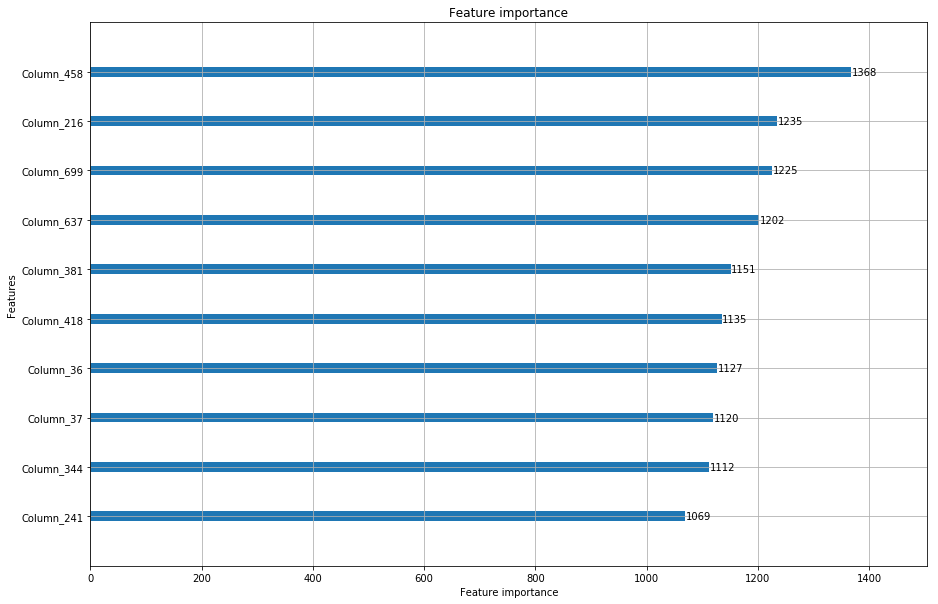

In [276]:
bestModel = lgb.Booster(model_file='/home/sh1/S3713561/work/Utilities/ltr-baseline/yahoo1/model/model.lgbm.gbdt.2000.63.0.05.0.4')
importance = bestModel.feature_importance()

lgb.plot_importance(bestModel, title='Feature importance', xlabel='Feature importance', 
                    ylabel='Features',max_num_features=10, figsize=(15,10))

## Custom Eval Metrics (Risk reward Trisk)

In [6]:
import subprocess 
import math
from pathlib import Path


bpath = "/research/remote/petabyte/users/robert/LightGBM/Experiments/"
qrelsvalid = "qrels.yahooValid"

def evalScore(file, output, qrels=qrelsvalid, depth=5):
    bashCommand = "ls"
    script = "/research/remote/petabyte/users/robert/Utilities/grdeval/target/release/grdeval"
    countndcg = subprocess.run(script + ' -k %d %s %s | head -n -1 > %s' % (depth, bpath + qrels, file, output),
                               shell=True, check=True, cwd = bpath)

#Generate runfile based on the model (Predicting)
def predictgenerateRunFile(model, output):
    bst = lgb.Booster(model_file=model)
    y_pred = bst.predict(X_test)

    #Script automation version
    result = pd.DataFrame(qid)

    #result['Pred'] = y_test << for generating qrel file
    result['Pred'] = y_pred

    #Append necessary column for trec eval
    result['model'] = 'LTR'
    result.insert(1, '2nd', 'Q0')

    #Get counts for each of the query ID and put them as the index
    qidCount = result.groupby(0)
    arr = pd.Series()
    for x in qidCount:
        #print(len(x[1]))
        arr = arr.append(pd.Series(range(1, len(x[1]) + 1)))
    arr = arr.reset_index(drop=True)
    result.insert(2, 'index', arr)

    #Create the Doc_ID for each of the query
    result.insert(2,'Doc_id', result[0].map(str) + "." + result['index'].map(str))

    #New Sorting version
    result = result.sort_values([0,'Pred'], ascending=[1,0]).reset_index(drop=True)

    #Reinsert the index
    result = result.drop(columns=['index'], axis=0)
    result.insert(3,'index',arr)

    result.to_csv(output, index=False, header=None, sep=' ')

#Generating run file after we have the prediction
def generateRunFile(pred, output):
    #Script automation version
    result = pd.DataFrame(qidValid)

    #result['Pred'] = y_test << for generating qrel file
    result['Pred'] = pred

    #Append necessary column for trec eval
    result['model'] = 'LTR'
    result.insert(1, '2nd', 'Q0')

    #Get counts for each of the query ID and put them as the index
    qidCount = result.groupby(0)
    arr = pd.Series()
    for x in qidCount:
        #print(len(x[1]))
        arr = arr.append(pd.Series(range(1, len(x[1]) + 1)))
    arr = arr.reset_index(drop=True)
    result.insert(2, 'index', arr)

    #Create the Doc_ID for each of the query
    result.insert(2,'Doc_id', result[0].map(str) + "." + result['index'].map(str))

    #New Sorting version
    result = result.sort_values([0,'Pred'], ascending=[1,0]).reset_index(drop=True)

    #Reinsert the index
    result = result.drop(columns=['index'], axis=0)
    result.insert(3,'index',arr)

    result.to_csv(output, index=False, header=None, sep=' ')

# f(preds: array, train_data: Dataset) -> name: string, eval_result: float, is_higher_better: bool
def trisk1(pred, train_data):

    # Globals
    alpha=1.0
    run_map = pred
    risk_reward = []
    baseline_map = []

    for row in range(0, train_data.data.shape[0]):
        baseline_map.append(train_data.data[row,636])

    runname = 'results/evalMetrics/runfile'
    runeval = 'results/evalMetrics/runeval'
    baselinename = 'results/evalMetrics/baselinerun'
    baselineeval = 'results/evalMetrics/baselineeval'

    generateRunFile(run_map, runname)
    evalScore(runname, runeval)

    #check if baseline exist to generate only once

    checkfile = Path(baselinename)
    if(not checkfile.exists()):
        generateRunFile(baseline_map, baselinename)
        evalScore(baselinename, baselineeval)

    try:
        run_map = pd.read_csv(runeval)
        run_map = run_map['ndcg@5']
        baseline_map = pd.read_csv(baselineeval)
        baseline_map = baseline_map['ndcg@5']
    except:
        print("No Eval file found!")

    urisk = 0.0
    c = len(pred)

    # Calculations from Dincer TRisk paper.
    def risk_reward_tradeoff_score(topic):
        r = run_map[topic]
        b = baseline_map[topic]

        if (r>b):
            return float((r - b))
        elif (r<b):
            return float((1 + alpha) * (r - b))
        else:
            return 0.000


    def sx():
        sum = 0.0
        for x in risk_reward:
            sum += ((x - urisk) ** 2)
        sum /= c
        return math.sqrt(sum)

    def parametric_standard_error_estimation():
        temp = sx()
        return (1.0 / math.sqrt(c)) * temp


    for index, topic in enumerate(run_map):
        val = risk_reward_tradeoff_score(index)
        risk_reward.append(val)

    # Calculate the mean of the risk reward scores. This is the URisk score.

    urisk = float(sum(risk_reward)) / float(len(risk_reward))

    # Calculate TRisk score
    se = parametric_standard_error_estimation()
    trisk = urisk / se

    return "Risk reward score: ", float(trisk), True
    #return "Risk reward score: ", run_map, True

In [8]:
#Setup Param File and generate different models for hyper parameter tuning
param = {'num_leaves':63, 'num_trees':2000, 'objective':'lambdarank',
     'learning_rate': 0.1,'feature_fraction': 0.4,
     'bagging_fraction': 0.8,'bagging_freq': 5,
     'verbose': 1, 'early_stopping_rounds': 175}

param['metric'] = 'None'
#Train Model
num_round = 10
bst = lgb.train(param, train_data, num_round, valid_sets=[valid_data], feval=trisk1)
bst.save_model('modelsP05LR/2000.63.0.4.withTrisk.txt')

predictgenerateRunFile('modelsP05LR/2000.63.0.4.withTrisk.txt', 'predictions05LR/2000.63.0.4.withTrisk.txt')

evalScore('predictions05LR/2000.63.0.4.withTrisk.txt', 'results/evalPerQueryLGBMTrisk', qrels='qrels.yahooTest')

TypeError: must be str, not int

In [288]:
bst = lgb.Booster(model_file='modelsP05LR/2000.63.0.4.withTrisk.txt')
y_pred = bst.predict(X_test)

#Script automation version
result = pd.DataFrame(qid)

#result['Pred'] = y_test << for generating qrel file
result['Pred'] = y_pred

#Append necessary column for trec eval
result['model'] = 'LTR'
result.insert(1, '2nd', 'Q0')

#Get counts for each of the query ID and put them as the index
qidCount = result.groupby(0)
arr = pd.Series()
for x in qidCount:
    #print(len(x[1]))
    arr = arr.append(pd.Series(range(1, len(x[1]) + 1)))
arr = arr.reset_index(drop=True)
result.insert(2, 'index', arr)

#Create the Doc_ID for each of the query
result.insert(2,'Doc_id', result[0].map(str) + "." + result['index'].map(str))

#New Sorting version
result = result.sort_values([0,'Pred'], ascending=[1,0]).reset_index(drop=True)

#Reinsert the index
result = result.drop(columns=['index'], axis=0)
result.insert(3,'index',arr)

result.to_csv('predictions05LR/2000.63.0.4.withTrisk.txt', index=False, header=None, sep=' ')

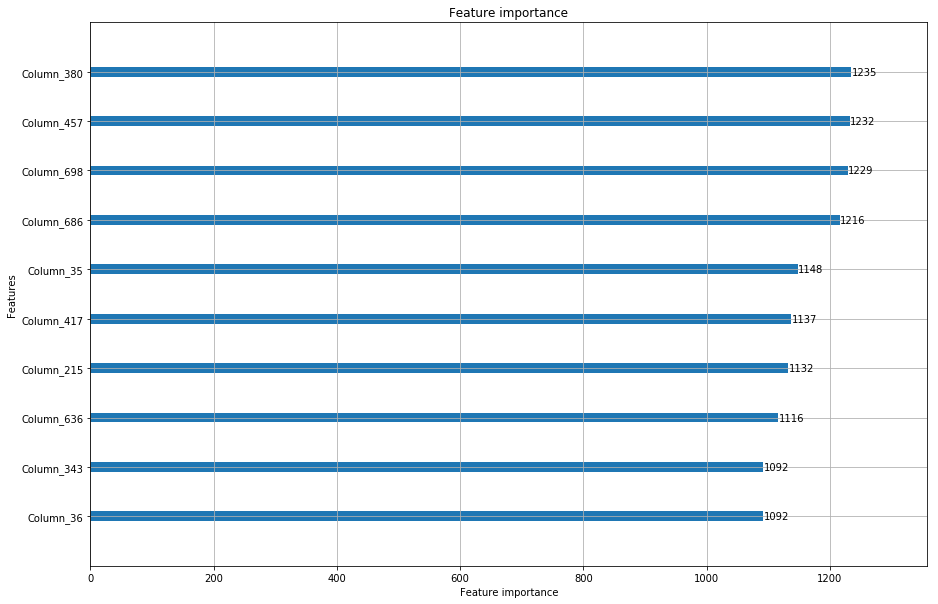

In [275]:
bestModel = lgb.Booster(model_file='modelsP05LR/2000.63.0.4.withTrisk.txt')
importance = bestModel.feature_importance()

lgb.plot_importance(bestModel, title='Feature importance', xlabel='Feature importance', 
                    ylabel='Features',max_num_features=10, figsize=(15,10))

In [279]:
#Setup Param File and generate different models for hyper parameter tuning
param = {'num_leaves':63, 'num_trees':2000, 'objective':'lambdarank',
     'learning_rate': 0.05,'feature_fraction': 0.4,
     'bagging_fraction': 0.8,'bagging_freq': 5,
     'verbose': 1}
param['metric'] = ['ndcg']

model = "modelsP05LR/2000.63.0.4.withNDCG.txt"
output = "predictions05LR/2000.63.0.4.withNDCG.txt"
#Train Model
num_round = 10
bst = lgb.train(param, train_data, num_round, valid_sets=[valid_data])
bst.save_model(model)


generateRunFile(model, output)

[1]	valid_0's ndcg@1: 0.658218	valid_0's ndcg@2: 0.651537	valid_0's ndcg@3: 0.658243	valid_0's ndcg@4: 0.668487	valid_0's ndcg@5: 0.681238
[2]	valid_0's ndcg@1: 0.676626	valid_0's ndcg@2: 0.665656	valid_0's ndcg@3: 0.673733	valid_0's ndcg@4: 0.683484	valid_0's ndcg@5: 0.695294
[3]	valid_0's ndcg@1: 0.676776	valid_0's ndcg@2: 0.667487	valid_0's ndcg@3: 0.674827	valid_0's ndcg@4: 0.683486	valid_0's ndcg@5: 0.694619
[4]	valid_0's ndcg@1: 0.678964	valid_0's ndcg@2: 0.669728	valid_0's ndcg@3: 0.677906	valid_0's ndcg@4: 0.688674	valid_0's ndcg@5: 0.699998
[5]	valid_0's ndcg@1: 0.678952	valid_0's ndcg@2: 0.667446	valid_0's ndcg@3: 0.678179	valid_0's ndcg@4: 0.687863	valid_0's ndcg@5: 0.699074
[6]	valid_0's ndcg@1: 0.679095	valid_0's ndcg@2: 0.670177	valid_0's ndcg@3: 0.679118	valid_0's ndcg@4: 0.688928	valid_0's ndcg@5: 0.70009
[7]	valid_0's ndcg@1: 0.679553	valid_0's ndcg@2: 0.670685	valid_0's ndcg@3: 0.68032	valid_0's ndcg@4: 0.690042	valid_0's ndcg@5: 0.701915
[8]	valid_0's ndcg@1: 0.68210

[61]	valid_0's ndcg@1: 0.69053	valid_0's ndcg@2: 0.68177	valid_0's ndcg@3: 0.691249	valid_0's ndcg@4: 0.700712	valid_0's ndcg@5: 0.712632
[62]	valid_0's ndcg@1: 0.692878	valid_0's ndcg@2: 0.682066	valid_0's ndcg@3: 0.692003	valid_0's ndcg@4: 0.700994	valid_0's ndcg@5: 0.713232
[63]	valid_0's ndcg@1: 0.691939	valid_0's ndcg@2: 0.682979	valid_0's ndcg@3: 0.692042	valid_0's ndcg@4: 0.701425	valid_0's ndcg@5: 0.713253
[64]	valid_0's ndcg@1: 0.693365	valid_0's ndcg@2: 0.682627	valid_0's ndcg@3: 0.692163	valid_0's ndcg@4: 0.701686	valid_0's ndcg@5: 0.713336
[65]	valid_0's ndcg@1: 0.69388	valid_0's ndcg@2: 0.682893	valid_0's ndcg@3: 0.692645	valid_0's ndcg@4: 0.701753	valid_0's ndcg@5: 0.713747
[66]	valid_0's ndcg@1: 0.693568	valid_0's ndcg@2: 0.683875	valid_0's ndcg@3: 0.692803	valid_0's ndcg@4: 0.702464	valid_0's ndcg@5: 0.713861
[67]	valid_0's ndcg@1: 0.692999	valid_0's ndcg@2: 0.68396	valid_0's ndcg@3: 0.692744	valid_0's ndcg@4: 0.702589	valid_0's ndcg@5: 0.714013
[68]	valid_0's ndcg@1: 0

[121]	valid_0's ndcg@1: 0.698648	valid_0's ndcg@2: 0.693705	valid_0's ndcg@3: 0.701133	valid_0's ndcg@4: 0.711711	valid_0's ndcg@5: 0.722733
[122]	valid_0's ndcg@1: 0.698031	valid_0's ndcg@2: 0.693153	valid_0's ndcg@3: 0.700764	valid_0's ndcg@4: 0.711326	valid_0's ndcg@5: 0.722277
[123]	valid_0's ndcg@1: 0.698158	valid_0's ndcg@2: 0.693675	valid_0's ndcg@3: 0.701222	valid_0's ndcg@4: 0.711216	valid_0's ndcg@5: 0.722729
[124]	valid_0's ndcg@1: 0.697967	valid_0's ndcg@2: 0.693181	valid_0's ndcg@3: 0.701179	valid_0's ndcg@4: 0.711351	valid_0's ndcg@5: 0.722569
[125]	valid_0's ndcg@1: 0.699008	valid_0's ndcg@2: 0.694045	valid_0's ndcg@3: 0.701726	valid_0's ndcg@4: 0.711595	valid_0's ndcg@5: 0.722835
[126]	valid_0's ndcg@1: 0.699217	valid_0's ndcg@2: 0.693948	valid_0's ndcg@3: 0.701738	valid_0's ndcg@4: 0.711665	valid_0's ndcg@5: 0.722844
[127]	valid_0's ndcg@1: 0.6982	valid_0's ndcg@2: 0.693479	valid_0's ndcg@3: 0.701255	valid_0's ndcg@4: 0.711492	valid_0's ndcg@5: 0.722832
[128]	valid_0's

[181]	valid_0's ndcg@1: 0.70396	valid_0's ndcg@2: 0.69734	valid_0's ndcg@3: 0.70623	valid_0's ndcg@4: 0.716881	valid_0's ndcg@5: 0.728282
[182]	valid_0's ndcg@1: 0.70418	valid_0's ndcg@2: 0.697626	valid_0's ndcg@3: 0.706638	valid_0's ndcg@4: 0.717065	valid_0's ndcg@5: 0.728225
[183]	valid_0's ndcg@1: 0.704352	valid_0's ndcg@2: 0.697329	valid_0's ndcg@3: 0.706466	valid_0's ndcg@4: 0.716689	valid_0's ndcg@5: 0.728406
[184]	valid_0's ndcg@1: 0.704972	valid_0's ndcg@2: 0.697988	valid_0's ndcg@3: 0.706471	valid_0's ndcg@4: 0.716746	valid_0's ndcg@5: 0.728589
[185]	valid_0's ndcg@1: 0.704565	valid_0's ndcg@2: 0.697687	valid_0's ndcg@3: 0.706206	valid_0's ndcg@4: 0.716629	valid_0's ndcg@5: 0.728621
[186]	valid_0's ndcg@1: 0.704657	valid_0's ndcg@2: 0.697871	valid_0's ndcg@3: 0.70647	valid_0's ndcg@4: 0.716556	valid_0's ndcg@5: 0.728768
[187]	valid_0's ndcg@1: 0.703442	valid_0's ndcg@2: 0.697678	valid_0's ndcg@3: 0.706181	valid_0's ndcg@4: 0.716243	valid_0's ndcg@5: 0.728696
[188]	valid_0's nd

[241]	valid_0's ndcg@1: 0.707494	valid_0's ndcg@2: 0.700486	valid_0's ndcg@3: 0.709615	valid_0's ndcg@4: 0.720235	valid_0's ndcg@5: 0.731076
[242]	valid_0's ndcg@1: 0.707558	valid_0's ndcg@2: 0.700187	valid_0's ndcg@3: 0.709976	valid_0's ndcg@4: 0.720167	valid_0's ndcg@5: 0.731072
[243]	valid_0's ndcg@1: 0.706979	valid_0's ndcg@2: 0.700501	valid_0's ndcg@3: 0.709792	valid_0's ndcg@4: 0.72017	valid_0's ndcg@5: 0.73111
[244]	valid_0's ndcg@1: 0.706387	valid_0's ndcg@2: 0.700672	valid_0's ndcg@3: 0.709669	valid_0's ndcg@4: 0.720281	valid_0's ndcg@5: 0.730936
[245]	valid_0's ndcg@1: 0.70669	valid_0's ndcg@2: 0.700542	valid_0's ndcg@3: 0.71011	valid_0's ndcg@4: 0.720595	valid_0's ndcg@5: 0.730927
[246]	valid_0's ndcg@1: 0.707141	valid_0's ndcg@2: 0.700908	valid_0's ndcg@3: 0.709938	valid_0's ndcg@4: 0.720813	valid_0's ndcg@5: 0.731197
[247]	valid_0's ndcg@1: 0.707466	valid_0's ndcg@2: 0.700977	valid_0's ndcg@3: 0.710027	valid_0's ndcg@4: 0.720741	valid_0's ndcg@5: 0.731168
[248]	valid_0's n

[301]	valid_0's ndcg@1: 0.711124	valid_0's ndcg@2: 0.704408	valid_0's ndcg@3: 0.712488	valid_0's ndcg@4: 0.722694	valid_0's ndcg@5: 0.733321
[302]	valid_0's ndcg@1: 0.710233	valid_0's ndcg@2: 0.704824	valid_0's ndcg@3: 0.712421	valid_0's ndcg@4: 0.72262	valid_0's ndcg@5: 0.733294
[303]	valid_0's ndcg@1: 0.709422	valid_0's ndcg@2: 0.704418	valid_0's ndcg@3: 0.712425	valid_0's ndcg@4: 0.722184	valid_0's ndcg@5: 0.73308
[304]	valid_0's ndcg@1: 0.709581	valid_0's ndcg@2: 0.704652	valid_0's ndcg@3: 0.712384	valid_0's ndcg@4: 0.722216	valid_0's ndcg@5: 0.732928
[305]	valid_0's ndcg@1: 0.709342	valid_0's ndcg@2: 0.704722	valid_0's ndcg@3: 0.712168	valid_0's ndcg@4: 0.722197	valid_0's ndcg@5: 0.733256
[306]	valid_0's ndcg@1: 0.709867	valid_0's ndcg@2: 0.704949	valid_0's ndcg@3: 0.712168	valid_0's ndcg@4: 0.722766	valid_0's ndcg@5: 0.733382
[307]	valid_0's ndcg@1: 0.709486	valid_0's ndcg@2: 0.704759	valid_0's ndcg@3: 0.711874	valid_0's ndcg@4: 0.722818	valid_0's ndcg@5: 0.733396
[308]	valid_0's

[361]	valid_0's ndcg@1: 0.709797	valid_0's ndcg@2: 0.705664	valid_0's ndcg@3: 0.71276	valid_0's ndcg@4: 0.723494	valid_0's ndcg@5: 0.735827
[362]	valid_0's ndcg@1: 0.710418	valid_0's ndcg@2: 0.70596	valid_0's ndcg@3: 0.712993	valid_0's ndcg@4: 0.723776	valid_0's ndcg@5: 0.735867
[363]	valid_0's ndcg@1: 0.710542	valid_0's ndcg@2: 0.705833	valid_0's ndcg@3: 0.71319	valid_0's ndcg@4: 0.723648	valid_0's ndcg@5: 0.735778
[364]	valid_0's ndcg@1: 0.710621	valid_0's ndcg@2: 0.706294	valid_0's ndcg@3: 0.713549	valid_0's ndcg@4: 0.72387	valid_0's ndcg@5: 0.73599
[365]	valid_0's ndcg@1: 0.710768	valid_0's ndcg@2: 0.706524	valid_0's ndcg@3: 0.71349	valid_0's ndcg@4: 0.723808	valid_0's ndcg@5: 0.735902
[366]	valid_0's ndcg@1: 0.710609	valid_0's ndcg@2: 0.706459	valid_0's ndcg@3: 0.713595	valid_0's ndcg@4: 0.723784	valid_0's ndcg@5: 0.735862
[367]	valid_0's ndcg@1: 0.710577	valid_0's ndcg@2: 0.706215	valid_0's ndcg@3: 0.713444	valid_0's ndcg@4: 0.723629	valid_0's ndcg@5: 0.735584
[368]	valid_0's ndc

[421]	valid_0's ndcg@1: 0.713414	valid_0's ndcg@2: 0.707721	valid_0's ndcg@3: 0.714377	valid_0's ndcg@4: 0.724777	valid_0's ndcg@5: 0.736189
[422]	valid_0's ndcg@1: 0.713366	valid_0's ndcg@2: 0.707739	valid_0's ndcg@3: 0.714509	valid_0's ndcg@4: 0.724832	valid_0's ndcg@5: 0.7363
[423]	valid_0's ndcg@1: 0.713191	valid_0's ndcg@2: 0.707321	valid_0's ndcg@3: 0.714233	valid_0's ndcg@4: 0.724782	valid_0's ndcg@5: 0.73622
[424]	valid_0's ndcg@1: 0.713433	valid_0's ndcg@2: 0.70769	valid_0's ndcg@3: 0.714614	valid_0's ndcg@4: 0.72503	valid_0's ndcg@5: 0.736079
[425]	valid_0's ndcg@1: 0.712988	valid_0's ndcg@2: 0.707536	valid_0's ndcg@3: 0.714383	valid_0's ndcg@4: 0.724791	valid_0's ndcg@5: 0.735984
[426]	valid_0's ndcg@1: 0.713083	valid_0's ndcg@2: 0.707566	valid_0's ndcg@3: 0.714341	valid_0's ndcg@4: 0.724781	valid_0's ndcg@5: 0.736161
[427]	valid_0's ndcg@1: 0.713083	valid_0's ndcg@2: 0.707648	valid_0's ndcg@3: 0.71433	valid_0's ndcg@4: 0.724735	valid_0's ndcg@5: 0.736126
[428]	valid_0's ndc

[480]	valid_0's ndcg@1: 0.716175	valid_0's ndcg@2: 0.708178	valid_0's ndcg@3: 0.714807	valid_0's ndcg@4: 0.725768	valid_0's ndcg@5: 0.736301
[481]	valid_0's ndcg@1: 0.716229	valid_0's ndcg@2: 0.708399	valid_0's ndcg@3: 0.714669	valid_0's ndcg@4: 0.725942	valid_0's ndcg@5: 0.736458
[482]	valid_0's ndcg@1: 0.716452	valid_0's ndcg@2: 0.708143	valid_0's ndcg@3: 0.714689	valid_0's ndcg@4: 0.725946	valid_0's ndcg@5: 0.736442
[483]	valid_0's ndcg@1: 0.716452	valid_0's ndcg@2: 0.708305	valid_0's ndcg@3: 0.714574	valid_0's ndcg@4: 0.725667	valid_0's ndcg@5: 0.73643
[484]	valid_0's ndcg@1: 0.716643	valid_0's ndcg@2: 0.708597	valid_0's ndcg@3: 0.714749	valid_0's ndcg@4: 0.725529	valid_0's ndcg@5: 0.73649
[485]	valid_0's ndcg@1: 0.716738	valid_0's ndcg@2: 0.70893	valid_0's ndcg@3: 0.714919	valid_0's ndcg@4: 0.725507	valid_0's ndcg@5: 0.736786
[486]	valid_0's ndcg@1: 0.716738	valid_0's ndcg@2: 0.70876	valid_0's ndcg@3: 0.715026	valid_0's ndcg@4: 0.725678	valid_0's ndcg@5: 0.73689
[487]	valid_0's nd

[540]	valid_0's ndcg@1: 0.714419	valid_0's ndcg@2: 0.708052	valid_0's ndcg@3: 0.714755	valid_0's ndcg@4: 0.725942	valid_0's ndcg@5: 0.736755
[541]	valid_0's ndcg@1: 0.714642	valid_0's ndcg@2: 0.70799	valid_0's ndcg@3: 0.714861	valid_0's ndcg@4: 0.725865	valid_0's ndcg@5: 0.736797
[542]	valid_0's ndcg@1: 0.714642	valid_0's ndcg@2: 0.707858	valid_0's ndcg@3: 0.714706	valid_0's ndcg@4: 0.725755	valid_0's ndcg@5: 0.73692
[543]	valid_0's ndcg@1: 0.7151	valid_0's ndcg@2: 0.707778	valid_0's ndcg@3: 0.714704	valid_0's ndcg@4: 0.725761	valid_0's ndcg@5: 0.736978
[544]	valid_0's ndcg@1: 0.714766	valid_0's ndcg@2: 0.707896	valid_0's ndcg@3: 0.714917	valid_0's ndcg@4: 0.725803	valid_0's ndcg@5: 0.737037
[545]	valid_0's ndcg@1: 0.714766	valid_0's ndcg@2: 0.708404	valid_0's ndcg@3: 0.714959	valid_0's ndcg@4: 0.725993	valid_0's ndcg@5: 0.73708
[546]	valid_0's ndcg@1: 0.71483	valid_0's ndcg@2: 0.708307	valid_0's ndcg@3: 0.715198	valid_0's ndcg@4: 0.725961	valid_0's ndcg@5: 0.737115
[547]	valid_0's ndc

[599]	valid_0's ndcg@1: 0.716528	valid_0's ndcg@2: 0.709281	valid_0's ndcg@3: 0.716507	valid_0's ndcg@4: 0.727911	valid_0's ndcg@5: 0.738314
[600]	valid_0's ndcg@1: 0.717371	valid_0's ndcg@2: 0.709214	valid_0's ndcg@3: 0.716658	valid_0's ndcg@4: 0.7281	valid_0's ndcg@5: 0.738428
[601]	valid_0's ndcg@1: 0.71788	valid_0's ndcg@2: 0.709329	valid_0's ndcg@3: 0.716746	valid_0's ndcg@4: 0.728041	valid_0's ndcg@5: 0.738207
[602]	valid_0's ndcg@1: 0.717912	valid_0's ndcg@2: 0.709473	valid_0's ndcg@3: 0.716615	valid_0's ndcg@4: 0.72788	valid_0's ndcg@5: 0.738099
[603]	valid_0's ndcg@1: 0.717371	valid_0's ndcg@2: 0.709717	valid_0's ndcg@3: 0.716704	valid_0's ndcg@4: 0.727846	valid_0's ndcg@5: 0.73806
[604]	valid_0's ndcg@1: 0.716865	valid_0's ndcg@2: 0.709492	valid_0's ndcg@3: 0.716574	valid_0's ndcg@4: 0.727678	valid_0's ndcg@5: 0.738026
[605]	valid_0's ndcg@1: 0.717088	valid_0's ndcg@2: 0.709616	valid_0's ndcg@3: 0.716834	valid_0's ndcg@4: 0.727567	valid_0's ndcg@5: 0.738128
[606]	valid_0's nd

[659]	valid_0's ndcg@1: 0.718545	valid_0's ndcg@2: 0.710877	valid_0's ndcg@3: 0.718273	valid_0's ndcg@4: 0.729276	valid_0's ndcg@5: 0.739426
[660]	valid_0's ndcg@1: 0.718523	valid_0's ndcg@2: 0.711033	valid_0's ndcg@3: 0.718428	valid_0's ndcg@4: 0.729296	valid_0's ndcg@5: 0.739601
[661]	valid_0's ndcg@1: 0.718332	valid_0's ndcg@2: 0.711316	valid_0's ndcg@3: 0.718487	valid_0's ndcg@4: 0.729446	valid_0's ndcg@5: 0.739546
[662]	valid_0's ndcg@1: 0.719079	valid_0's ndcg@2: 0.711355	valid_0's ndcg@3: 0.718441	valid_0's ndcg@4: 0.729378	valid_0's ndcg@5: 0.739714
[663]	valid_0's ndcg@1: 0.718968	valid_0's ndcg@2: 0.711186	valid_0's ndcg@3: 0.717981	valid_0's ndcg@4: 0.729195	valid_0's ndcg@5: 0.739696
[664]	valid_0's ndcg@1: 0.719366	valid_0's ndcg@2: 0.711339	valid_0's ndcg@3: 0.718118	valid_0's ndcg@4: 0.729267	valid_0's ndcg@5: 0.739525
[665]	valid_0's ndcg@1: 0.718857	valid_0's ndcg@2: 0.711522	valid_0's ndcg@3: 0.71813	valid_0's ndcg@4: 0.729312	valid_0's ndcg@5: 0.739533
[666]	valid_0'

[718]	valid_0's ndcg@1: 0.717212	valid_0's ndcg@2: 0.711781	valid_0's ndcg@3: 0.718942	valid_0's ndcg@4: 0.729063	valid_0's ndcg@5: 0.740438
[719]	valid_0's ndcg@1: 0.717403	valid_0's ndcg@2: 0.711666	valid_0's ndcg@3: 0.719087	valid_0's ndcg@4: 0.729078	valid_0's ndcg@5: 0.740685
[720]	valid_0's ndcg@1: 0.717451	valid_0's ndcg@2: 0.711899	valid_0's ndcg@3: 0.719048	valid_0's ndcg@4: 0.729304	valid_0's ndcg@5: 0.740712
[721]	valid_0's ndcg@1: 0.71782	valid_0's ndcg@2: 0.711471	valid_0's ndcg@3: 0.719218	valid_0's ndcg@4: 0.729225	valid_0's ndcg@5: 0.740743
[722]	valid_0's ndcg@1: 0.71782	valid_0's ndcg@2: 0.711468	valid_0's ndcg@3: 0.719227	valid_0's ndcg@4: 0.729313	valid_0's ndcg@5: 0.740652
[723]	valid_0's ndcg@1: 0.717724	valid_0's ndcg@2: 0.711379	valid_0's ndcg@3: 0.718999	valid_0's ndcg@4: 0.729163	valid_0's ndcg@5: 0.740634
[724]	valid_0's ndcg@1: 0.717533	valid_0's ndcg@2: 0.711499	valid_0's ndcg@3: 0.718894	valid_0's ndcg@4: 0.729238	valid_0's ndcg@5: 0.740433
[725]	valid_0's

[777]	valid_0's ndcg@1: 0.720473	valid_0's ndcg@2: 0.713034	valid_0's ndcg@3: 0.719123	valid_0's ndcg@4: 0.730083	valid_0's ndcg@5: 0.741155
[778]	valid_0's ndcg@1: 0.721141	valid_0's ndcg@2: 0.713318	valid_0's ndcg@3: 0.719437	valid_0's ndcg@4: 0.730393	valid_0's ndcg@5: 0.741262
[779]	valid_0's ndcg@1: 0.720902	valid_0's ndcg@2: 0.713154	valid_0's ndcg@3: 0.719471	valid_0's ndcg@4: 0.730316	valid_0's ndcg@5: 0.741091
[780]	valid_0's ndcg@1: 0.720485	valid_0's ndcg@2: 0.713344	valid_0's ndcg@3: 0.719391	valid_0's ndcg@4: 0.730391	valid_0's ndcg@5: 0.741061
[781]	valid_0's ndcg@1: 0.720854	valid_0's ndcg@2: 0.713438	valid_0's ndcg@3: 0.719456	valid_0's ndcg@4: 0.73051	valid_0's ndcg@5: 0.741115
[782]	valid_0's ndcg@1: 0.720664	valid_0's ndcg@2: 0.713436	valid_0's ndcg@3: 0.719613	valid_0's ndcg@4: 0.730355	valid_0's ndcg@5: 0.741135
[783]	valid_0's ndcg@1: 0.720664	valid_0's ndcg@2: 0.713358	valid_0's ndcg@3: 0.719449	valid_0's ndcg@4: 0.73041	valid_0's ndcg@5: 0.741126
[784]	valid_0's

[836]	valid_0's ndcg@1: 0.719452	valid_0's ndcg@2: 0.71339	valid_0's ndcg@3: 0.719989	valid_0's ndcg@4: 0.73017	valid_0's ndcg@5: 0.740936
[837]	valid_0's ndcg@1: 0.719118	valid_0's ndcg@2: 0.713401	valid_0's ndcg@3: 0.719884	valid_0's ndcg@4: 0.730134	valid_0's ndcg@5: 0.740896
[838]	valid_0's ndcg@1: 0.719452	valid_0's ndcg@2: 0.713678	valid_0's ndcg@3: 0.719977	valid_0's ndcg@4: 0.730088	valid_0's ndcg@5: 0.741081
[839]	valid_0's ndcg@1: 0.719805	valid_0's ndcg@2: 0.713472	valid_0's ndcg@3: 0.719926	valid_0's ndcg@4: 0.729944	valid_0's ndcg@5: 0.741128
[840]	valid_0's ndcg@1: 0.719916	valid_0's ndcg@2: 0.713219	valid_0's ndcg@3: 0.719999	valid_0's ndcg@4: 0.729941	valid_0's ndcg@5: 0.741098
[841]	valid_0's ndcg@1: 0.71963	valid_0's ndcg@2: 0.713175	valid_0's ndcg@3: 0.719985	valid_0's ndcg@4: 0.730102	valid_0's ndcg@5: 0.740861
[842]	valid_0's ndcg@1: 0.719487	valid_0's ndcg@2: 0.713178	valid_0's ndcg@3: 0.719925	valid_0's ndcg@4: 0.73012	valid_0's ndcg@5: 0.740853
[843]	valid_0's n

[895]	valid_0's ndcg@1: 0.721716	valid_0's ndcg@2: 0.715159	valid_0's ndcg@3: 0.721568	valid_0's ndcg@4: 0.731571	valid_0's ndcg@5: 0.742402
[896]	valid_0's ndcg@1: 0.721984	valid_0's ndcg@2: 0.715287	valid_0's ndcg@3: 0.72186	valid_0's ndcg@4: 0.731434	valid_0's ndcg@5: 0.742419
[897]	valid_0's ndcg@1: 0.721888	valid_0's ndcg@2: 0.715366	valid_0's ndcg@3: 0.721838	valid_0's ndcg@4: 0.731555	valid_0's ndcg@5: 0.742492
[898]	valid_0's ndcg@1: 0.721888	valid_0's ndcg@2: 0.715378	valid_0's ndcg@3: 0.721954	valid_0's ndcg@4: 0.731625	valid_0's ndcg@5: 0.742549
[899]	valid_0's ndcg@1: 0.722626	valid_0's ndcg@2: 0.71543	valid_0's ndcg@3: 0.722079	valid_0's ndcg@4: 0.731713	valid_0's ndcg@5: 0.742571
[900]	valid_0's ndcg@1: 0.72261	valid_0's ndcg@2: 0.715386	valid_0's ndcg@3: 0.721938	valid_0's ndcg@4: 0.731547	valid_0's ndcg@5: 0.742514
[901]	valid_0's ndcg@1: 0.722143	valid_0's ndcg@2: 0.715086	valid_0's ndcg@3: 0.721635	valid_0's ndcg@4: 0.731262	valid_0's ndcg@5: 0.742195
[902]	valid_0's 

[954]	valid_0's ndcg@1: 0.721491	valid_0's ndcg@2: 0.715084	valid_0's ndcg@3: 0.722037	valid_0's ndcg@4: 0.730902	valid_0's ndcg@5: 0.742764
[955]	valid_0's ndcg@1: 0.721204	valid_0's ndcg@2: 0.715038	valid_0's ndcg@3: 0.721878	valid_0's ndcg@4: 0.730978	valid_0's ndcg@5: 0.742937
[956]	valid_0's ndcg@1: 0.720632	valid_0's ndcg@2: 0.714897	valid_0's ndcg@3: 0.721557	valid_0's ndcg@4: 0.730958	valid_0's ndcg@5: 0.742847
[957]	valid_0's ndcg@1: 0.720664	valid_0's ndcg@2: 0.714606	valid_0's ndcg@3: 0.721781	valid_0's ndcg@4: 0.731078	valid_0's ndcg@5: 0.742745
[958]	valid_0's ndcg@1: 0.720807	valid_0's ndcg@2: 0.714694	valid_0's ndcg@3: 0.721818	valid_0's ndcg@4: 0.731138	valid_0's ndcg@5: 0.742842
[959]	valid_0's ndcg@1: 0.7213	valid_0's ndcg@2: 0.714947	valid_0's ndcg@3: 0.721953	valid_0's ndcg@4: 0.731126	valid_0's ndcg@5: 0.742987
[960]	valid_0's ndcg@1: 0.721363	valid_0's ndcg@2: 0.714987	valid_0's ndcg@3: 0.722024	valid_0's ndcg@4: 0.731139	valid_0's ndcg@5: 0.743006
[961]	valid_0's

[1013]	valid_0's ndcg@1: 0.722308	valid_0's ndcg@2: 0.715611	valid_0's ndcg@3: 0.722298	valid_0's ndcg@4: 0.732188	valid_0's ndcg@5: 0.743458
[1014]	valid_0's ndcg@1: 0.722324	valid_0's ndcg@2: 0.71567	valid_0's ndcg@3: 0.722036	valid_0's ndcg@4: 0.732347	valid_0's ndcg@5: 0.743582
[1015]	valid_0's ndcg@1: 0.722324	valid_0's ndcg@2: 0.715519	valid_0's ndcg@3: 0.7222	valid_0's ndcg@4: 0.732328	valid_0's ndcg@5: 0.743549
[1016]	valid_0's ndcg@1: 0.722324	valid_0's ndcg@2: 0.715649	valid_0's ndcg@3: 0.722151	valid_0's ndcg@4: 0.732321	valid_0's ndcg@5: 0.743453
[1017]	valid_0's ndcg@1: 0.722229	valid_0's ndcg@2: 0.715328	valid_0's ndcg@3: 0.722283	valid_0's ndcg@4: 0.73234	valid_0's ndcg@5: 0.743241
[1018]	valid_0's ndcg@1: 0.722101	valid_0's ndcg@2: 0.715447	valid_0's ndcg@3: 0.72241	valid_0's ndcg@4: 0.732331	valid_0's ndcg@5: 0.743349
[1019]	valid_0's ndcg@1: 0.721802	valid_0's ndcg@2: 0.715482	valid_0's ndcg@3: 0.722293	valid_0's ndcg@4: 0.732299	valid_0's ndcg@5: 0.743315
[1020]	vali

[1073]	valid_0's ndcg@1: 0.721274	valid_0's ndcg@2: 0.715468	valid_0's ndcg@3: 0.722099	valid_0's ndcg@4: 0.73243	valid_0's ndcg@5: 0.744034
[1074]	valid_0's ndcg@1: 0.72137	valid_0's ndcg@2: 0.715566	valid_0's ndcg@3: 0.722031	valid_0's ndcg@4: 0.732364	valid_0's ndcg@5: 0.74404
[1075]	valid_0's ndcg@1: 0.721815	valid_0's ndcg@2: 0.715659	valid_0's ndcg@3: 0.722308	valid_0's ndcg@4: 0.73276	valid_0's ndcg@5: 0.744247
[1076]	valid_0's ndcg@1: 0.722038	valid_0's ndcg@2: 0.715912	valid_0's ndcg@3: 0.722162	valid_0's ndcg@4: 0.732781	valid_0's ndcg@5: 0.744257
[1077]	valid_0's ndcg@1: 0.721497	valid_0's ndcg@2: 0.716085	valid_0's ndcg@3: 0.722038	valid_0's ndcg@4: 0.73263	valid_0's ndcg@5: 0.74424
[1078]	valid_0's ndcg@1: 0.721211	valid_0's ndcg@2: 0.716034	valid_0's ndcg@3: 0.721994	valid_0's ndcg@4: 0.732594	valid_0's ndcg@5: 0.744138
[1079]	valid_0's ndcg@1: 0.721099	valid_0's ndcg@2: 0.715909	valid_0's ndcg@3: 0.722005	valid_0's ndcg@4: 0.732667	valid_0's ndcg@5: 0.744134
[1080]	valid

[1131]	valid_0's ndcg@1: 0.722057	valid_0's ndcg@2: 0.714808	valid_0's ndcg@3: 0.72198	valid_0's ndcg@4: 0.733319	valid_0's ndcg@5: 0.744416
[1132]	valid_0's ndcg@1: 0.722133	valid_0's ndcg@2: 0.714608	valid_0's ndcg@3: 0.721926	valid_0's ndcg@4: 0.733247	valid_0's ndcg@5: 0.744353
[1133]	valid_0's ndcg@1: 0.722038	valid_0's ndcg@2: 0.714746	valid_0's ndcg@3: 0.721934	valid_0's ndcg@4: 0.733035	valid_0's ndcg@5: 0.744404
[1134]	valid_0's ndcg@1: 0.722038	valid_0's ndcg@2: 0.714763	valid_0's ndcg@3: 0.722015	valid_0's ndcg@4: 0.733015	valid_0's ndcg@5: 0.744277
[1135]	valid_0's ndcg@1: 0.722547	valid_0's ndcg@2: 0.714806	valid_0's ndcg@3: 0.722229	valid_0's ndcg@4: 0.733079	valid_0's ndcg@5: 0.744344
[1136]	valid_0's ndcg@1: 0.722725	valid_0's ndcg@2: 0.71489	valid_0's ndcg@3: 0.722265	valid_0's ndcg@4: 0.733075	valid_0's ndcg@5: 0.744379
[1137]	valid_0's ndcg@1: 0.722963	valid_0's ndcg@2: 0.714957	valid_0's ndcg@3: 0.722387	valid_0's ndcg@4: 0.73315	valid_0's ndcg@5: 0.744493
[1138]	va

[1191]	valid_0's ndcg@1: 0.722489	valid_0's ndcg@2: 0.714628	valid_0's ndcg@3: 0.723117	valid_0's ndcg@4: 0.733436	valid_0's ndcg@5: 0.744479
[1192]	valid_0's ndcg@1: 0.721933	valid_0's ndcg@2: 0.714496	valid_0's ndcg@3: 0.722899	valid_0's ndcg@4: 0.733326	valid_0's ndcg@5: 0.744313
[1193]	valid_0's ndcg@1: 0.722578	valid_0's ndcg@2: 0.714637	valid_0's ndcg@3: 0.723095	valid_0's ndcg@4: 0.733431	valid_0's ndcg@5: 0.744545
[1194]	valid_0's ndcg@1: 0.722435	valid_0's ndcg@2: 0.714605	valid_0's ndcg@3: 0.72298	valid_0's ndcg@4: 0.733405	valid_0's ndcg@5: 0.744557
[1195]	valid_0's ndcg@1: 0.722569	valid_0's ndcg@2: 0.71485	valid_0's ndcg@3: 0.722981	valid_0's ndcg@4: 0.733428	valid_0's ndcg@5: 0.744432
[1196]	valid_0's ndcg@1: 0.722569	valid_0's ndcg@2: 0.714983	valid_0's ndcg@3: 0.723204	valid_0's ndcg@4: 0.733482	valid_0's ndcg@5: 0.744381
[1197]	valid_0's ndcg@1: 0.723606	valid_0's ndcg@2: 0.715568	valid_0's ndcg@3: 0.723431	valid_0's ndcg@4: 0.733896	valid_0's ndcg@5: 0.744676
[1198]	v

[1251]	valid_0's ndcg@1: 0.721252	valid_0's ndcg@2: 0.714893	valid_0's ndcg@3: 0.722633	valid_0's ndcg@4: 0.733136	valid_0's ndcg@5: 0.744033
[1252]	valid_0's ndcg@1: 0.722111	valid_0's ndcg@2: 0.715221	valid_0's ndcg@3: 0.723011	valid_0's ndcg@4: 0.7333	valid_0's ndcg@5: 0.744255
[1253]	valid_0's ndcg@1: 0.722111	valid_0's ndcg@2: 0.715135	valid_0's ndcg@3: 0.722878	valid_0's ndcg@4: 0.733233	valid_0's ndcg@5: 0.744155
[1254]	valid_0's ndcg@1: 0.722111	valid_0's ndcg@2: 0.715142	valid_0's ndcg@3: 0.723074	valid_0's ndcg@4: 0.7332	valid_0's ndcg@5: 0.744223
[1255]	valid_0's ndcg@1: 0.722378	valid_0's ndcg@2: 0.715585	valid_0's ndcg@3: 0.723297	valid_0's ndcg@4: 0.733371	valid_0's ndcg@5: 0.744245
[1256]	valid_0's ndcg@1: 0.722601	valid_0's ndcg@2: 0.715808	valid_0's ndcg@3: 0.723204	valid_0's ndcg@4: 0.733649	valid_0's ndcg@5: 0.744082
[1257]	valid_0's ndcg@1: 0.722613	valid_0's ndcg@2: 0.715782	valid_0's ndcg@3: 0.723178	valid_0's ndcg@4: 0.733781	valid_0's ndcg@5: 0.744412
[1258]	val

[1309]	valid_0's ndcg@1: 0.721478	valid_0's ndcg@2: 0.716381	valid_0's ndcg@3: 0.723637	valid_0's ndcg@4: 0.734206	valid_0's ndcg@5: 0.744691
[1310]	valid_0's ndcg@1: 0.721255	valid_0's ndcg@2: 0.71633	valid_0's ndcg@3: 0.723397	valid_0's ndcg@4: 0.734085	valid_0's ndcg@5: 0.744552
[1311]	valid_0's ndcg@1: 0.722369	valid_0's ndcg@2: 0.71648	valid_0's ndcg@3: 0.723721	valid_0's ndcg@4: 0.734326	valid_0's ndcg@5: 0.744739
[1312]	valid_0's ndcg@1: 0.723037	valid_0's ndcg@2: 0.716509	valid_0's ndcg@3: 0.723874	valid_0's ndcg@4: 0.734398	valid_0's ndcg@5: 0.744845
[1313]	valid_0's ndcg@1: 0.72248	valid_0's ndcg@2: 0.716331	valid_0's ndcg@3: 0.723669	valid_0's ndcg@4: 0.734417	valid_0's ndcg@5: 0.744762
[1314]	valid_0's ndcg@1: 0.72297	valid_0's ndcg@2: 0.716747	valid_0's ndcg@3: 0.723852	valid_0's ndcg@4: 0.734534	valid_0's ndcg@5: 0.745042
[1315]	valid_0's ndcg@1: 0.723192	valid_0's ndcg@2: 0.716729	valid_0's ndcg@3: 0.72384	valid_0's ndcg@4: 0.734514	valid_0's ndcg@5: 0.745028
[1316]	vali

[1367]	valid_0's ndcg@1: 0.725098	valid_0's ndcg@2: 0.716677	valid_0's ndcg@3: 0.724089	valid_0's ndcg@4: 0.734743	valid_0's ndcg@5: 0.744984
[1368]	valid_0's ndcg@1: 0.725384	valid_0's ndcg@2: 0.716786	valid_0's ndcg@3: 0.724273	valid_0's ndcg@4: 0.734812	valid_0's ndcg@5: 0.745089
[1369]	valid_0's ndcg@1: 0.725336	valid_0's ndcg@2: 0.716772	valid_0's ndcg@3: 0.724218	valid_0's ndcg@4: 0.734787	valid_0's ndcg@5: 0.745216
[1370]	valid_0's ndcg@1: 0.725114	valid_0's ndcg@2: 0.716616	valid_0's ndcg@3: 0.724097	valid_0's ndcg@4: 0.734685	valid_0's ndcg@5: 0.745183
[1371]	valid_0's ndcg@1: 0.725114	valid_0's ndcg@2: 0.716616	valid_0's ndcg@3: 0.723986	valid_0's ndcg@4: 0.734682	valid_0's ndcg@5: 0.745269
[1372]	valid_0's ndcg@1: 0.725069	valid_0's ndcg@2: 0.716563	valid_0's ndcg@3: 0.723985	valid_0's ndcg@4: 0.734715	valid_0's ndcg@5: 0.745249
[1373]	valid_0's ndcg@1: 0.724878	valid_0's ndcg@2: 0.716673	valid_0's ndcg@3: 0.723857	valid_0's ndcg@4: 0.734692	valid_0's ndcg@5: 0.745312
[1374]

[1425]	valid_0's ndcg@1: 0.725063	valid_0's ndcg@2: 0.717856	valid_0's ndcg@3: 0.724168	valid_0's ndcg@4: 0.735745	valid_0's ndcg@5: 0.746205
[1426]	valid_0's ndcg@1: 0.725553	valid_0's ndcg@2: 0.718091	valid_0's ndcg@3: 0.724353	valid_0's ndcg@4: 0.735857	valid_0's ndcg@5: 0.746326
[1427]	valid_0's ndcg@1: 0.725934	valid_0's ndcg@2: 0.718004	valid_0's ndcg@3: 0.724392	valid_0's ndcg@4: 0.73583	valid_0's ndcg@5: 0.746328
[1428]	valid_0's ndcg@1: 0.725222	valid_0's ndcg@2: 0.717854	valid_0's ndcg@3: 0.724396	valid_0's ndcg@4: 0.735898	valid_0's ndcg@5: 0.746273
[1429]	valid_0's ndcg@1: 0.725222	valid_0's ndcg@2: 0.717928	valid_0's ndcg@3: 0.724516	valid_0's ndcg@4: 0.735892	valid_0's ndcg@5: 0.746147
[1430]	valid_0's ndcg@1: 0.724888	valid_0's ndcg@2: 0.717982	valid_0's ndcg@3: 0.724441	valid_0's ndcg@4: 0.73585	valid_0's ndcg@5: 0.746028
[1431]	valid_0's ndcg@1: 0.724621	valid_0's ndcg@2: 0.718035	valid_0's ndcg@3: 0.724199	valid_0's ndcg@4: 0.735902	valid_0's ndcg@5: 0.745938
[1432]	v

[1485]	valid_0's ndcg@1: 0.723218	valid_0's ndcg@2: 0.717185	valid_0's ndcg@3: 0.724043	valid_0's ndcg@4: 0.735669	valid_0's ndcg@5: 0.7465
[1486]	valid_0's ndcg@1: 0.723568	valid_0's ndcg@2: 0.717304	valid_0's ndcg@3: 0.724046	valid_0's ndcg@4: 0.735828	valid_0's ndcg@5: 0.746588
[1487]	valid_0's ndcg@1: 0.723075	valid_0's ndcg@2: 0.717232	valid_0's ndcg@3: 0.723752	valid_0's ndcg@4: 0.735643	valid_0's ndcg@5: 0.746265
[1488]	valid_0's ndcg@1: 0.722963	valid_0's ndcg@2: 0.71726	valid_0's ndcg@3: 0.723883	valid_0's ndcg@4: 0.735818	valid_0's ndcg@5: 0.74626
[1489]	valid_0's ndcg@1: 0.723253	valid_0's ndcg@2: 0.717218	valid_0's ndcg@3: 0.724122	valid_0's ndcg@4: 0.735911	valid_0's ndcg@5: 0.746652
[1490]	valid_0's ndcg@1: 0.723078	valid_0's ndcg@2: 0.71694	valid_0's ndcg@3: 0.724052	valid_0's ndcg@4: 0.735891	valid_0's ndcg@5: 0.746633
[1491]	valid_0's ndcg@1: 0.723078	valid_0's ndcg@2: 0.716657	valid_0's ndcg@3: 0.723952	valid_0's ndcg@4: 0.735841	valid_0's ndcg@5: 0.746623
[1492]	vali

[1544]	valid_0's ndcg@1: 0.724347	valid_0's ndcg@2: 0.71807	valid_0's ndcg@3: 0.72442	valid_0's ndcg@4: 0.736408	valid_0's ndcg@5: 0.74641
[1545]	valid_0's ndcg@1: 0.724614	valid_0's ndcg@2: 0.718179	valid_0's ndcg@3: 0.724459	valid_0's ndcg@4: 0.736341	valid_0's ndcg@5: 0.746387
[1546]	valid_0's ndcg@1: 0.724347	valid_0's ndcg@2: 0.718155	valid_0's ndcg@3: 0.724232	valid_0's ndcg@4: 0.73618	valid_0's ndcg@5: 0.746335
[1547]	valid_0's ndcg@1: 0.724236	valid_0's ndcg@2: 0.718168	valid_0's ndcg@3: 0.724409	valid_0's ndcg@4: 0.73623	valid_0's ndcg@5: 0.746523
[1548]	valid_0's ndcg@1: 0.724013	valid_0's ndcg@2: 0.718379	valid_0's ndcg@3: 0.724416	valid_0's ndcg@4: 0.736205	valid_0's ndcg@5: 0.746531
[1549]	valid_0's ndcg@1: 0.724824	valid_0's ndcg@2: 0.718337	valid_0's ndcg@3: 0.724541	valid_0's ndcg@4: 0.736276	valid_0's ndcg@5: 0.746576
[1550]	valid_0's ndcg@1: 0.725015	valid_0's ndcg@2: 0.718294	valid_0's ndcg@3: 0.724635	valid_0's ndcg@4: 0.736521	valid_0's ndcg@5: 0.746576
[1551]	vali

[1602]	valid_0's ndcg@1: 0.723189	valid_0's ndcg@2: 0.717394	valid_0's ndcg@3: 0.724149	valid_0's ndcg@4: 0.735305	valid_0's ndcg@5: 0.746001
[1603]	valid_0's ndcg@1: 0.72338	valid_0's ndcg@2: 0.717523	valid_0's ndcg@3: 0.724382	valid_0's ndcg@4: 0.735372	valid_0's ndcg@5: 0.746168
[1604]	valid_0's ndcg@1: 0.723558	valid_0's ndcg@2: 0.717574	valid_0's ndcg@3: 0.724392	valid_0's ndcg@4: 0.735349	valid_0's ndcg@5: 0.746258
[1605]	valid_0's ndcg@1: 0.723558	valid_0's ndcg@2: 0.717648	valid_0's ndcg@3: 0.724406	valid_0's ndcg@4: 0.735441	valid_0's ndcg@5: 0.746333
[1606]	valid_0's ndcg@1: 0.723558	valid_0's ndcg@2: 0.717802	valid_0's ndcg@3: 0.724685	valid_0's ndcg@4: 0.735494	valid_0's ndcg@5: 0.746409
[1607]	valid_0's ndcg@1: 0.723558	valid_0's ndcg@2: 0.717882	valid_0's ndcg@3: 0.724571	valid_0's ndcg@4: 0.735428	valid_0's ndcg@5: 0.746362
[1608]	valid_0's ndcg@1: 0.723558	valid_0's ndcg@2: 0.717972	valid_0's ndcg@3: 0.724854	valid_0's ndcg@4: 0.73553	valid_0's ndcg@5: 0.746421
[1609]	v

[1662]	valid_0's ndcg@1: 0.724185	valid_0's ndcg@2: 0.71837	valid_0's ndcg@3: 0.72538	valid_0's ndcg@4: 0.736571	valid_0's ndcg@5: 0.747082
[1663]	valid_0's ndcg@1: 0.724376	valid_0's ndcg@2: 0.718559	valid_0's ndcg@3: 0.725451	valid_0's ndcg@4: 0.736596	valid_0's ndcg@5: 0.747137
[1664]	valid_0's ndcg@1: 0.724487	valid_0's ndcg@2: 0.718096	valid_0's ndcg@3: 0.725463	valid_0's ndcg@4: 0.736552	valid_0's ndcg@5: 0.747288
[1665]	valid_0's ndcg@1: 0.724487	valid_0's ndcg@2: 0.718347	valid_0's ndcg@3: 0.725553	valid_0's ndcg@4: 0.736569	valid_0's ndcg@5: 0.747241
[1666]	valid_0's ndcg@1: 0.724331	valid_0's ndcg@2: 0.718455	valid_0's ndcg@3: 0.72555	valid_0's ndcg@4: 0.736571	valid_0's ndcg@5: 0.747157
[1667]	valid_0's ndcg@1: 0.723711	valid_0's ndcg@2: 0.718315	valid_0's ndcg@3: 0.725443	valid_0's ndcg@4: 0.736409	valid_0's ndcg@5: 0.747029
[1668]	valid_0's ndcg@1: 0.723711	valid_0's ndcg@2: 0.718315	valid_0's ndcg@3: 0.72555	valid_0's ndcg@4: 0.736455	valid_0's ndcg@5: 0.747024
[1669]	val

[1721]	valid_0's ndcg@1: 0.725744	valid_0's ndcg@2: 0.718897	valid_0's ndcg@3: 0.726244	valid_0's ndcg@4: 0.737865	valid_0's ndcg@5: 0.74799
[1722]	valid_0's ndcg@1: 0.725616	valid_0's ndcg@2: 0.718922	valid_0's ndcg@3: 0.726033	valid_0's ndcg@4: 0.737832	valid_0's ndcg@5: 0.747829
[1723]	valid_0's ndcg@1: 0.725712	valid_0's ndcg@2: 0.718816	valid_0's ndcg@3: 0.726186	valid_0's ndcg@4: 0.73785	valid_0's ndcg@5: 0.747789
[1724]	valid_0's ndcg@1: 0.725712	valid_0's ndcg@2: 0.718927	valid_0's ndcg@3: 0.726093	valid_0's ndcg@4: 0.737781	valid_0's ndcg@5: 0.747878
[1725]	valid_0's ndcg@1: 0.725489	valid_0's ndcg@2: 0.718864	valid_0's ndcg@3: 0.72607	valid_0's ndcg@4: 0.737716	valid_0's ndcg@5: 0.747919
[1726]	valid_0's ndcg@1: 0.725266	valid_0's ndcg@2: 0.718589	valid_0's ndcg@3: 0.725801	valid_0's ndcg@4: 0.73762	valid_0's ndcg@5: 0.747971
[1727]	valid_0's ndcg@1: 0.724821	valid_0's ndcg@2: 0.71858	valid_0's ndcg@3: 0.725575	valid_0's ndcg@4: 0.737396	valid_0's ndcg@5: 0.747925
[1728]	vali

[1779]	valid_0's ndcg@1: 0.725165	valid_0's ndcg@2: 0.719304	valid_0's ndcg@3: 0.725789	valid_0's ndcg@4: 0.737378	valid_0's ndcg@5: 0.748109
[1780]	valid_0's ndcg@1: 0.725117	valid_0's ndcg@2: 0.719422	valid_0's ndcg@3: 0.725805	valid_0's ndcg@4: 0.737629	valid_0's ndcg@5: 0.748221
[1781]	valid_0's ndcg@1: 0.725228	valid_0's ndcg@2: 0.719408	valid_0's ndcg@3: 0.725806	valid_0's ndcg@4: 0.737669	valid_0's ndcg@5: 0.748233
[1782]	valid_0's ndcg@1: 0.724799	valid_0's ndcg@2: 0.719209	valid_0's ndcg@3: 0.725641	valid_0's ndcg@4: 0.737553	valid_0's ndcg@5: 0.748177
[1783]	valid_0's ndcg@1: 0.72491	valid_0's ndcg@2: 0.718965	valid_0's ndcg@3: 0.725629	valid_0's ndcg@4: 0.737532	valid_0's ndcg@5: 0.748163
[1784]	valid_0's ndcg@1: 0.72491	valid_0's ndcg@2: 0.719039	valid_0's ndcg@3: 0.725588	valid_0's ndcg@4: 0.737548	valid_0's ndcg@5: 0.747999
[1785]	valid_0's ndcg@1: 0.725006	valid_0's ndcg@2: 0.718904	valid_0's ndcg@3: 0.725554	valid_0's ndcg@4: 0.737529	valid_0's ndcg@5: 0.747952
[1786]	v

[1838]	valid_0's ndcg@1: 0.725737	valid_0's ndcg@2: 0.719287	valid_0's ndcg@3: 0.725411	valid_0's ndcg@4: 0.737788	valid_0's ndcg@5: 0.748351
[1839]	valid_0's ndcg@1: 0.72596	valid_0's ndcg@2: 0.719286	valid_0's ndcg@3: 0.725477	valid_0's ndcg@4: 0.737734	valid_0's ndcg@5: 0.748339
[1840]	valid_0's ndcg@1: 0.725737	valid_0's ndcg@2: 0.71952	valid_0's ndcg@3: 0.725458	valid_0's ndcg@4: 0.737745	valid_0's ndcg@5: 0.748301
[1841]	valid_0's ndcg@1: 0.725833	valid_0's ndcg@2: 0.719785	valid_0's ndcg@3: 0.725623	valid_0's ndcg@4: 0.737768	valid_0's ndcg@5: 0.748319
[1842]	valid_0's ndcg@1: 0.725705	valid_0's ndcg@2: 0.719655	valid_0's ndcg@3: 0.725632	valid_0's ndcg@4: 0.737744	valid_0's ndcg@5: 0.748441
[1843]	valid_0's ndcg@1: 0.72526	valid_0's ndcg@2: 0.719601	valid_0's ndcg@3: 0.725479	valid_0's ndcg@4: 0.737691	valid_0's ndcg@5: 0.748296
[1844]	valid_0's ndcg@1: 0.72526	valid_0's ndcg@2: 0.719629	valid_0's ndcg@3: 0.725561	valid_0's ndcg@4: 0.737758	valid_0's ndcg@5: 0.748346
[1845]	val

[1896]	valid_0's ndcg@1: 0.726695	valid_0's ndcg@2: 0.721488	valid_0's ndcg@3: 0.726369	valid_0's ndcg@4: 0.73837	valid_0's ndcg@5: 0.748597
[1897]	valid_0's ndcg@1: 0.726517	valid_0's ndcg@2: 0.721437	valid_0's ndcg@3: 0.72627	valid_0's ndcg@4: 0.73832	valid_0's ndcg@5: 0.748551
[1898]	valid_0's ndcg@1: 0.726198	valid_0's ndcg@2: 0.721526	valid_0's ndcg@3: 0.726268	valid_0's ndcg@4: 0.738343	valid_0's ndcg@5: 0.748479
[1899]	valid_0's ndcg@1: 0.726103	valid_0's ndcg@2: 0.721656	valid_0's ndcg@3: 0.726338	valid_0's ndcg@4: 0.738405	valid_0's ndcg@5: 0.748494
[1900]	valid_0's ndcg@1: 0.726103	valid_0's ndcg@2: 0.72143	valid_0's ndcg@3: 0.726284	valid_0's ndcg@4: 0.738429	valid_0's ndcg@5: 0.748431
[1901]	valid_0's ndcg@1: 0.726103	valid_0's ndcg@2: 0.721467	valid_0's ndcg@3: 0.726321	valid_0's ndcg@4: 0.738451	valid_0's ndcg@5: 0.748507
[1902]	valid_0's ndcg@1: 0.726233	valid_0's ndcg@2: 0.721646	valid_0's ndcg@3: 0.726362	valid_0's ndcg@4: 0.738503	valid_0's ndcg@5: 0.748564
[1903]	val

[1954]	valid_0's ndcg@1: 0.725941	valid_0's ndcg@2: 0.72076	valid_0's ndcg@3: 0.726401	valid_0's ndcg@4: 0.737796	valid_0's ndcg@5: 0.748188
[1955]	valid_0's ndcg@1: 0.72603	valid_0's ndcg@2: 0.720854	valid_0's ndcg@3: 0.726383	valid_0's ndcg@4: 0.737818	valid_0's ndcg@5: 0.74821
[1956]	valid_0's ndcg@1: 0.725791	valid_0's ndcg@2: 0.72091	valid_0's ndcg@3: 0.726324	valid_0's ndcg@4: 0.737951	valid_0's ndcg@5: 0.748183
[1957]	valid_0's ndcg@1: 0.726125	valid_0's ndcg@2: 0.720869	valid_0's ndcg@3: 0.726383	valid_0's ndcg@4: 0.73809	valid_0's ndcg@5: 0.748251
[1958]	valid_0's ndcg@1: 0.726259	valid_0's ndcg@2: 0.72079	valid_0's ndcg@3: 0.726401	valid_0's ndcg@4: 0.73815	valid_0's ndcg@5: 0.748307
[1959]	valid_0's ndcg@1: 0.726354	valid_0's ndcg@2: 0.720818	valid_0's ndcg@3: 0.726341	valid_0's ndcg@4: 0.738118	valid_0's ndcg@5: 0.748345
[1960]	valid_0's ndcg@1: 0.726354	valid_0's ndcg@2: 0.720818	valid_0's ndcg@3: 0.726396	valid_0's ndcg@4: 0.738123	valid_0's ndcg@5: 0.748376
[1961]	valid_

## Ensemble learning for 2 different trees with 2 separated features with LGBM

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def twoensembleresult(file1,file2,baseline):
    pd1 = pd.read_csv(file1)
    pd2 = pd.read_csv(file2)

    a = pd1.values
    b = pd2.values
    df = pd.DataFrame(np.where(a > b, a, b), index=pd1.index, columns=pd1.columns)

    print(df['ndcg@5'].mean())


    pd3 = pd.read_csv(baseline)
    pd3 = pd3.sort_values(['ndcg@5'], ascending = 0).reset_index(drop=True)
    idx = pd.Series(range(1, len(pd3) + 1))
    pd3['index'] = idx

    temp = df.set_index('topic')
    temp = temp.reindex(index=pd3['topic'])
    temp = temp.reset_index()
    pd3['ensemble'] = temp['ndcg@5']

    sns.set()
    plt.rcParams['figure.figsize'] = [20,15]

    plt.subplot(111)
    plt.title("Ensemble based on 2 models")
    plt.plot(pd3['index'], pd3[["ndcg@5"]], label='LGBM', color='red')
    plt.scatter(pd3['index'], pd3[["ensemble"]], label='LGBM Ensemble', color='blue', marker='v', alpha=0.4)
    plt.legend(loc='upper left')

0.5060486277749102


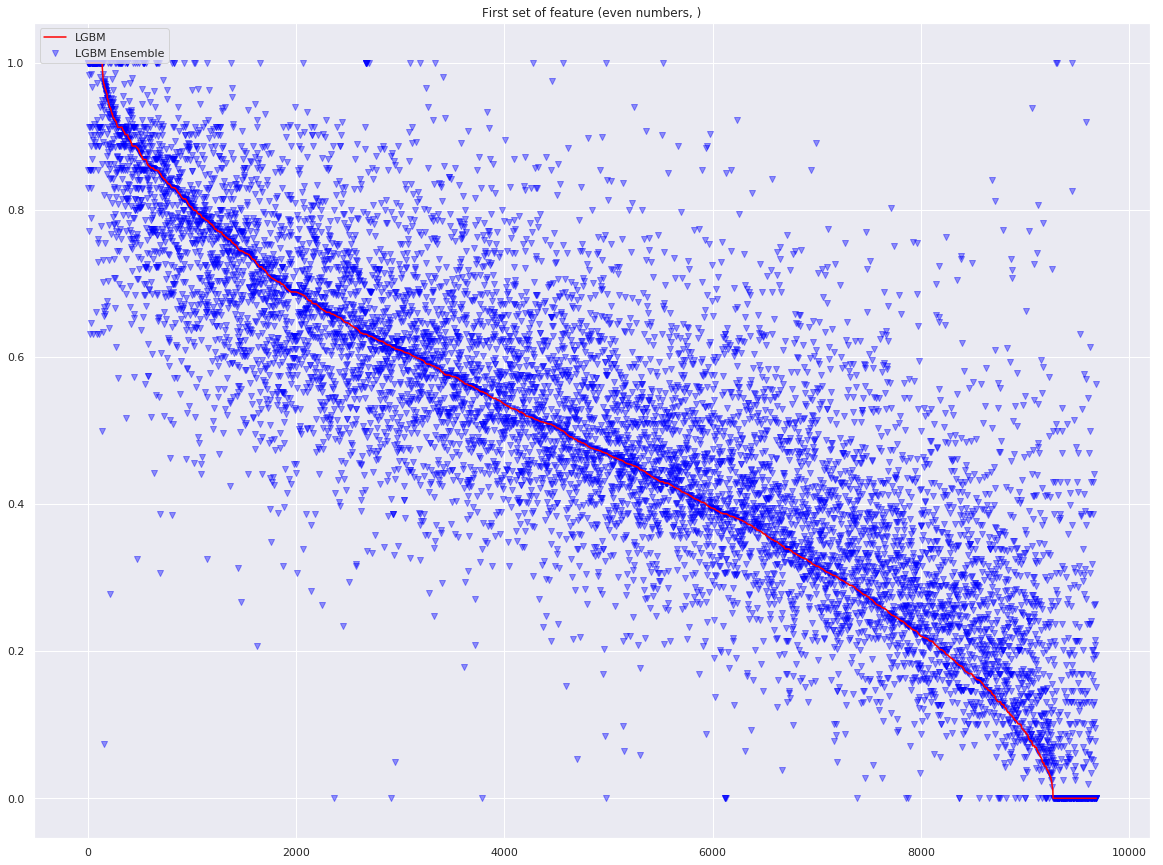

In [8]:
file1 = 'resultsmslr10k/evalPerQuerylgbm.lrank.1500.63.0.05.0.4.part1'
file2 = 'resultsmslr10k/evalPerQuerylgbm.lrank.1500.63.0.05.0.4.part2'
baseline = 'resultsmslr10k/evalPerQueryLGBM'

twoensembleresult(file1, file2, baseline)

In [11]:
bpath = '/home/sh1/S3713561/work/Utilities/ltr-baseline/mslr10k/run/'

for i in range(1,6):
    for part in range(1,3):
        runname = 'run.lgbm.lrank.1500.63.0.05.0.4.part%d.fold%d' % (part, i)
        


1
2
3
4
5


In [37]:
a = pd.read_csv(bpath + 'run.lgbm.lrank.1500.63.0.05.0.4.part1.fold1', header=None, sep=' ', float_precision='high')
b = pd.read_csv(bpath + 'run.lgbm.lrank.1500.63.0.05.0.4.part2.fold1', header=None, sep=' ', float_precision='high')
b[2] = b[2].apply(str)
a[2] = a[2].apply(str)

temp = b.set_index(b[2])
temp = temp.reindex(index=a[2])
temp = temp.reset_index()
temp

ValueError: cannot reindex from a duplicate axis

In [28]:
print(b.head(138))

      0   1       2    3         4     5
0    13  Q0  13.115    1  0.912116  lgbm
1    13  Q0  13.140    2  0.705639  lgbm
2    13  Q0  13.980    3  0.568264  lgbm
3    13  Q0  13.390    4  0.473060  lgbm
4    13  Q0  13.112    5  0.332685  lgbm
5    13  Q0  13.109    6  0.128331  lgbm
6    13  Q0  13.126    7  0.106627  lgbm
7    13  Q0  13.330    8  0.106468  lgbm
8    13  Q0  13.560    9  0.100669  lgbm
9    13  Q0  13.122   10  0.089751  lgbm
10   13  Q0  13.100   11  0.066746  lgbm
11   13  Q0  13.900   12  0.061729  lgbm
12   13  Q0  13.160   13  0.052994  lgbm
13   13  Q0  13.170   14  0.047451  lgbm
14   13  Q0  13.107   15  0.046148  lgbm
15   13  Q0  13.350   16  0.043014  lgbm
16   13  Q0  13.110   17  0.037589  lgbm
17   13  Q0  13.125   18  0.027658  lgbm
18   13  Q0  13.133   19  0.013679  lgbm
19   13  Q0  13.111   20  0.006796  lgbm
20   13  Q0  13.220   21  0.004061  lgbm
21   13  Q0  13.105   22  0.002983  lgbm
22   13  Q0  13.770   23 -0.001144  lgbm
23   13  Q0  13.

In [29]:
temp[temp.index.duplicated()]

,0,1,3,4,5
2,,,,,
13.90,13,Q0,25,-0.006324,lgbm
13.12,13,Q0,62,-0.076123,lgbm
13.30,13,Q0,64,-0.081551,lgbm
13.13,13,Q0,68,-0.096353,lgbm
13.50,13,Q0,73,-0.099042,lgbm
13.10,13,Q0,76,-0.101899,lgbm
13.10,13,Q0,97,-0.134457,lgbm
13.11,13,Q0,99,-0.137273,lgbm
13.20,13,Q0,105,-0.159240,lgbm


In [36]:
b[0] = b[0].apply(str)

b.dtypes

0     object
1     object
2     object
3      int64
4    float64
5     object
dtype: object